# Prédiction sur la solvabilité des clients d'une banque
### Introduction

Dans cette notebook nous allons faire la prédiction concernant la solvabilité des clients d'une banque.
Sur ce nous allons suivre les étapes suivantes:
1.  Importation de données
2.  Analyse exploratoire
3.  Pretraitement
4.  evaluation du model
5.  Enregistrement du model pour le deploiement



### 1.  Importation de données

In [63]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as pn 
import plotly.express as pl 
import seaborn as sn
data = pd.read_csv(r"D:\fraude\donnees\bank.csv")

 ### 2.  Analyse exploratoire

In [64]:
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [65]:
def analyse(dataframe) :
    dataframe.info()
    print("----------------------------------------------------")
    dataframe.duplicated().value_counts()
    if (dataframe.duplicated==True) :
        data=data.drop_duplicated
    print("----------------------------------------------------")  
    da= dataframe.default.value_counts().reset_index()
    fig ,ax = plt.subplots()
    print("varaible cible default")
    dataframe.default.value_counts().plot.pie(autopct="%.0f%%")
    plt.show()
    print(dataframe.describe())

    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
----------------------------------------------------
----------------------------------------------

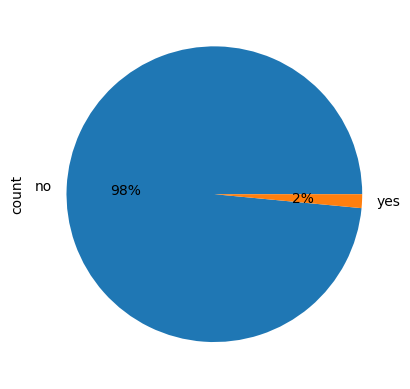

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [66]:
analyse(data)


In [67]:
nbr_col = data.shape[1] if data.shape[1]%2==0 else data.shape[1]//2+1

In [68]:
def analyse_univariee(dataframe):
    contour = dataframe.select_dtypes("object").shape[1] if dataframe.select_dtypes("object").shape[1]%2==0 else dataframe.select_dtypes("object").shape[1]//2+1
    plt.figure(figsize=(17,17)) 
    for i, col in enumerate(dataframe.select_dtypes("object")) :
      plt.subplot(contour,2,i+1) 
      xi =dataframe[col].value_counts()
      xi =xi.sort_values()  
      bar =sn.barplot(x=xi.index,y=xi.values)
      for p in bar.patches :
           bar.annotate(format(p.get_height(),'.0f'),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points',c='red')
      plt.tight_layout()
      plt.xticks(rotation=45)
    print("------------------------------------")
    contours = dataframe.select_dtypes("int").shape[1] if dataframe.select_dtypes("int").shape[1]%2==0 else dataframe.select_dtypes("int").shape[1]//2+1
    plt.figure(figsize=(17,17)) 
    for i, col in enumerate(dataframe.select_dtypes("int")) :
      plt.subplot(contours,2,i+1) 
      sn.distplot(dataframe[col])
      
      plt.tight_layout()
      plt.xticks(rotation=45)
   

    

        
            
           


    

------------------------------------


C:\Users\laurediekabala\AppData\Local\Temp\ipykernel_10344\2379026739.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(dataframe[col])
c:\Users\laurediekabala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laurediekabala\AppData\Local\Temp\ipykernel_10344\2379026739.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either

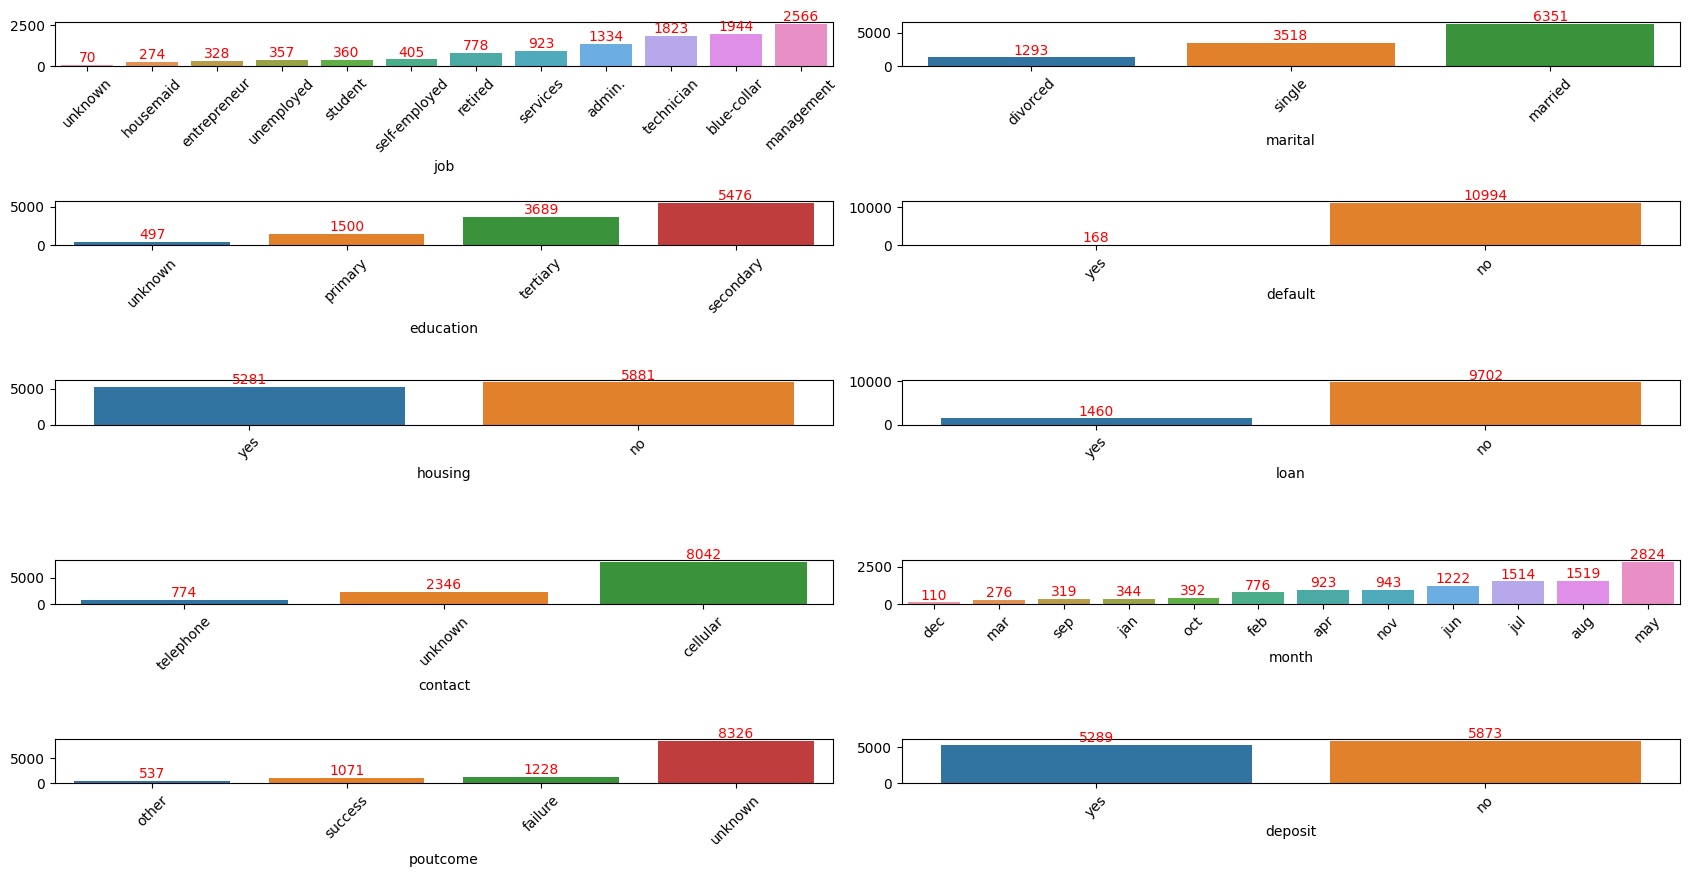

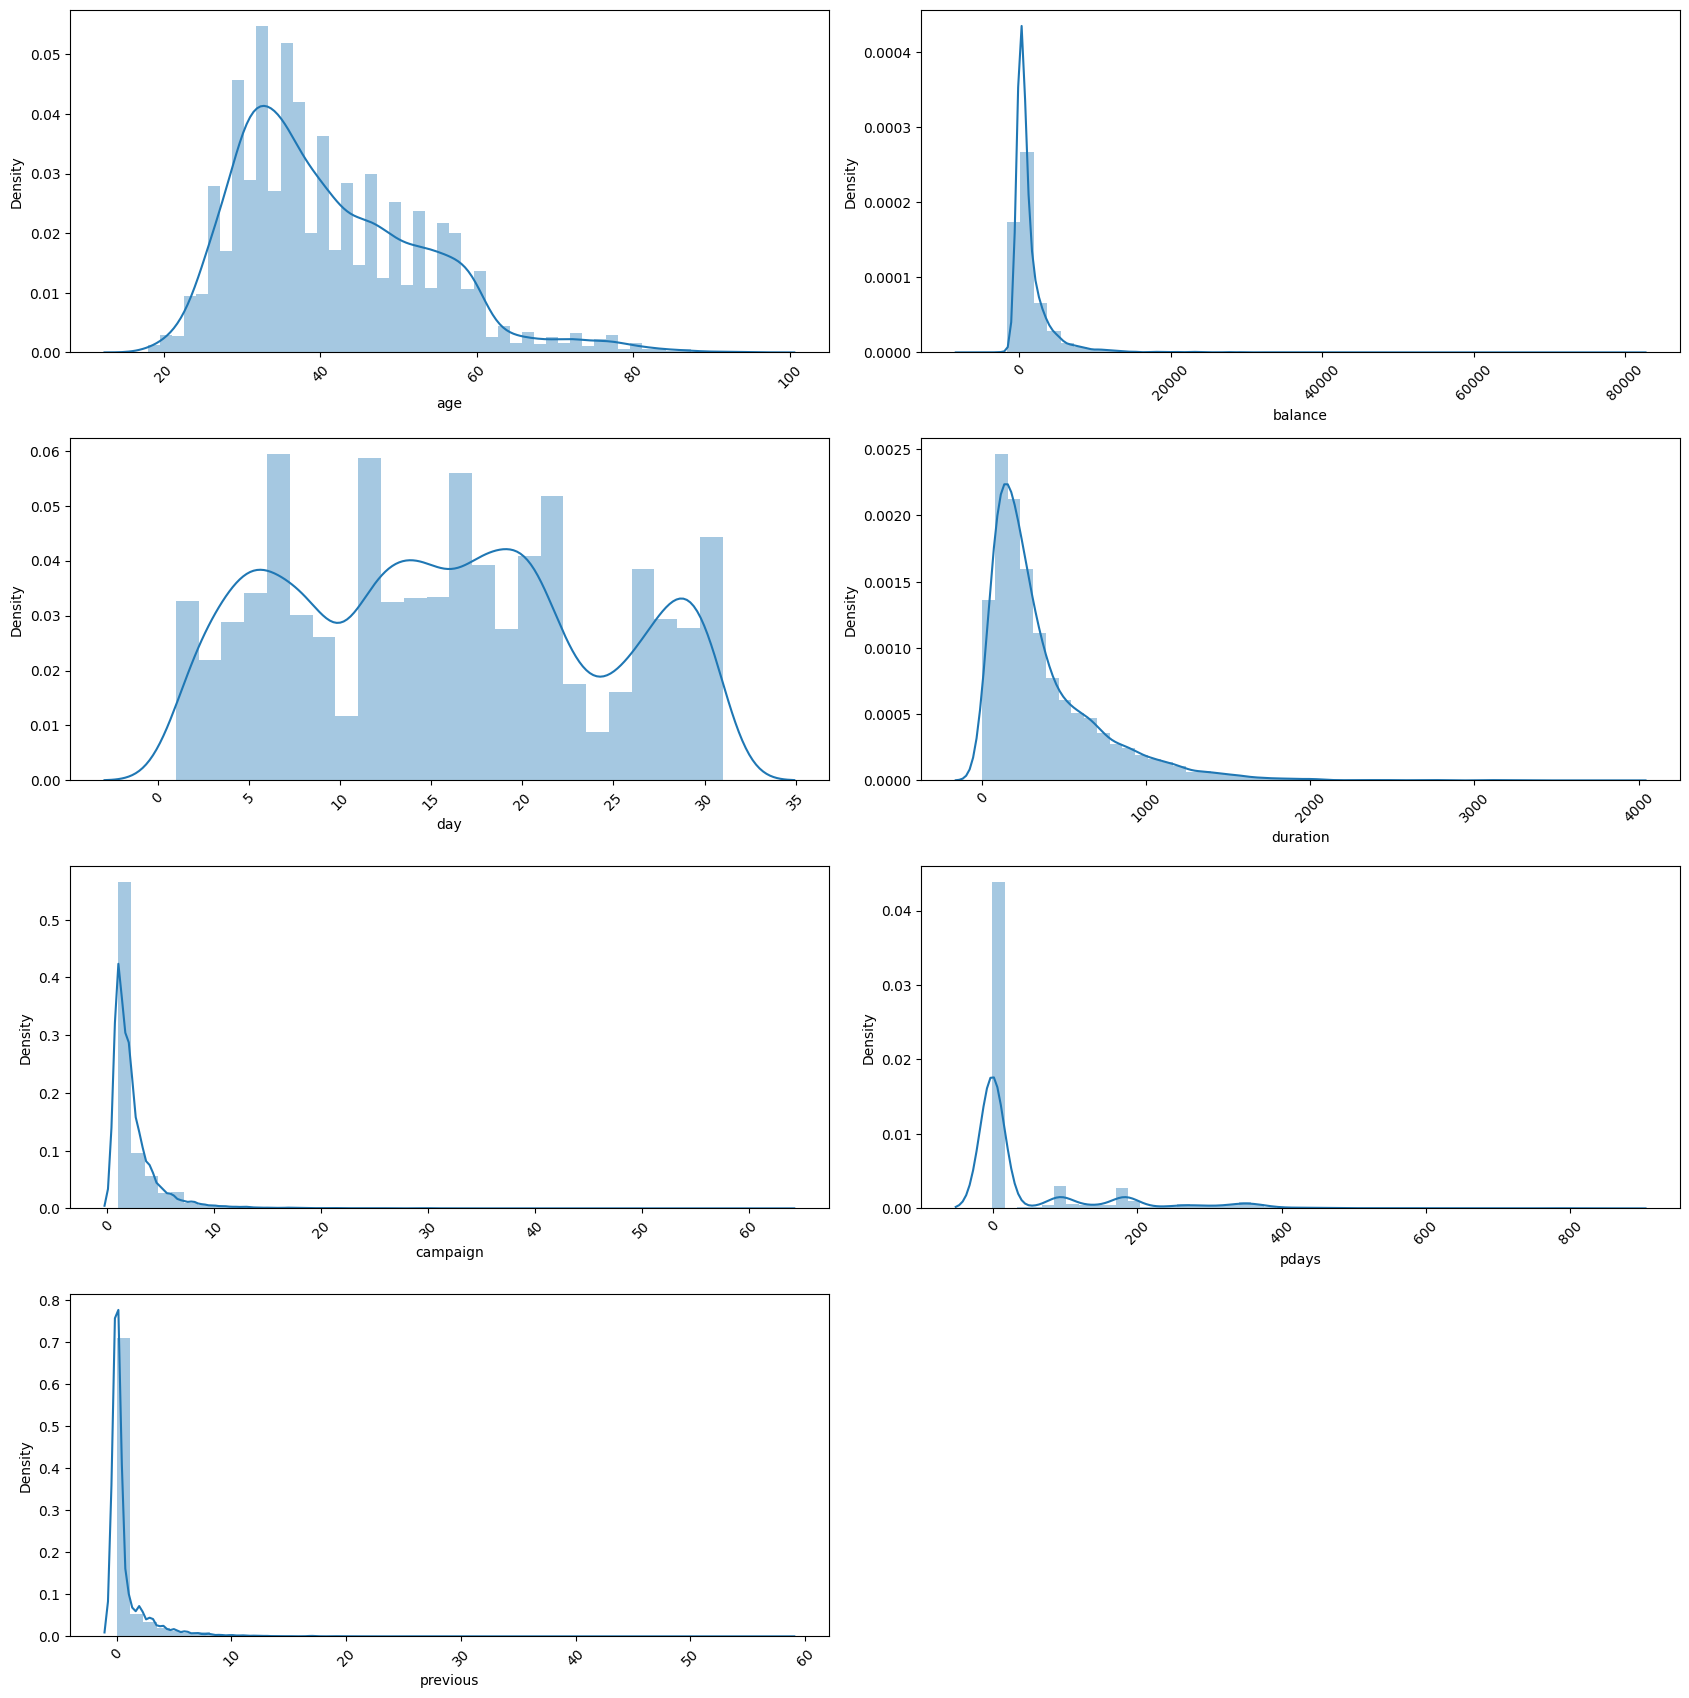

In [69]:
analyse_univariee(data)

In [70]:
def cat_cat(dataframe) :
    for i,col in enumerate(dataframe.select_dtypes("object")) :
          for j,co in enumerate(dataframe.select_dtypes("object")) :
               if (col in dataframe.select_dtypes("object").columns[-5:].tolist())&(co in dataframe.select_dtypes("object").columns[:5].tolist()) :
                 
                 pd.crosstab(dataframe[col],dataframe[co]).plot.bar()
    plt.show()
                           
               
    

c:\Users\laurediekabala\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


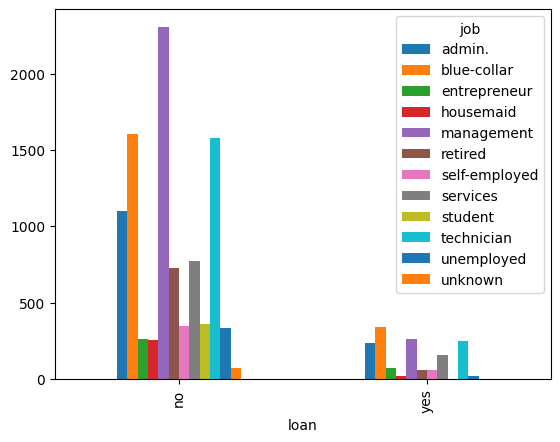

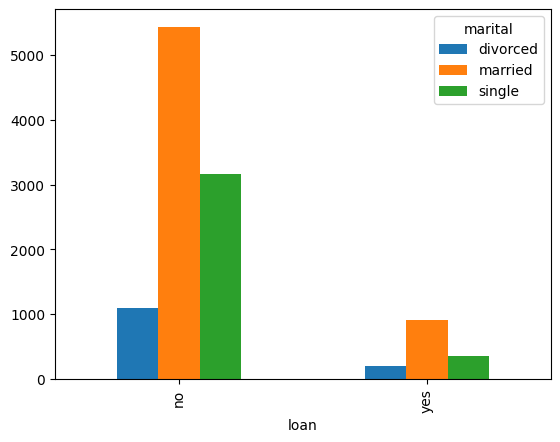

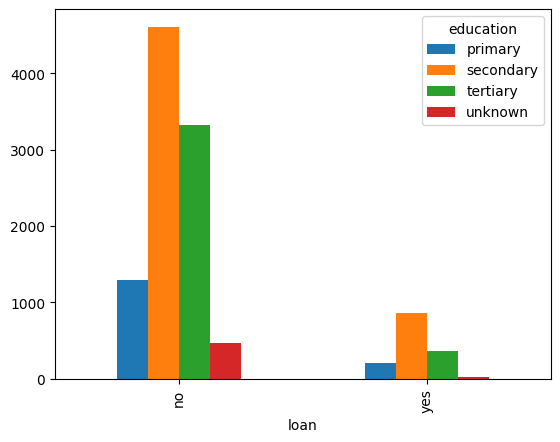

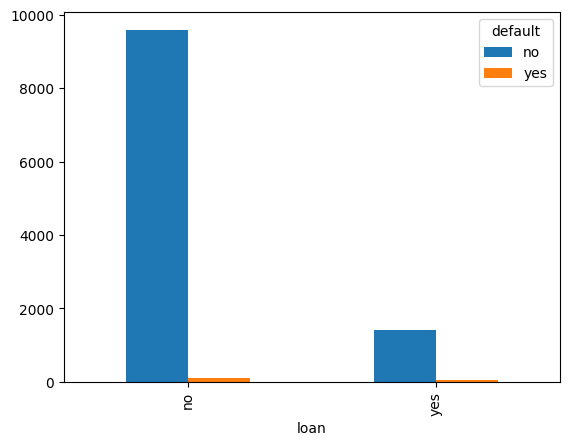

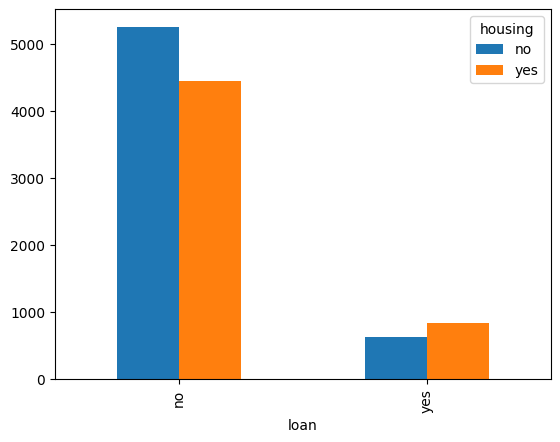

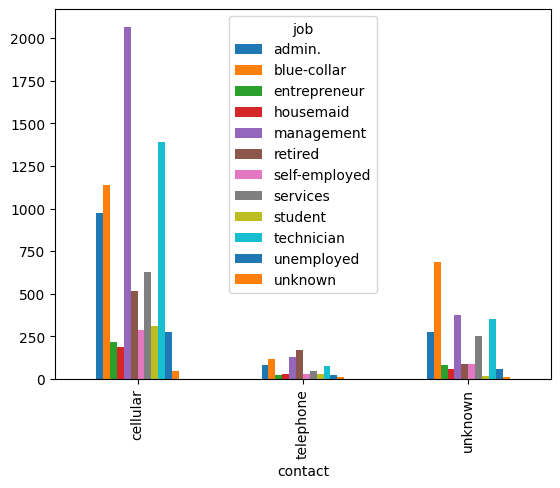

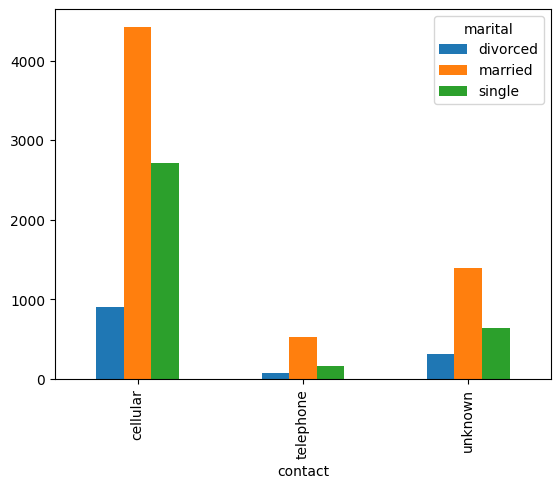

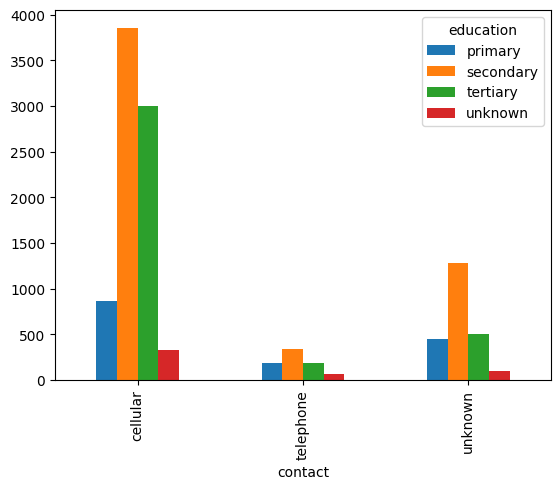

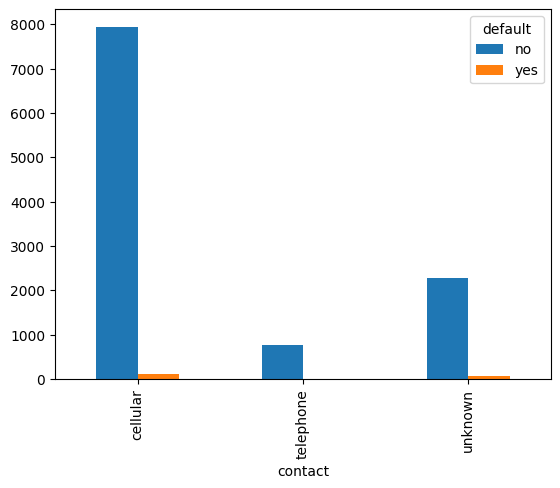

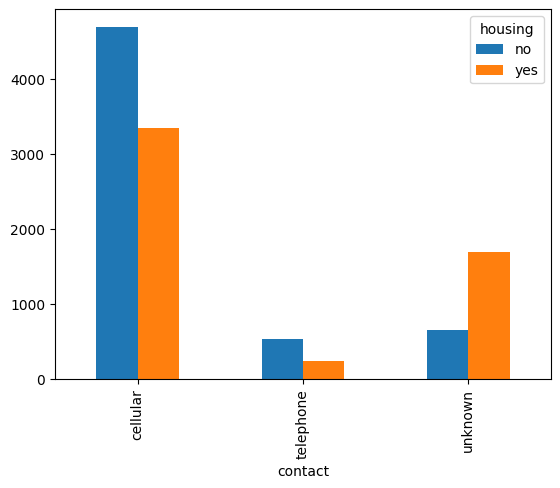

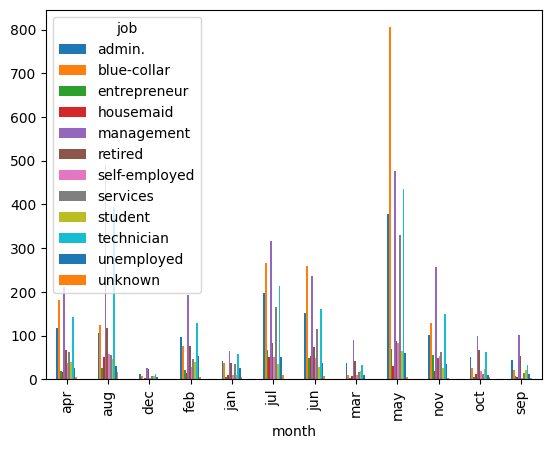

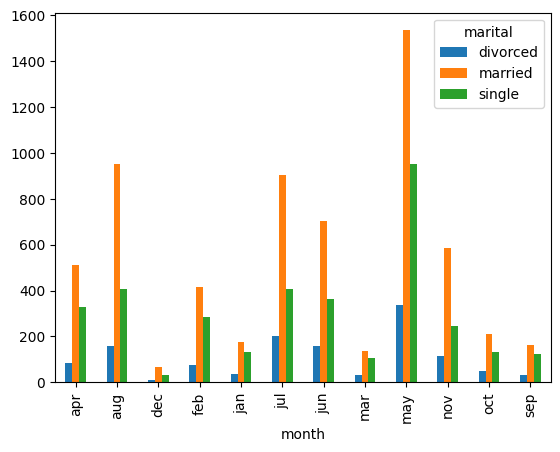

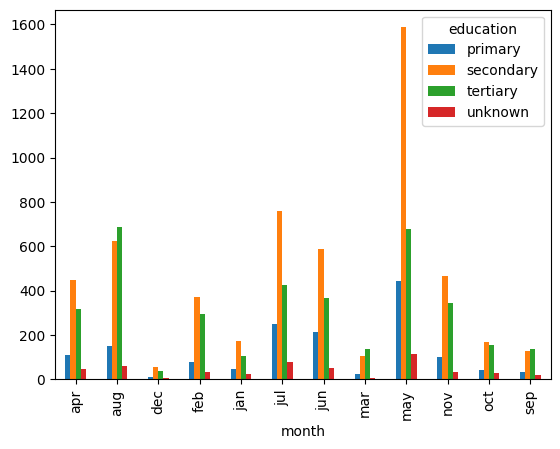

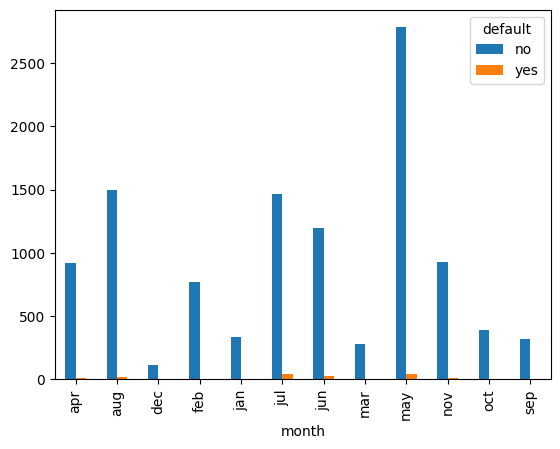

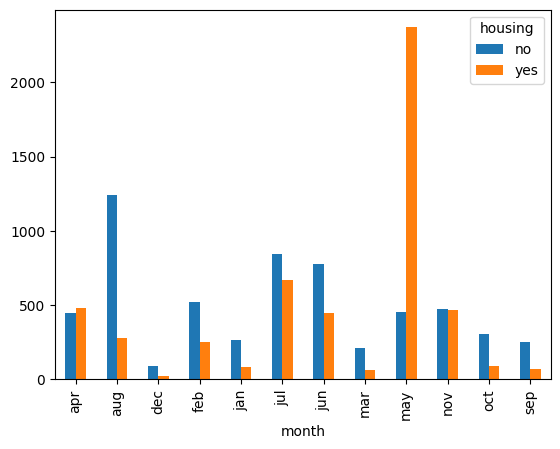

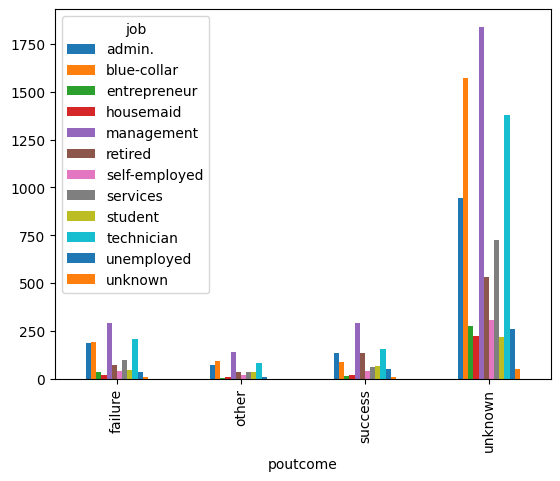

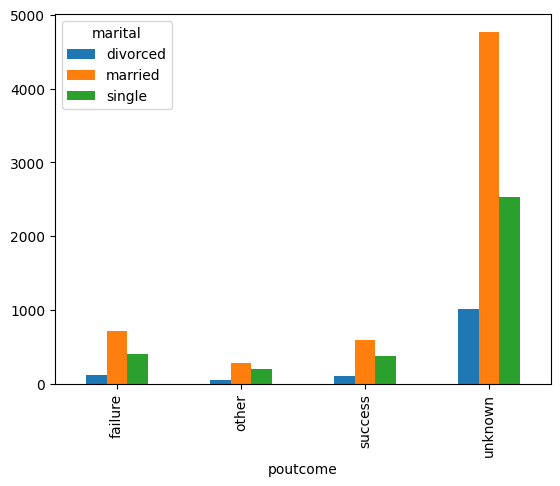

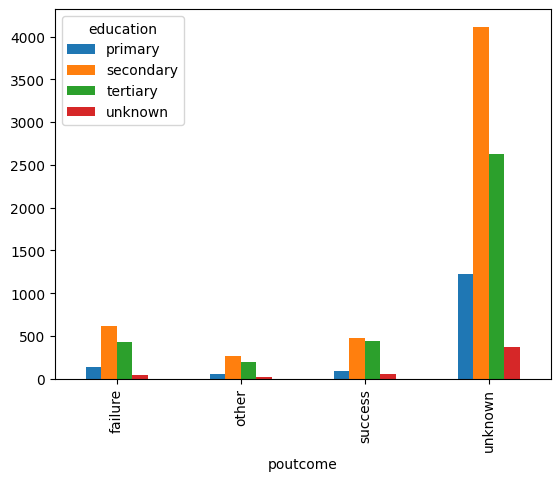

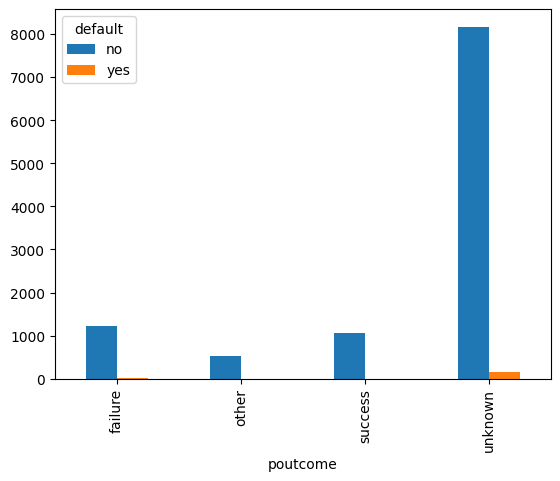

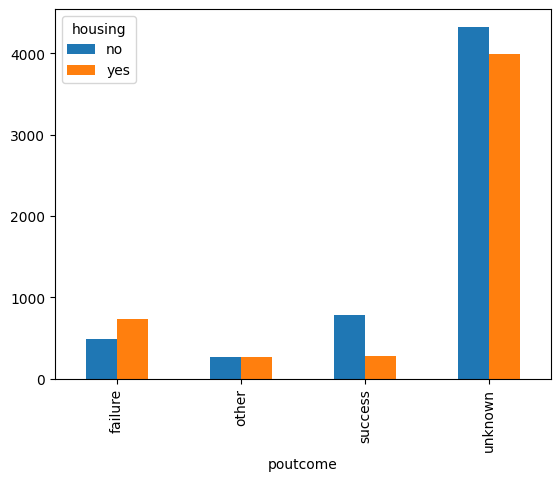

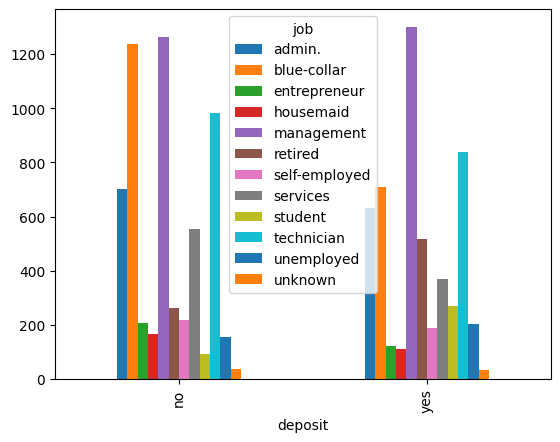

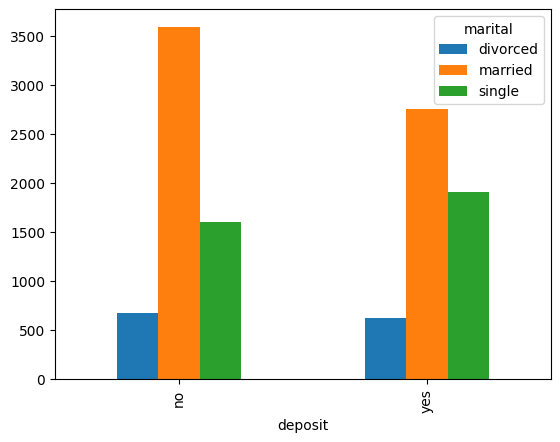

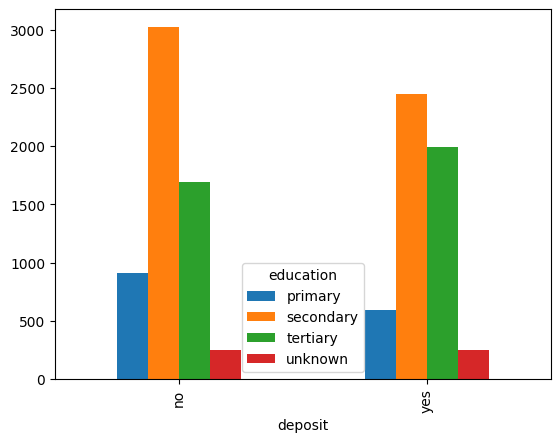

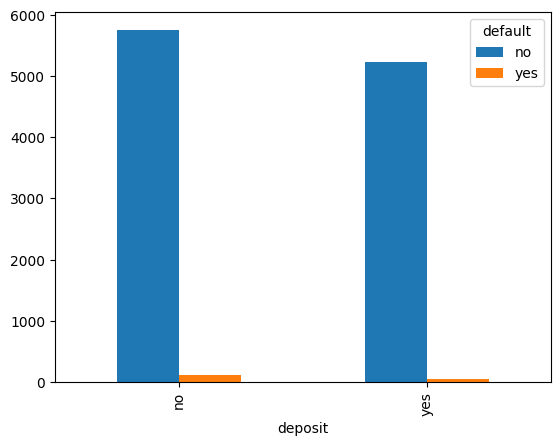

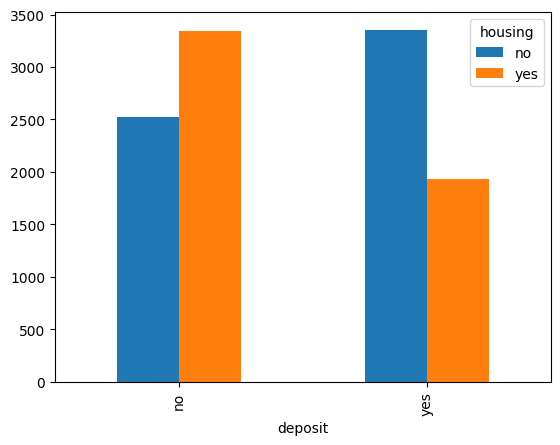

In [71]:
cat_cat(data)

In [72]:
def cible_cat(dataframe) :
    contour = dataframe.select_dtypes("object").shape[1] if dataframe.select_dtypes("object").shape[1]%2==0 else dataframe.select_dtypes("object").shape[1]//2+1
    plt.figure(figsize=(19,19)) 
    for i, col in enumerate(dataframe.select_dtypes("object")) :
      plt.subplot(contour,2,i+1) 
      xi =data.groupby("default")[col].value_counts().reset_index()
      xi =xi.sort_values(by="count")  
      bar =sn.barplot(xi,x=col,y="count",hue="default")
      for p in bar.patches :
           bar.annotate(format(p.get_height(),'.0f'),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points',c='red')
      plt.tight_layout()
      plt.xticks(rotation=45)
      plt.legend(loc="center")
    

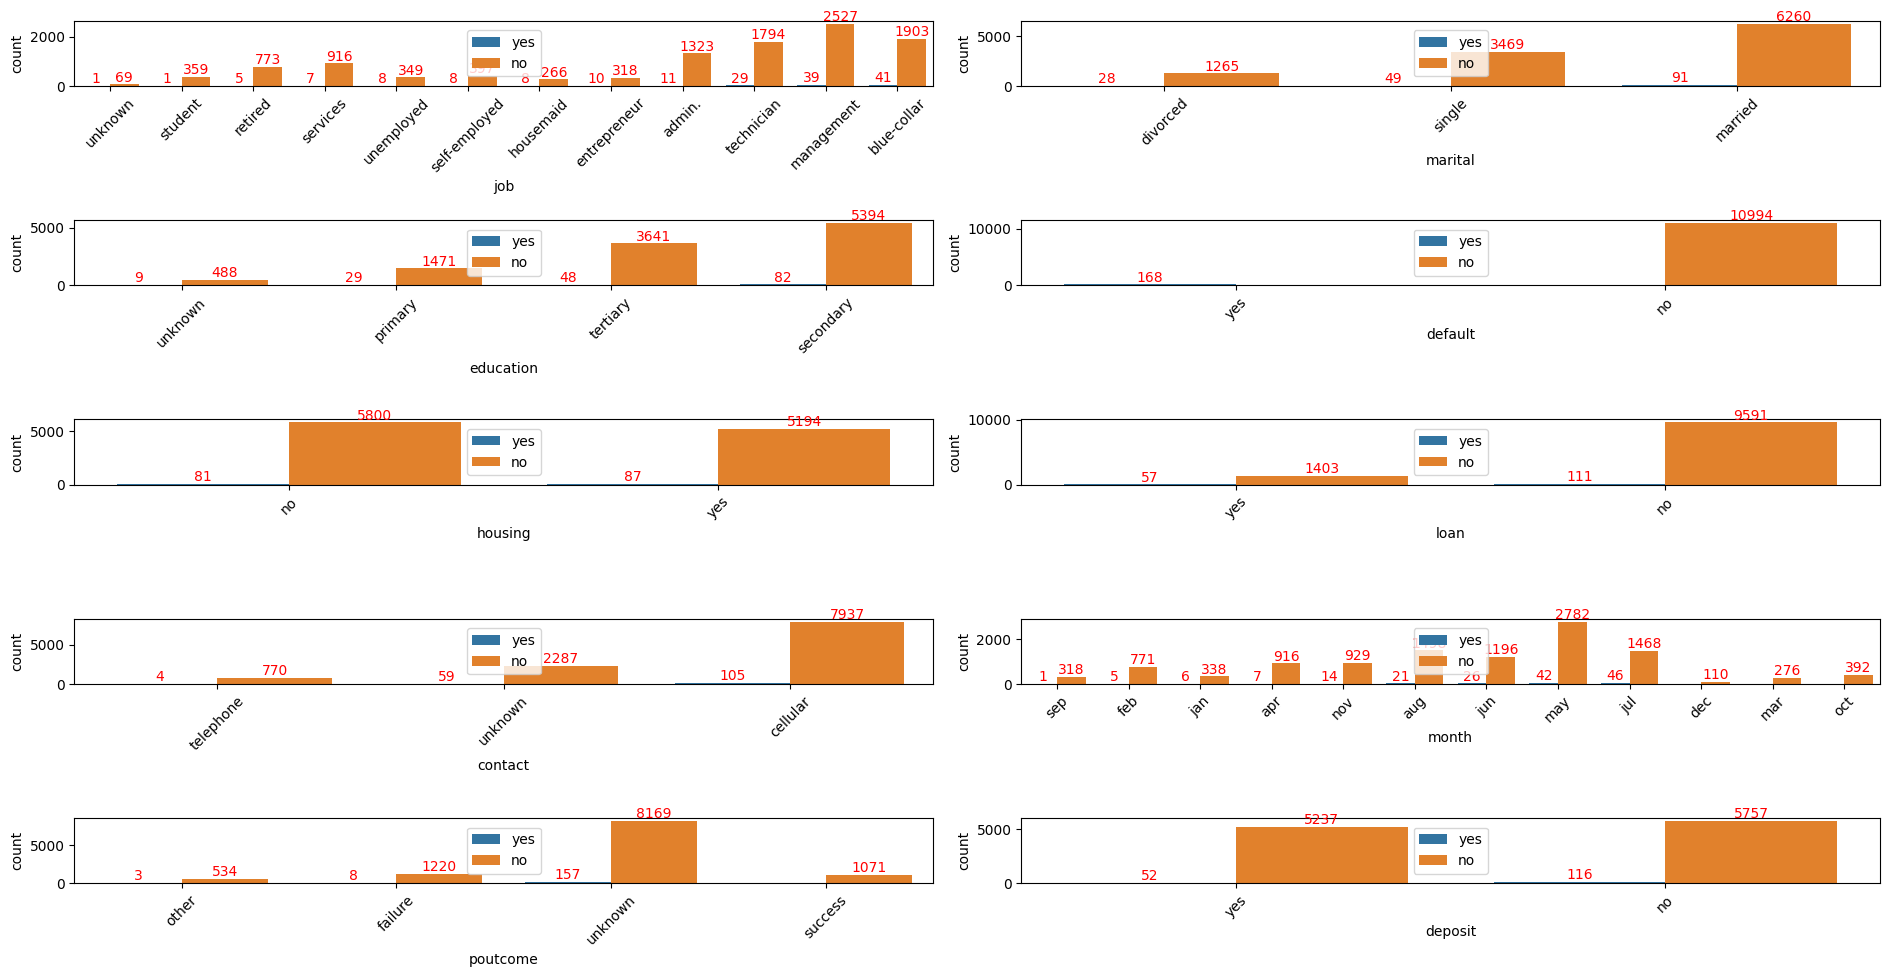

In [73]:
cible_cat(data)

In [74]:
def int_int(dataframe) :
    contour = dataframe.select_dtypes("int").shape[1] if dataframe.select_dtypes("int").shape[1]%2==0 else dataframe.select_dtypes("int").shape[1]//2+1

    for i, col in enumerate(dataframe.select_dtypes("int")) :
        for j, co in enumerate(dataframe.select_dtypes("int")) :
            if (col in dataframe.select_dtypes("int").columns[-3:].tolist())&(co in dataframe.select_dtypes("int").columns[:4].tolist()) :
                plt.figure(figsize=(19,19))
                sn.regplot(x=dataframe[col],y=dataframe[co])
           
    plt.xticks(rotation=45)
   
    

In [ ]:
# verification des valeurs extreme
def extreme(dataframe) :
    for col in dataframe.select_dtypes("int") :
          plt.figure()
          sn.boxplot(data[col])  

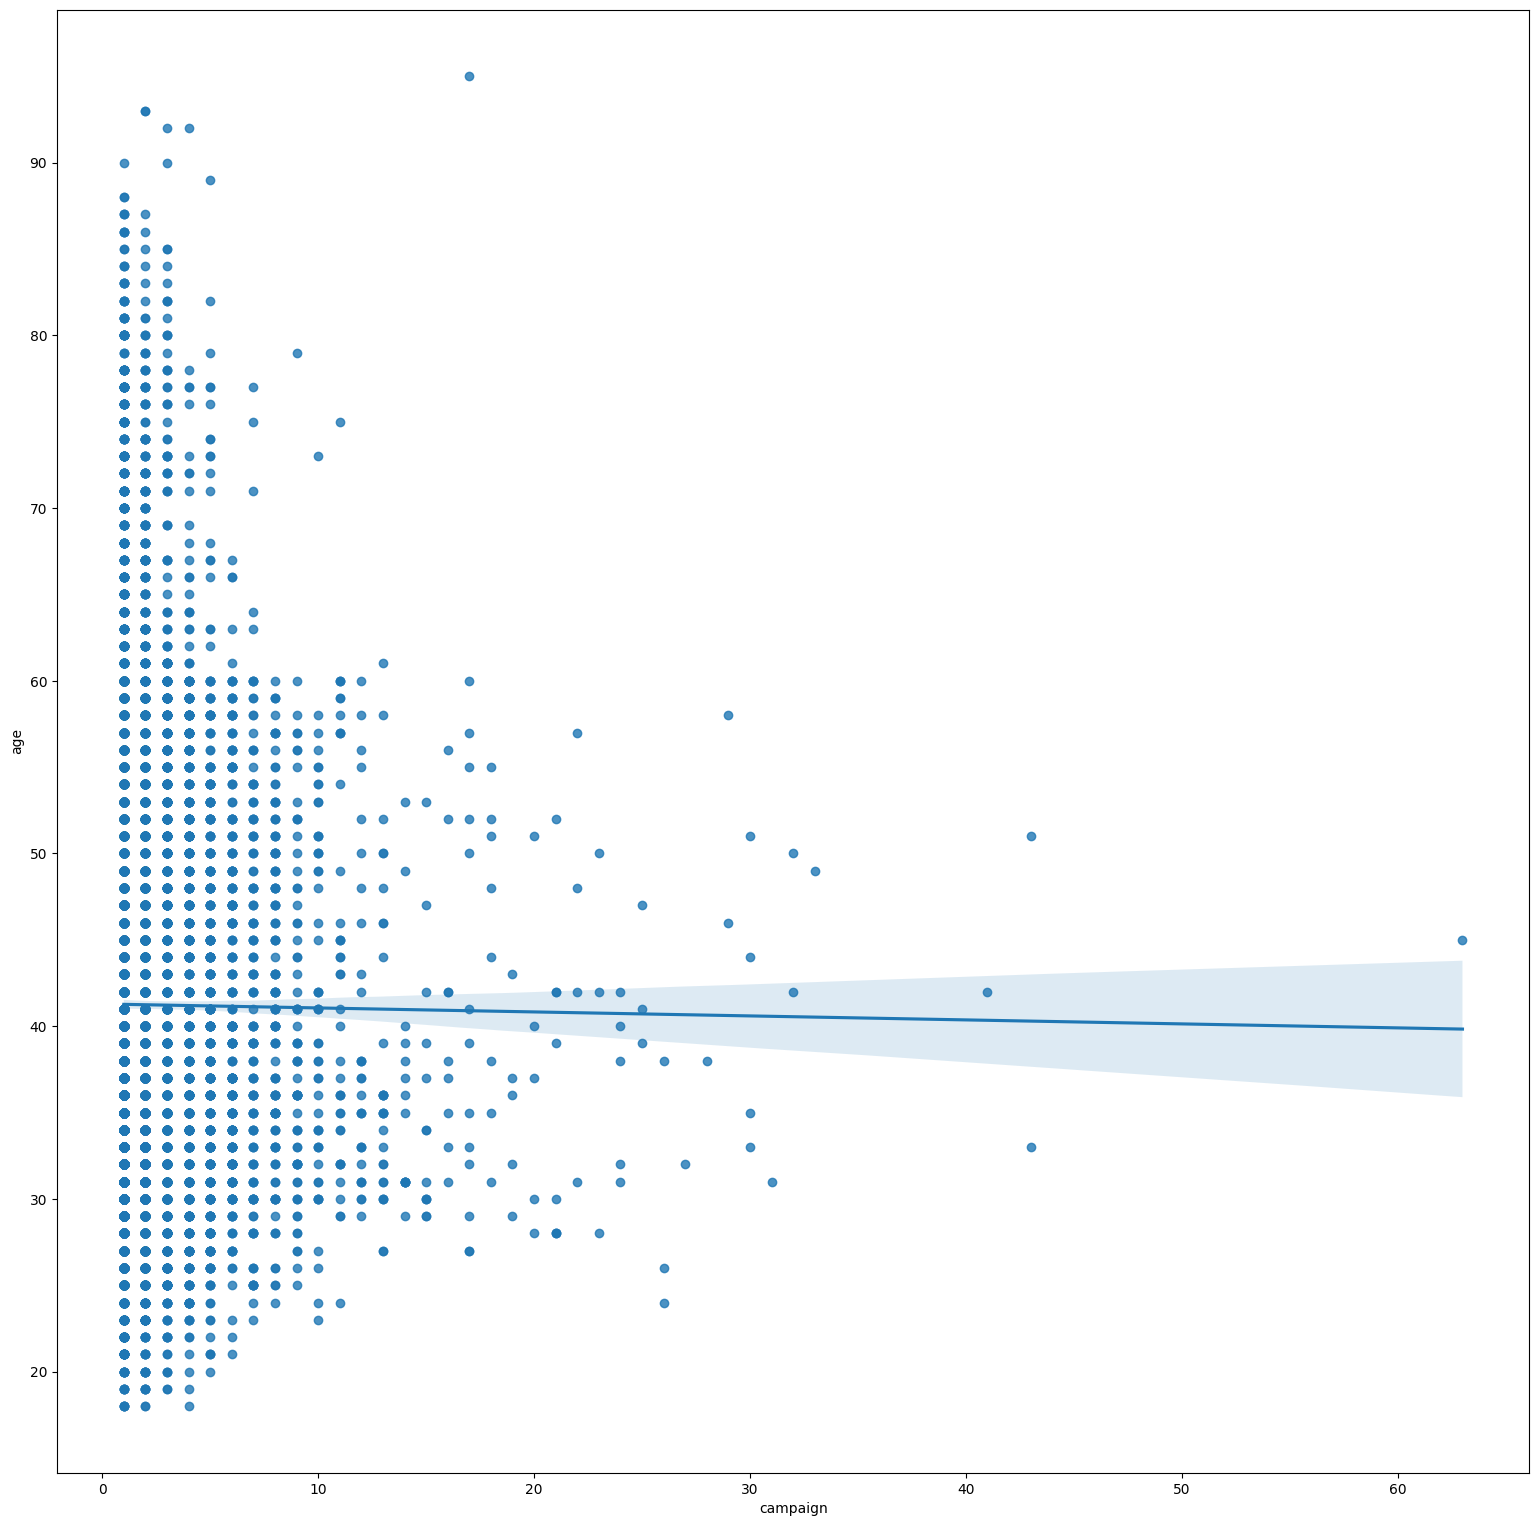

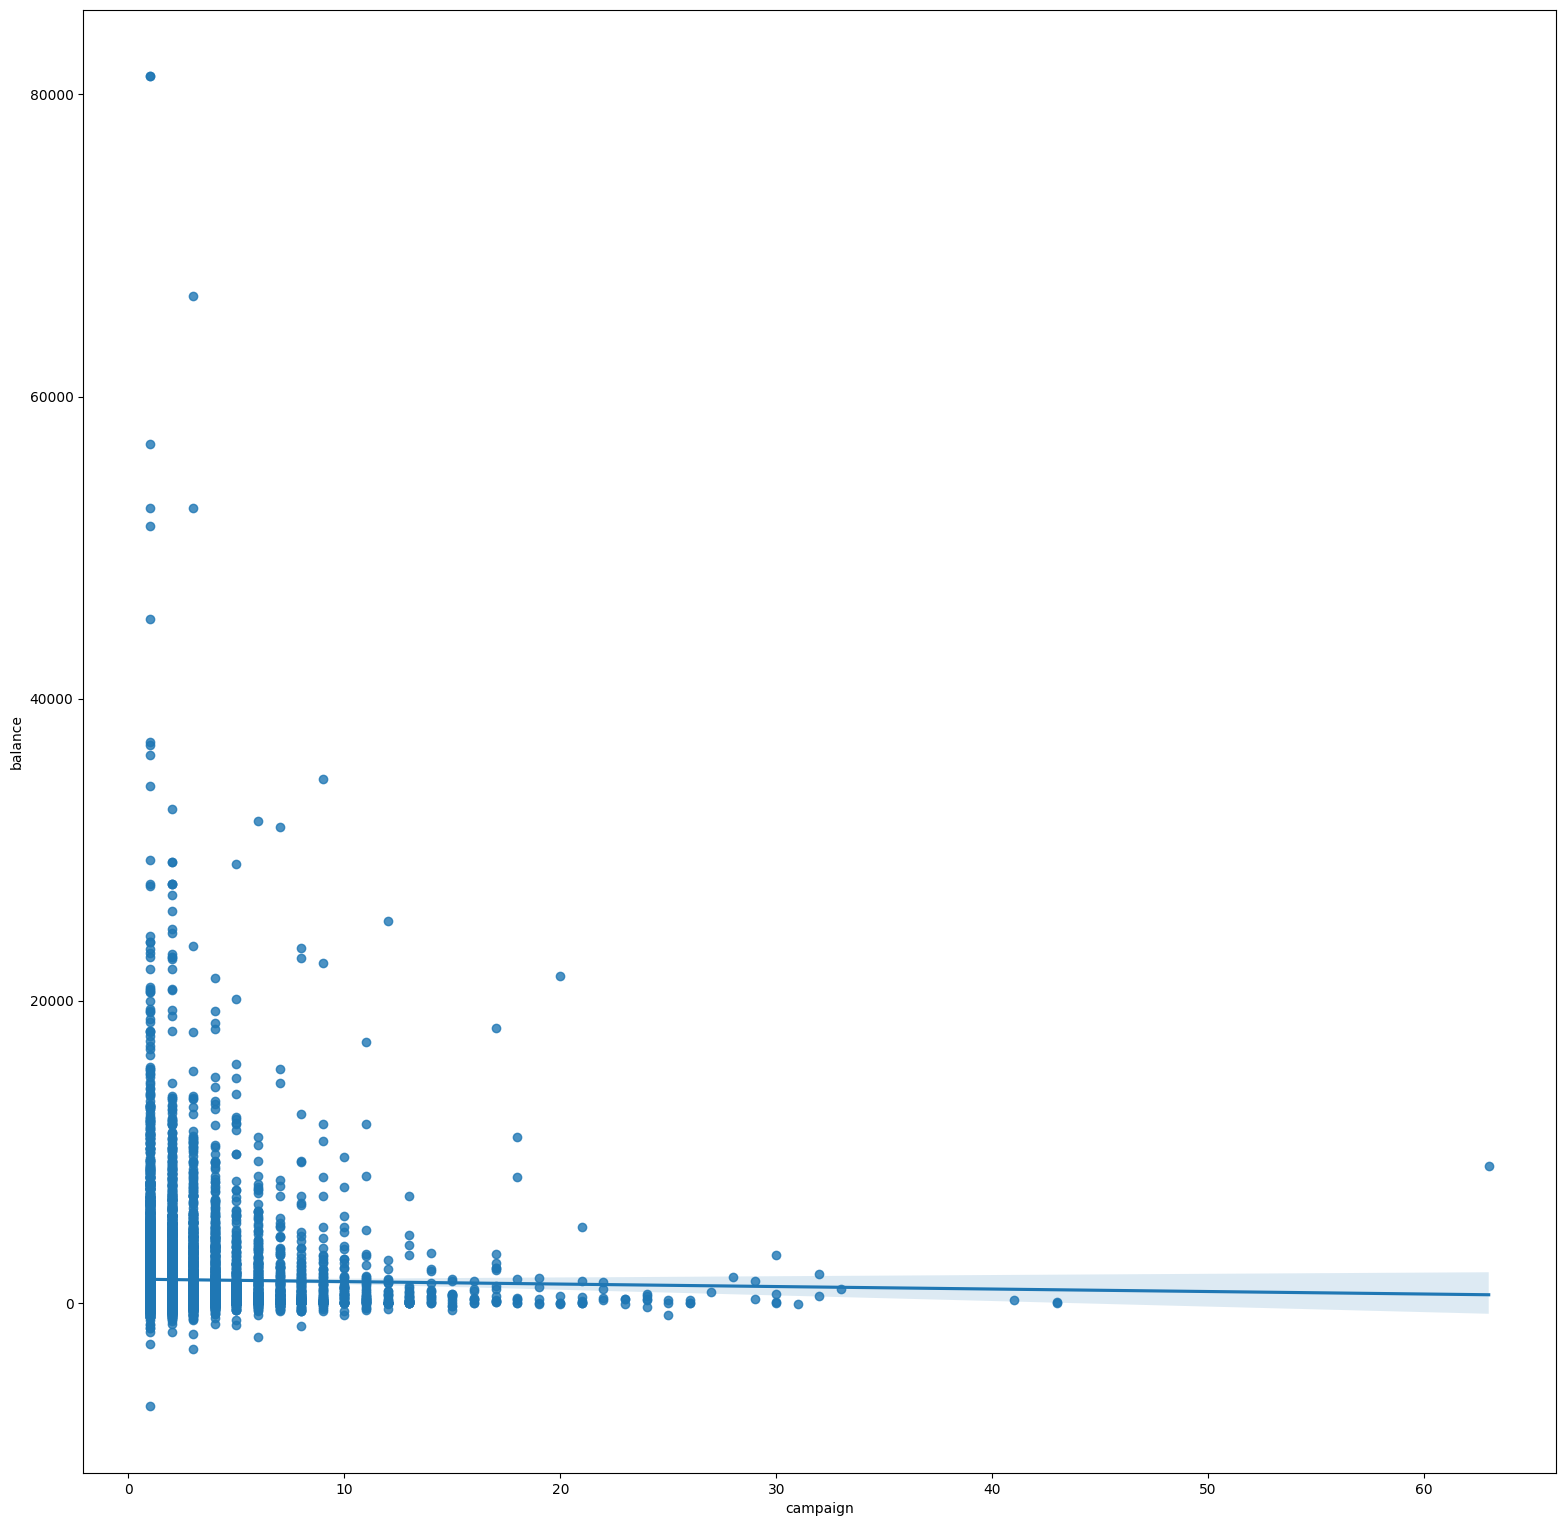

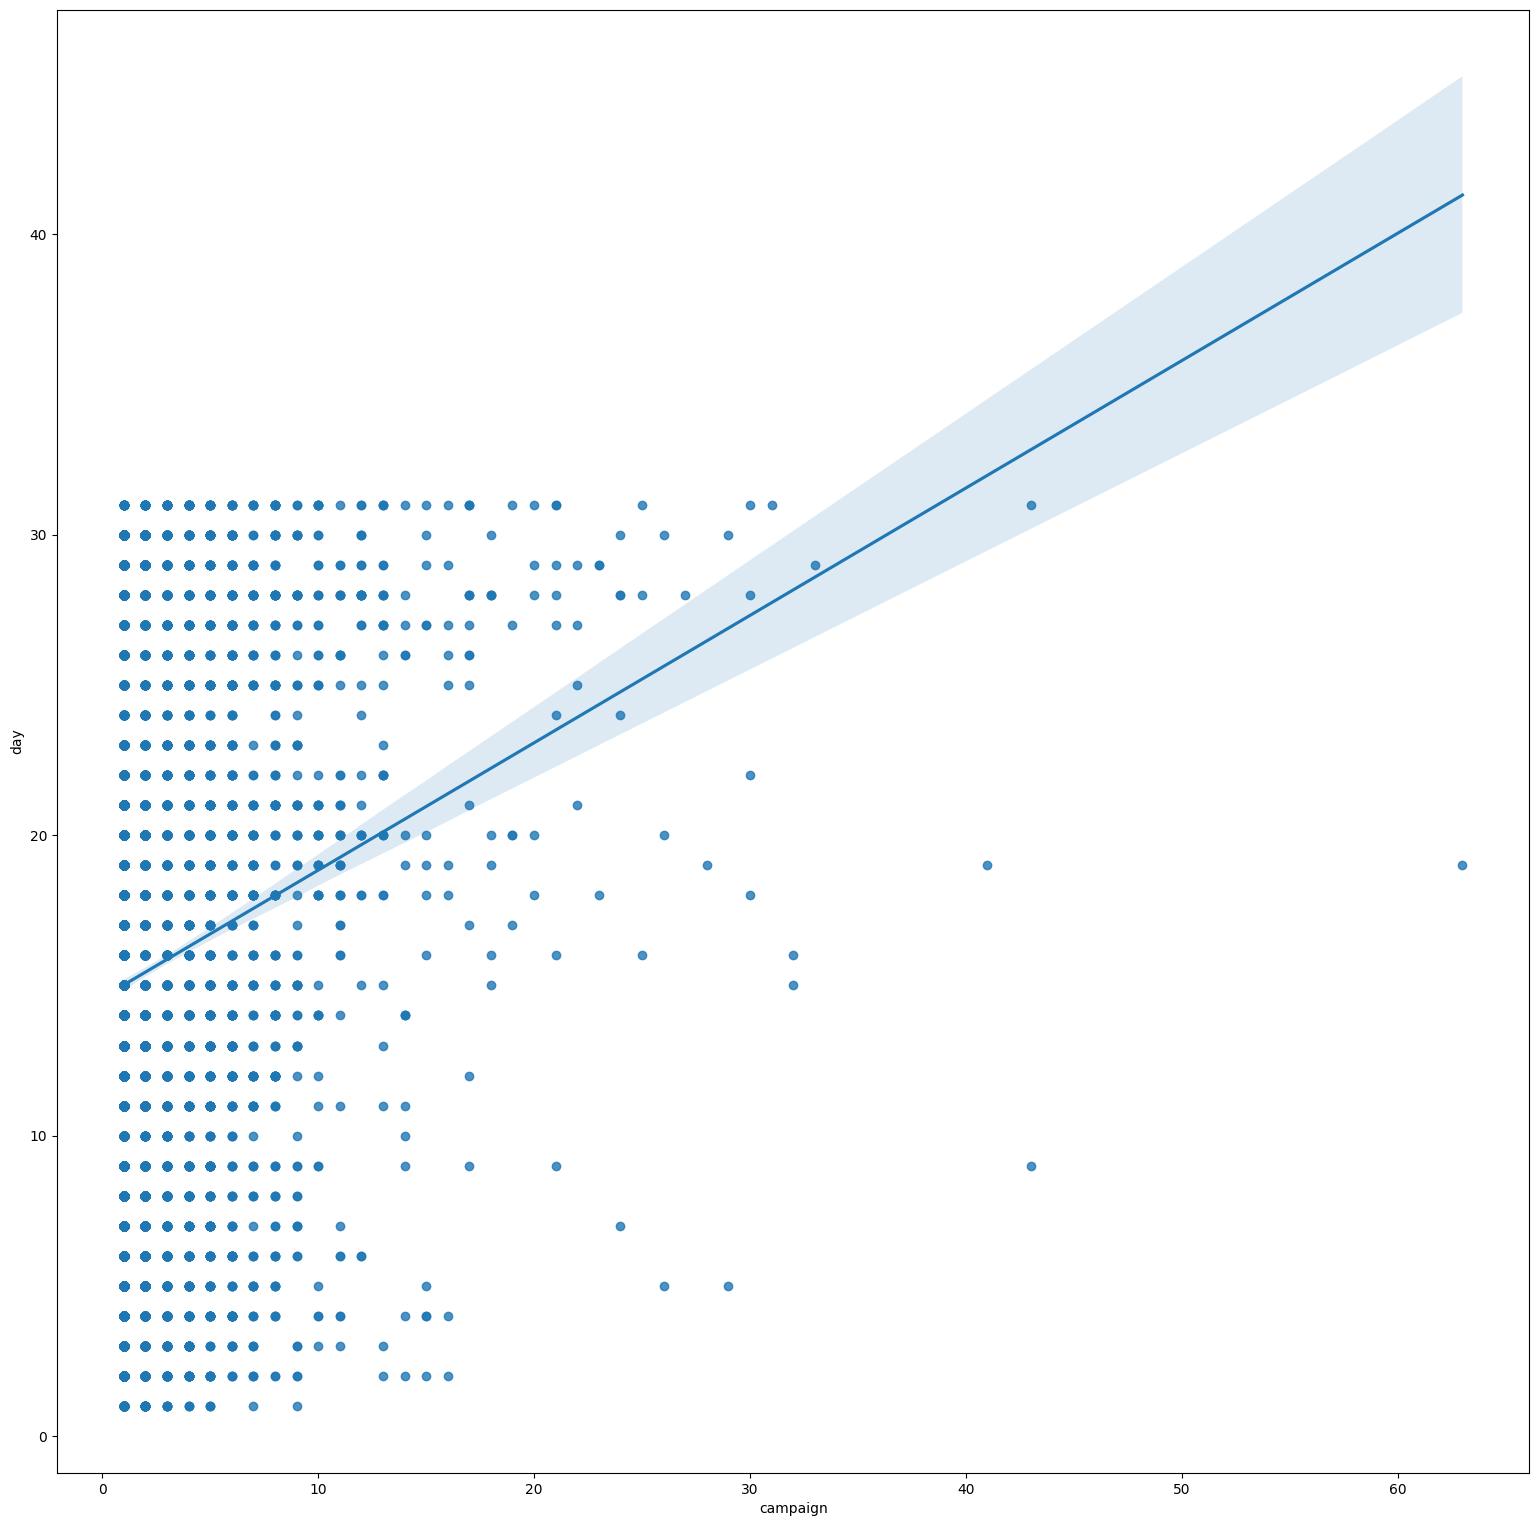

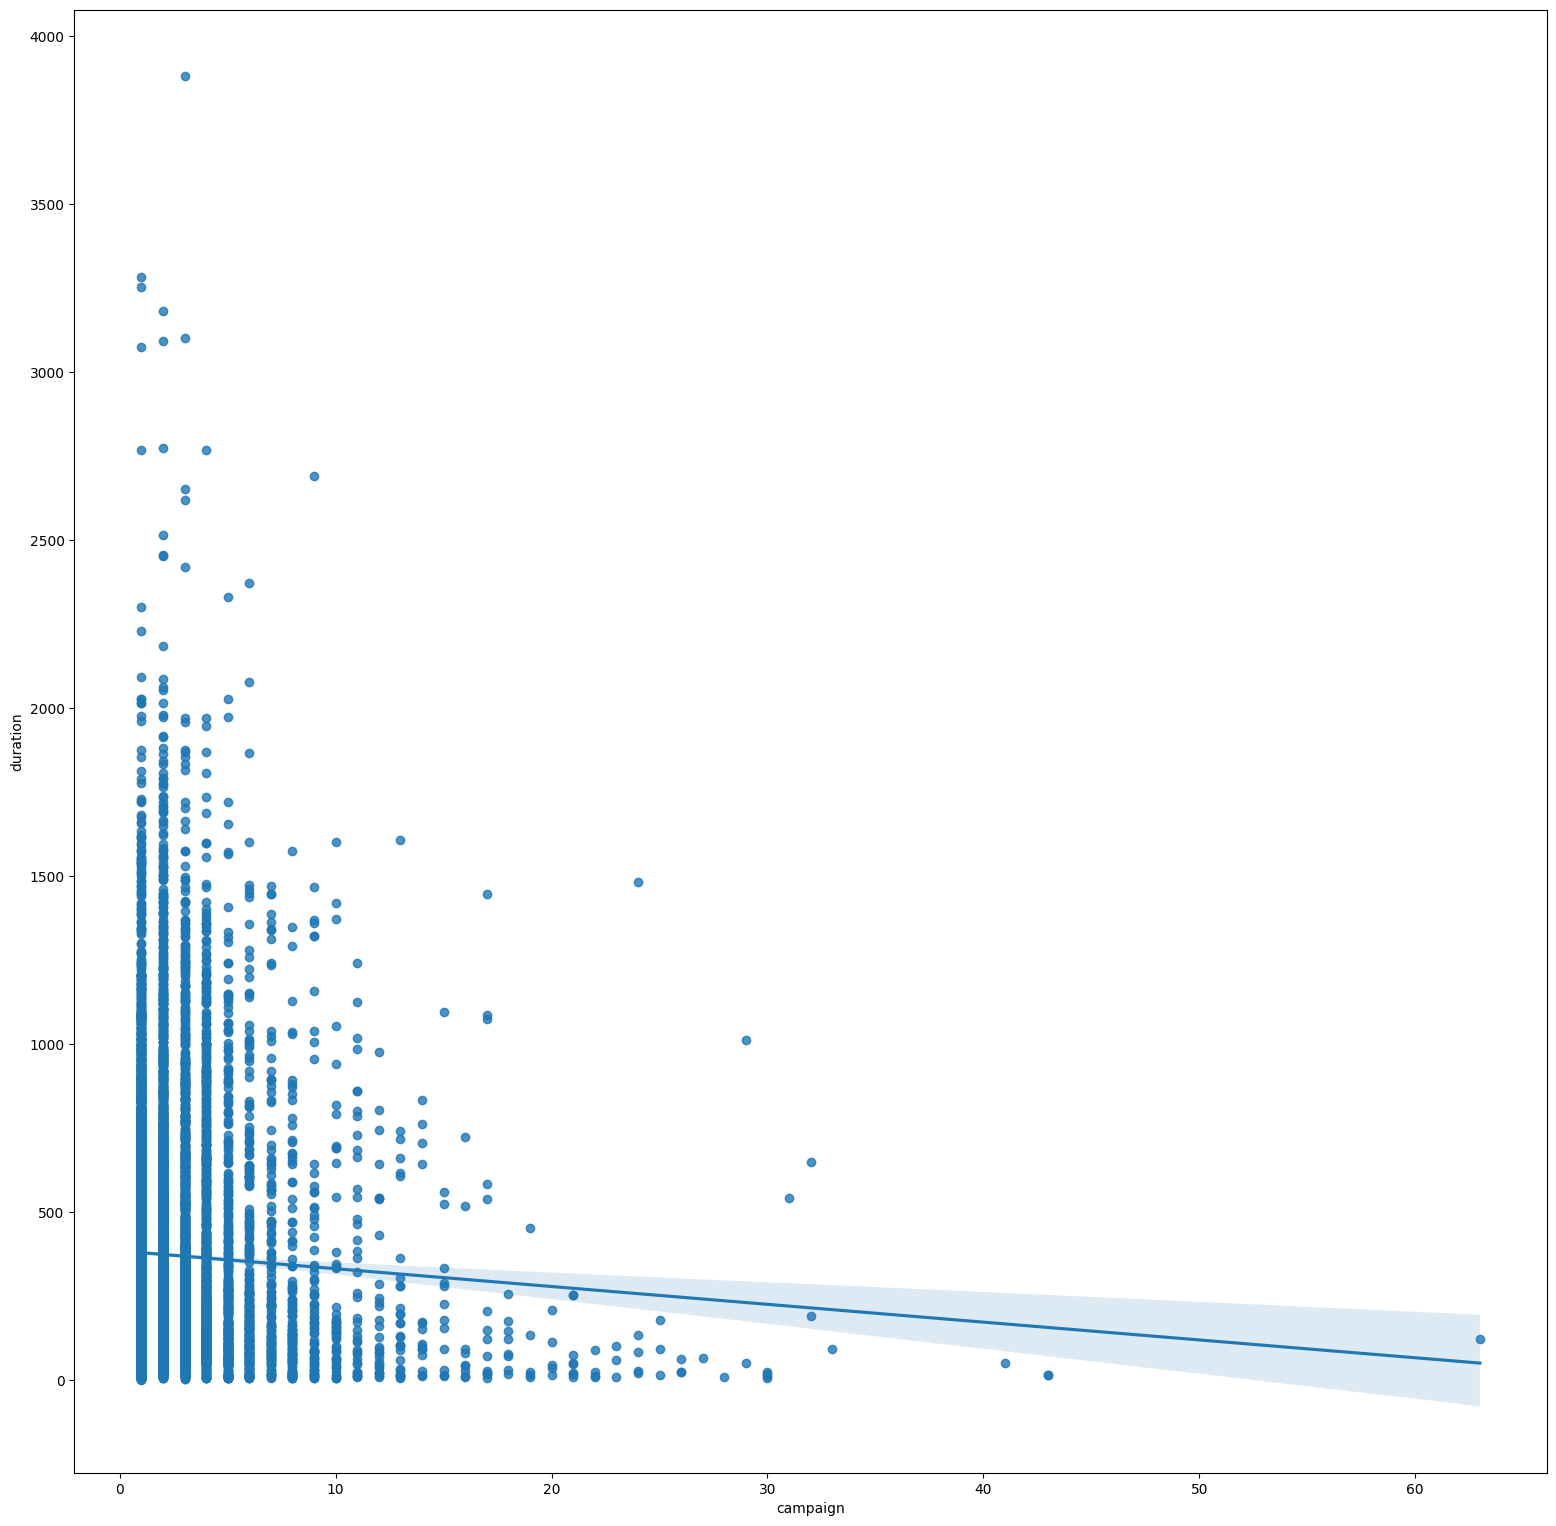

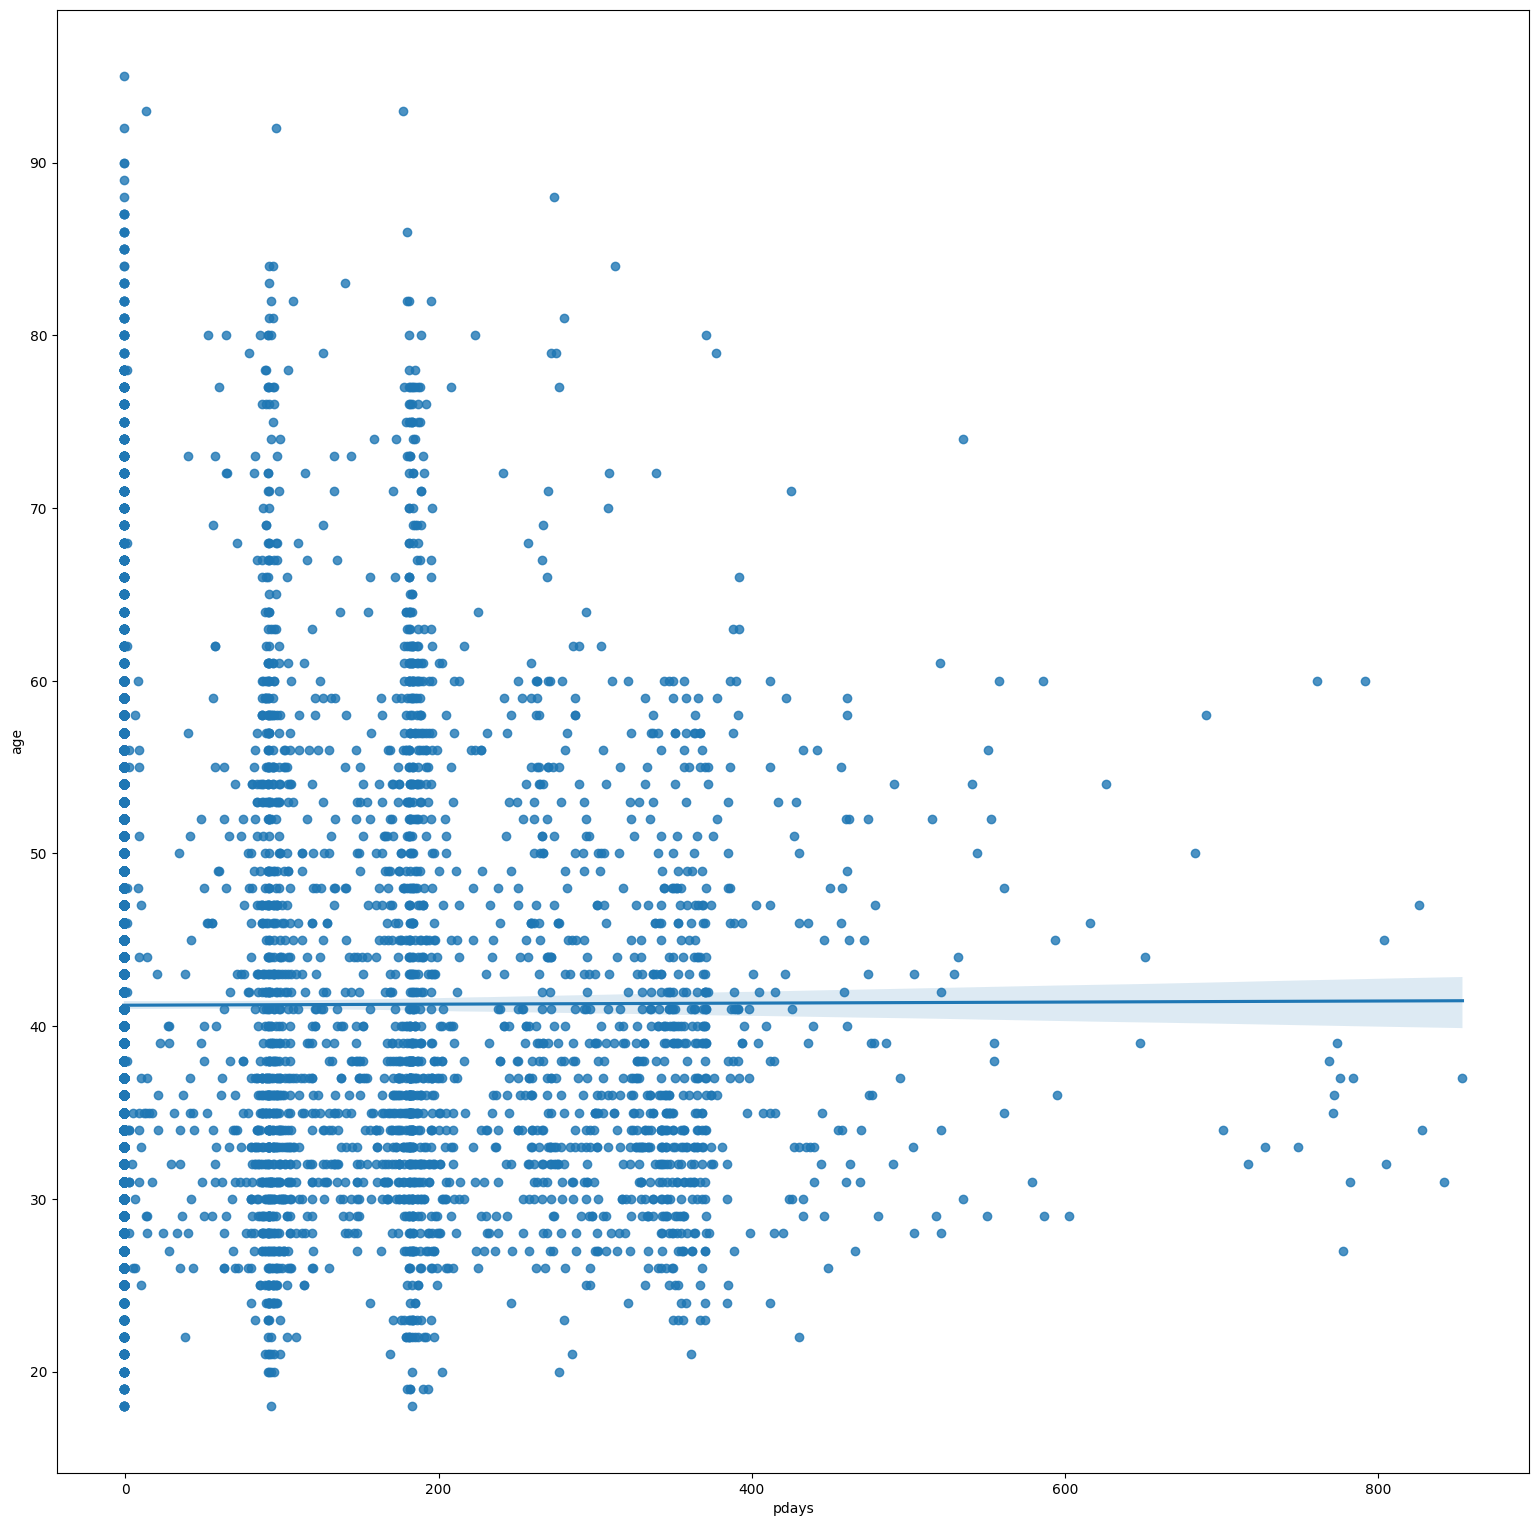

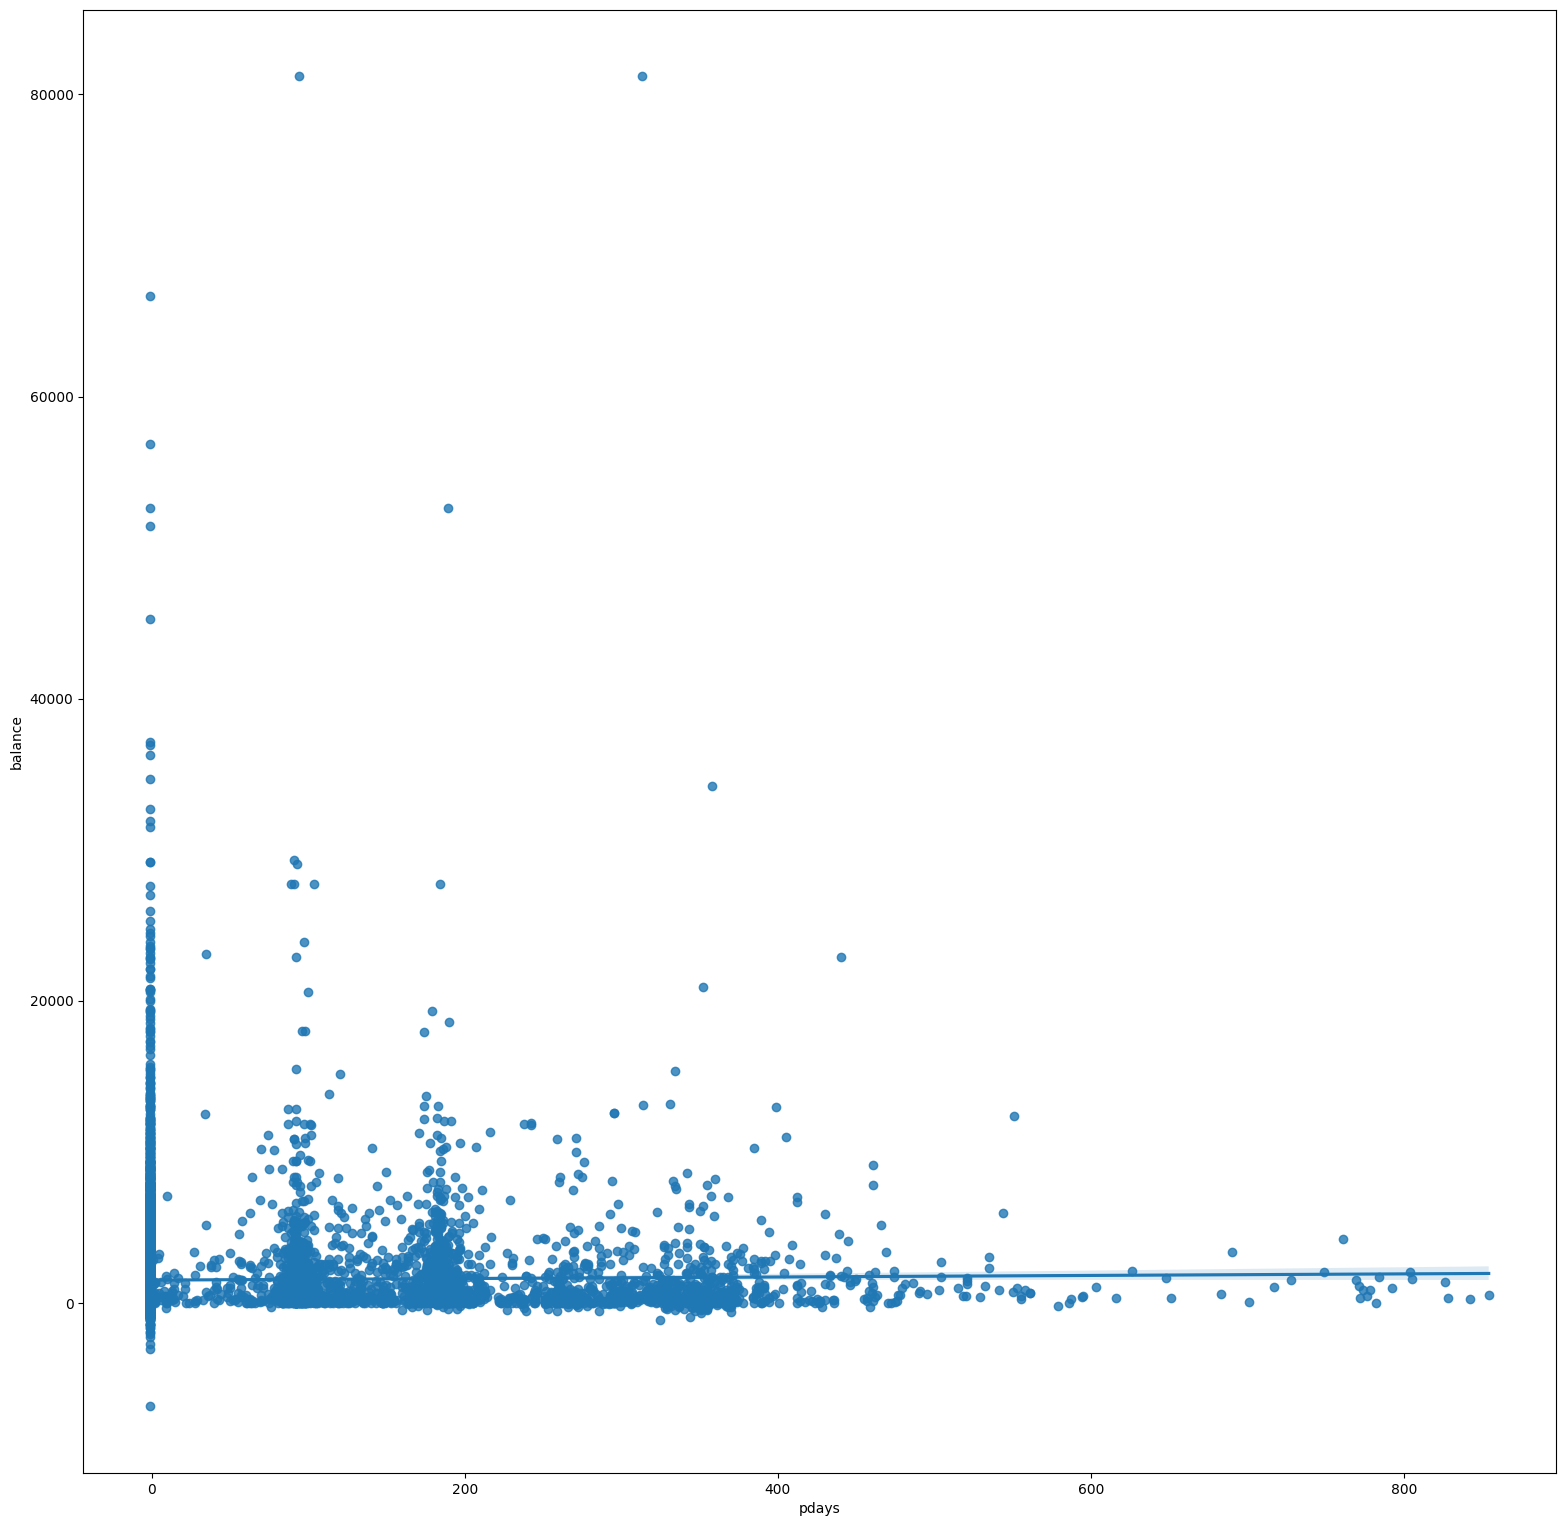

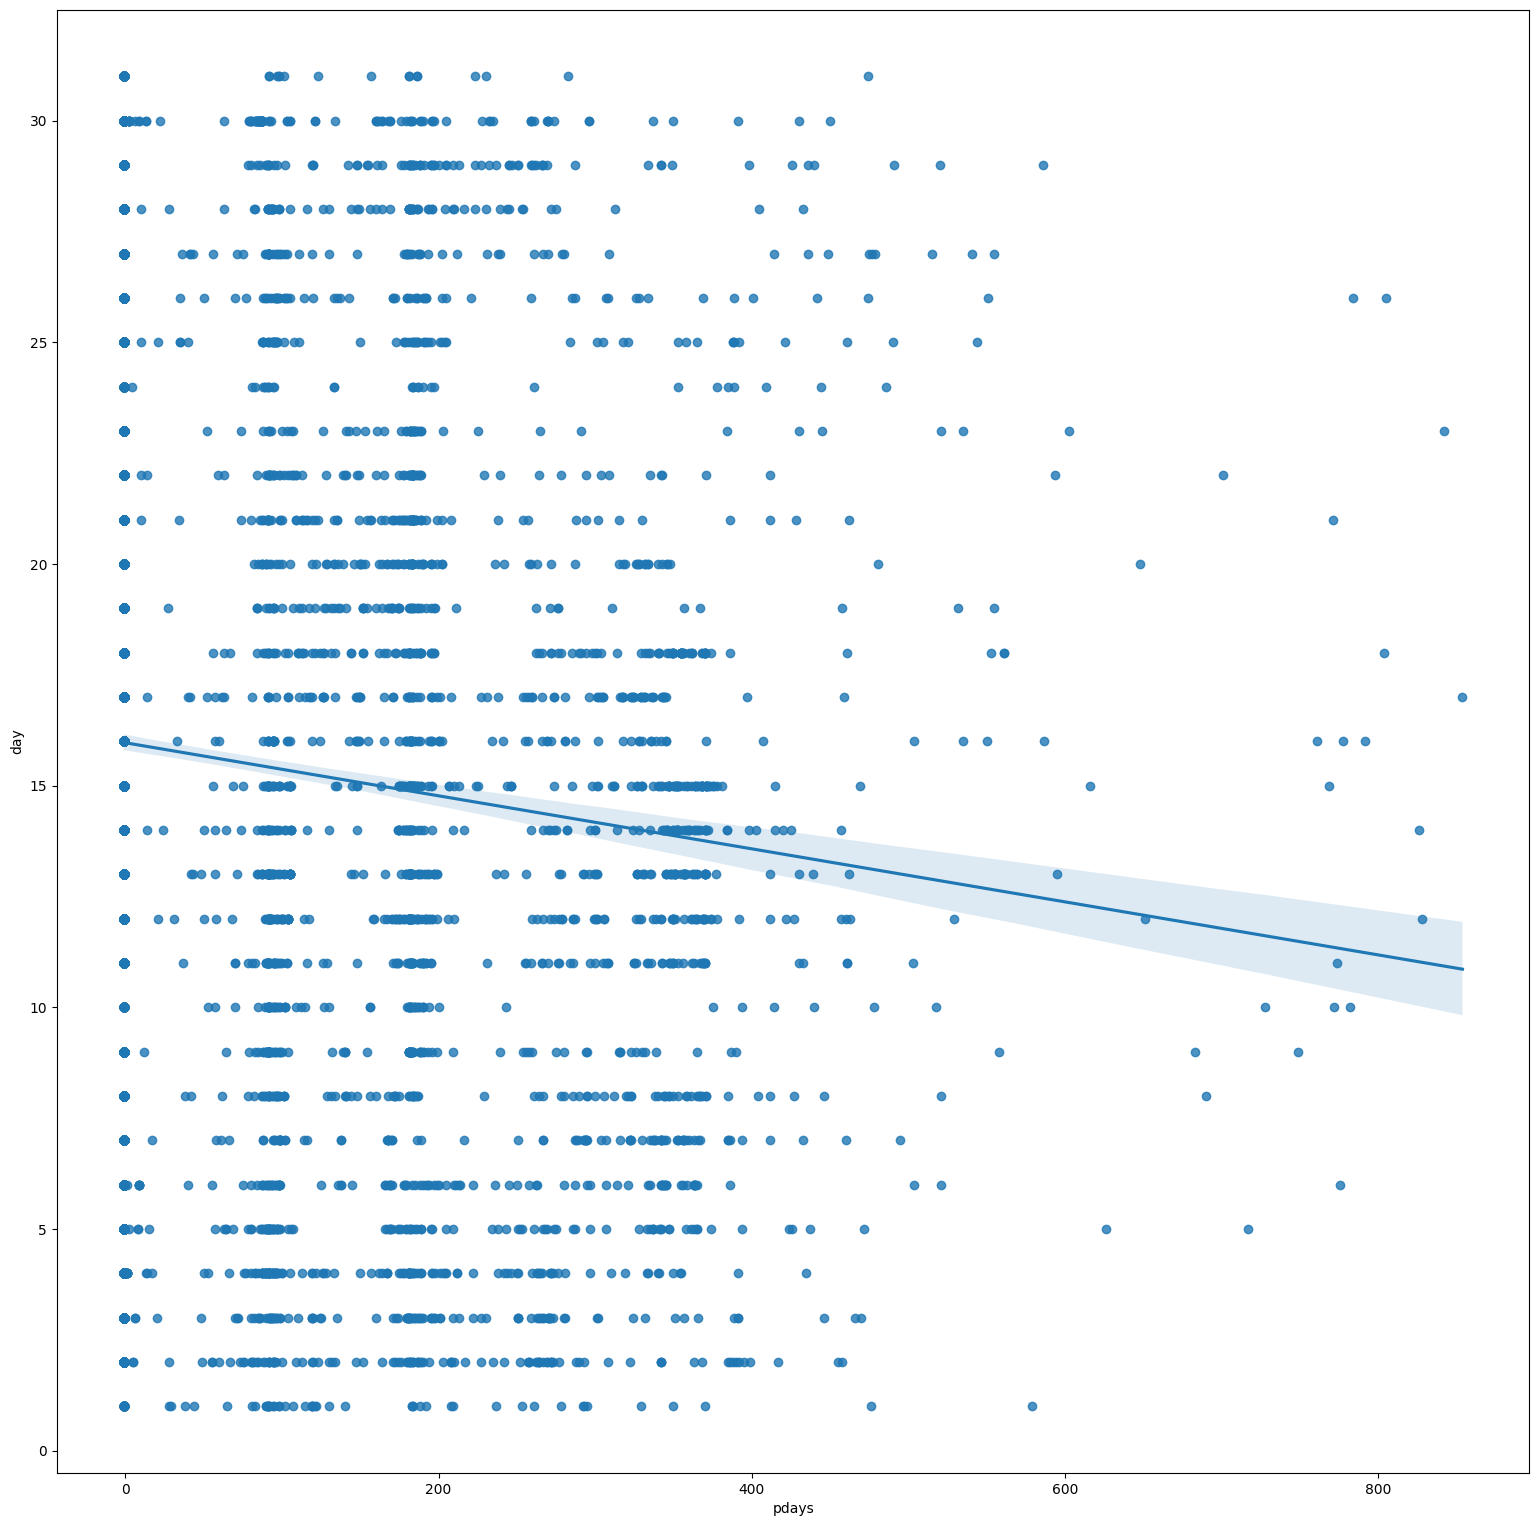

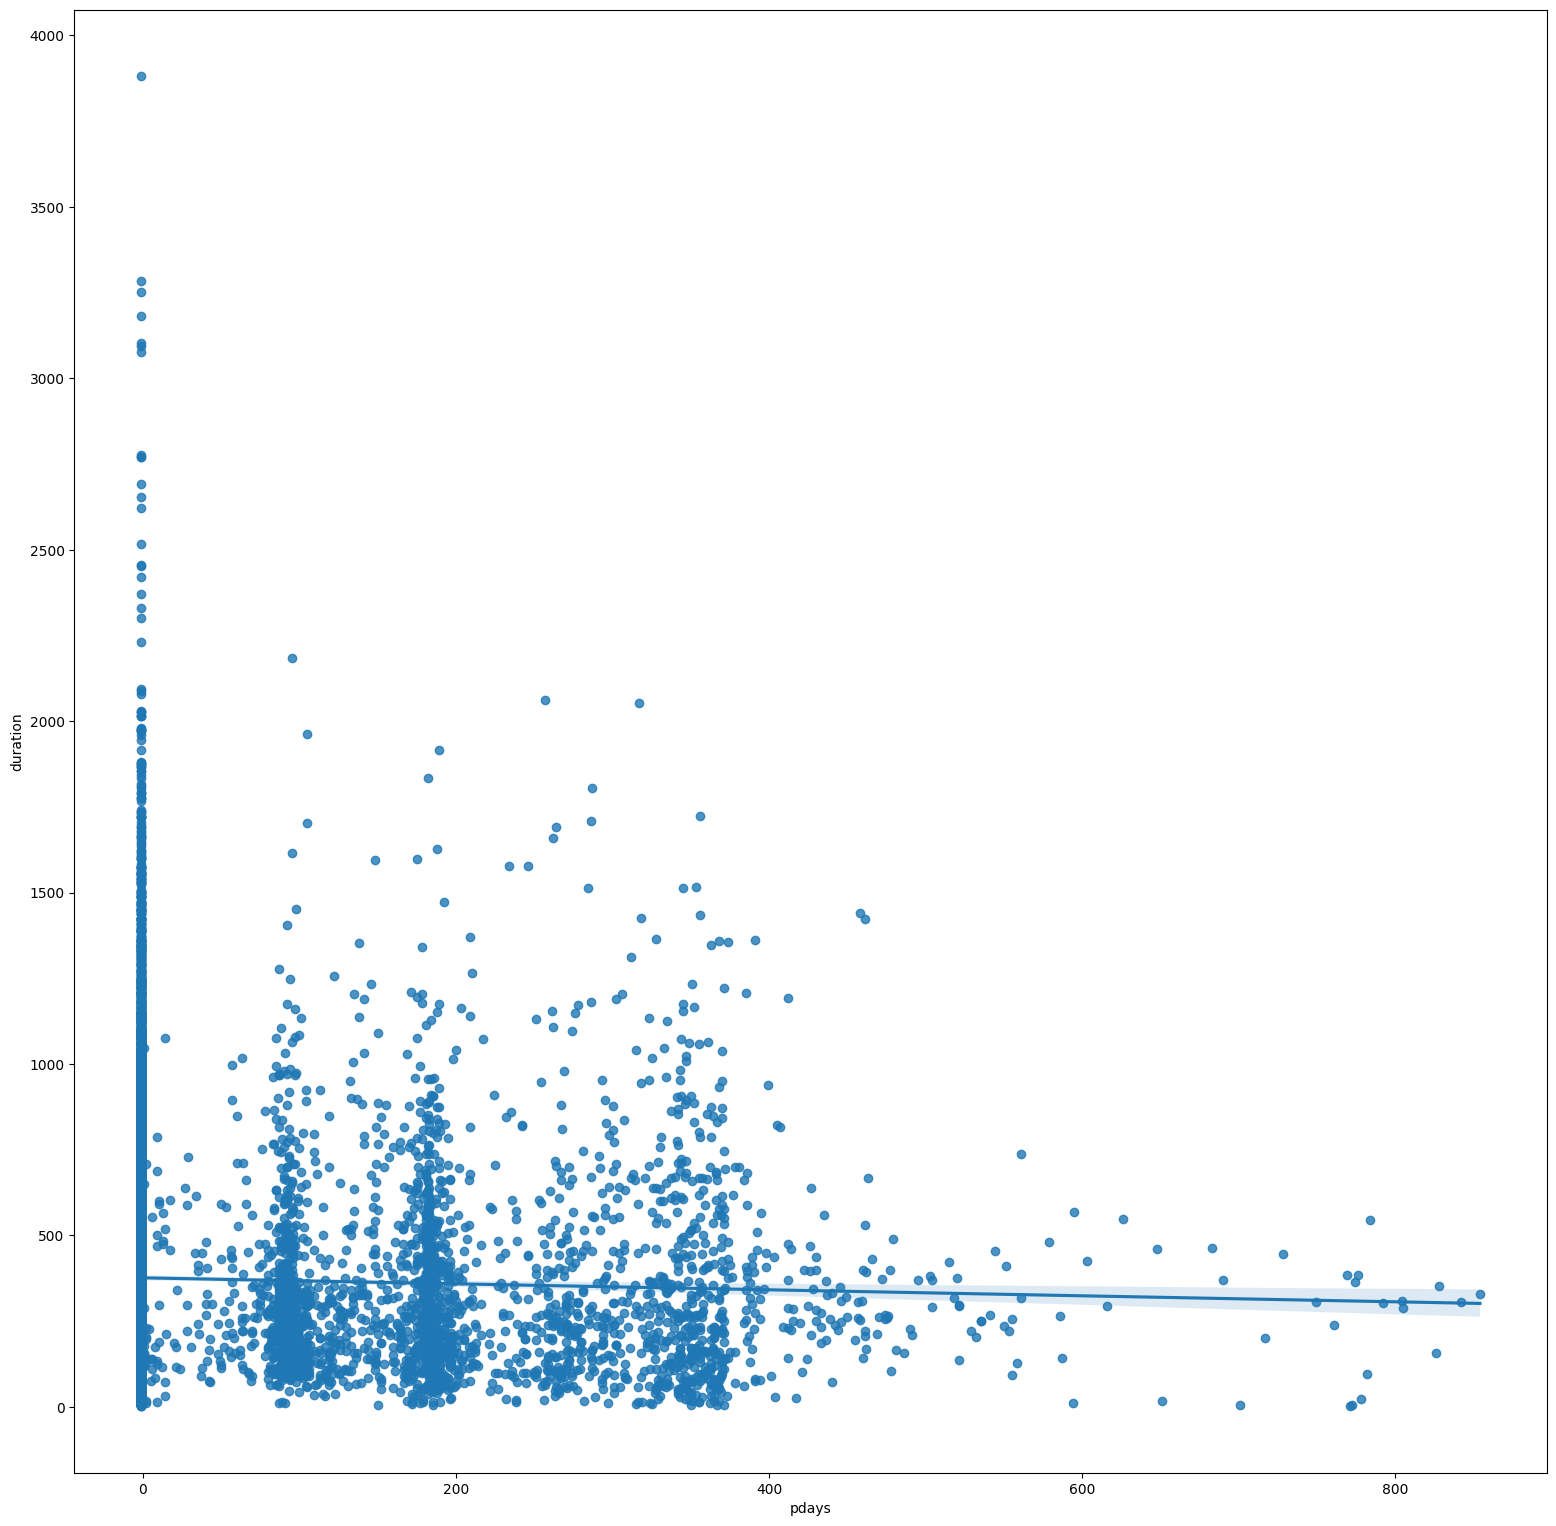

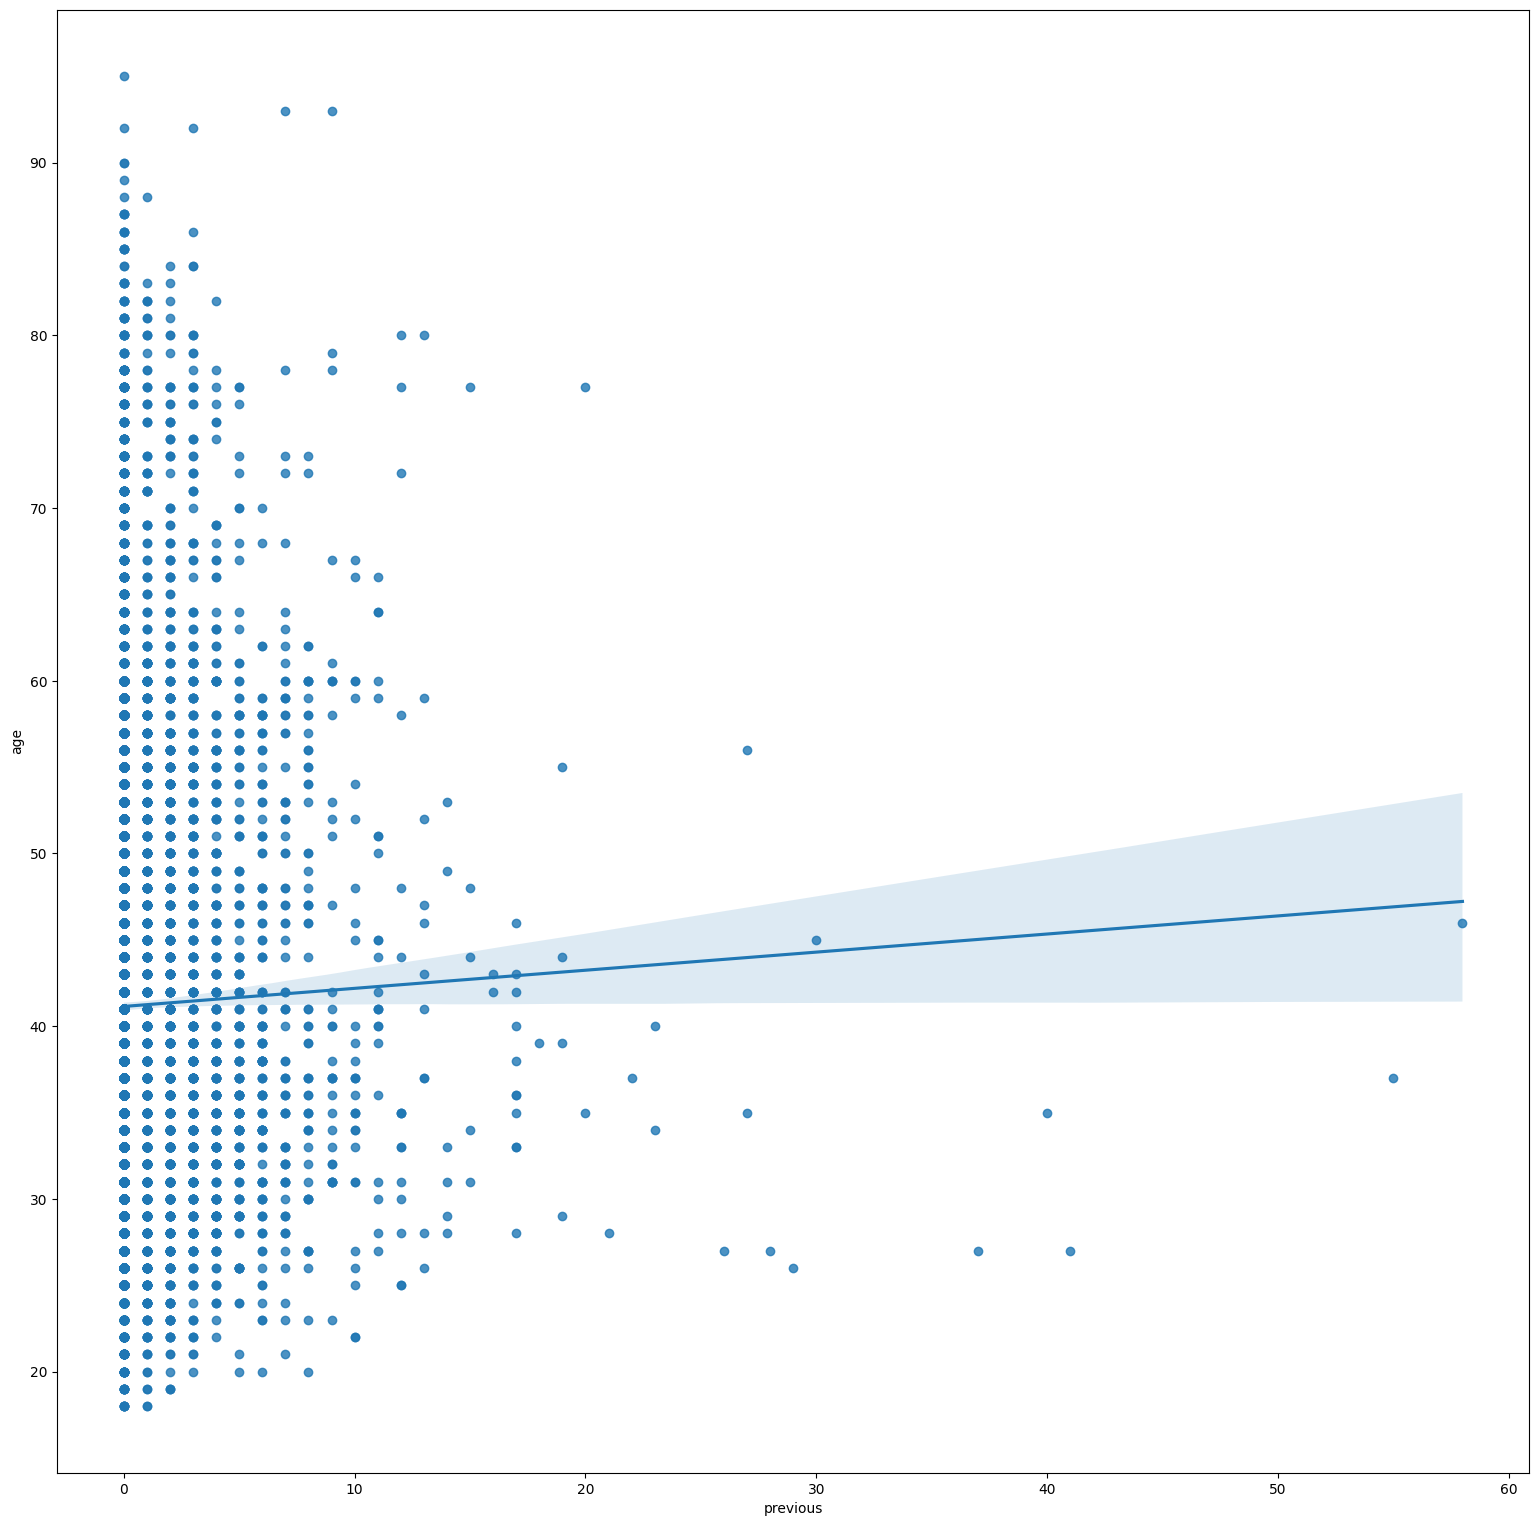

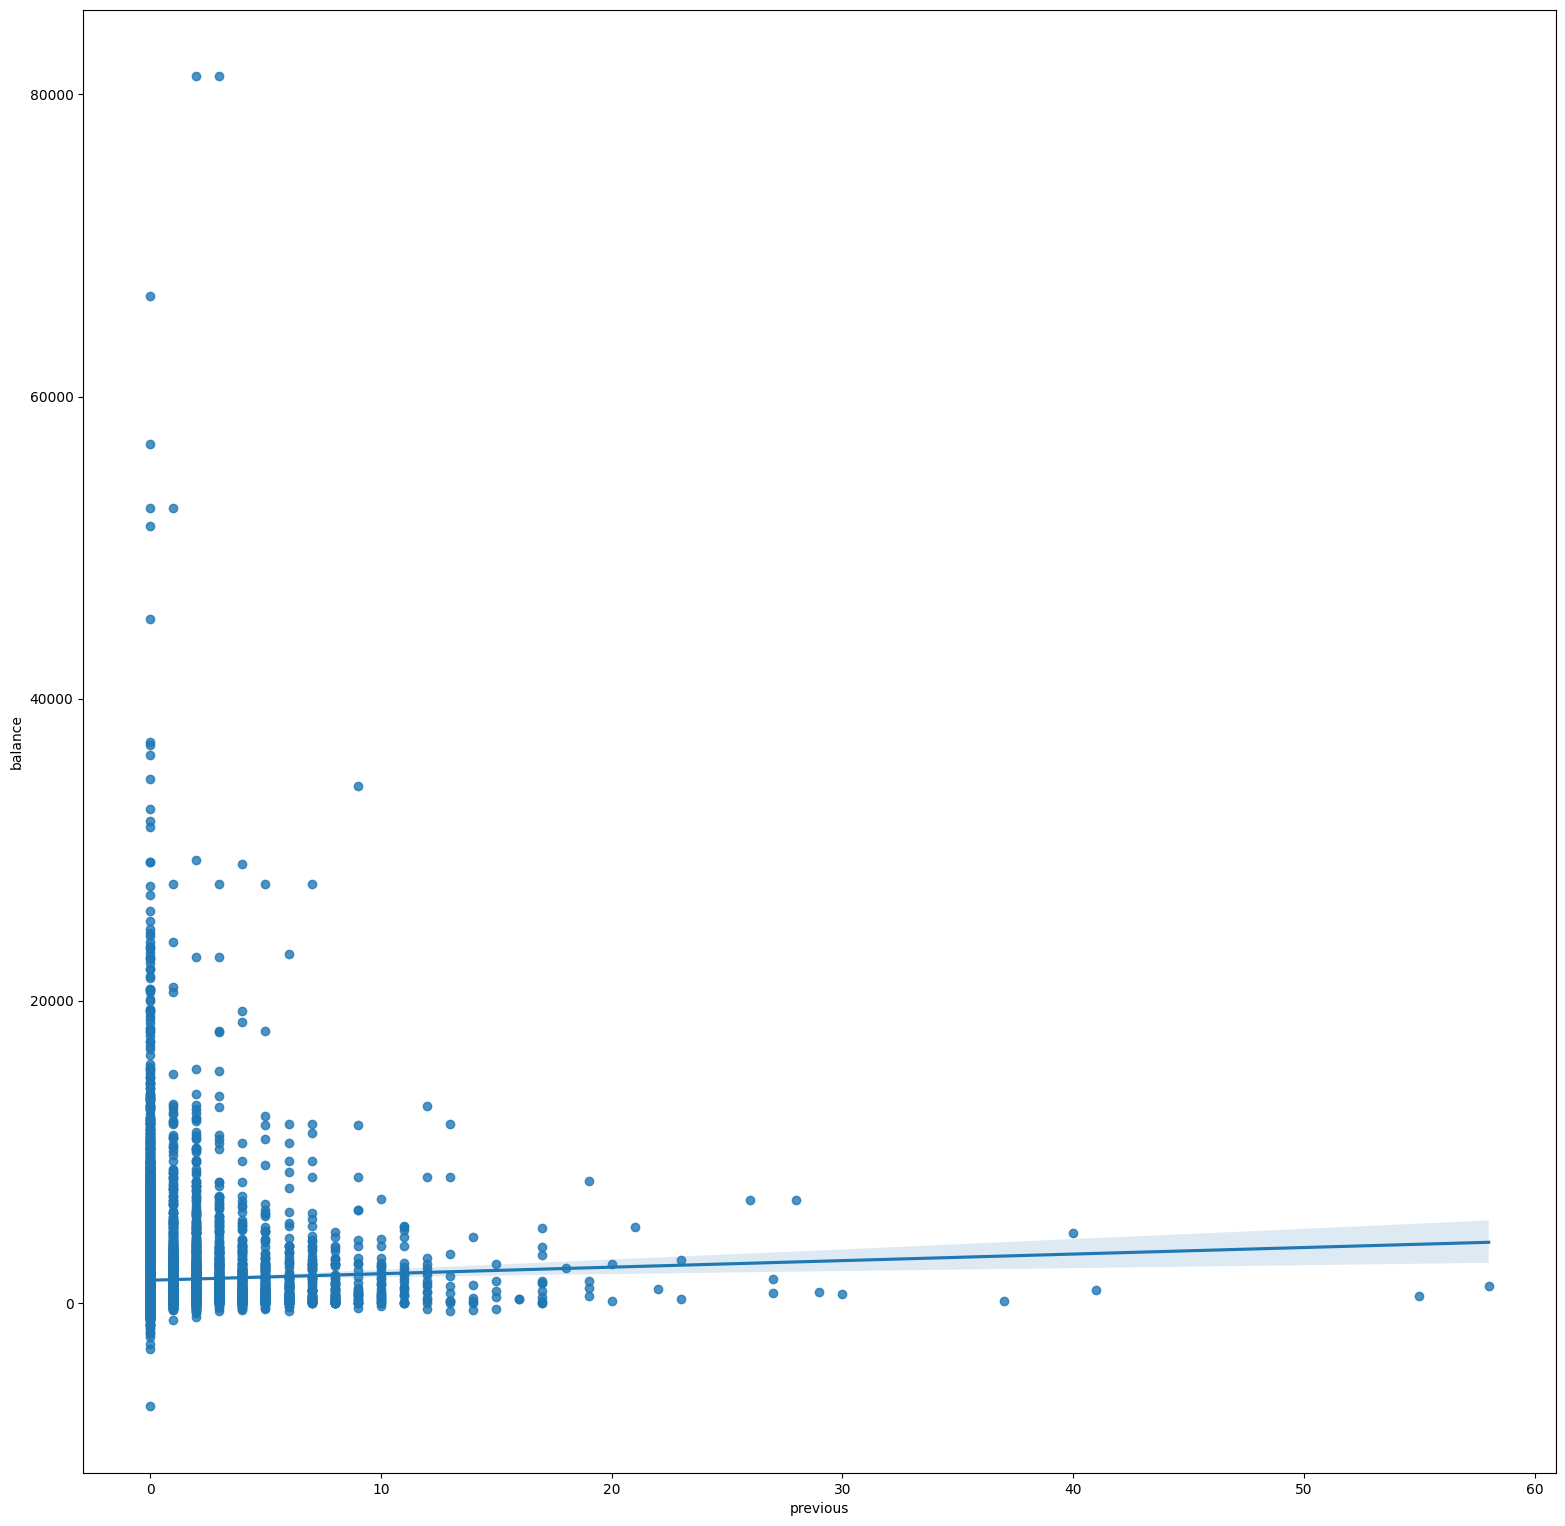

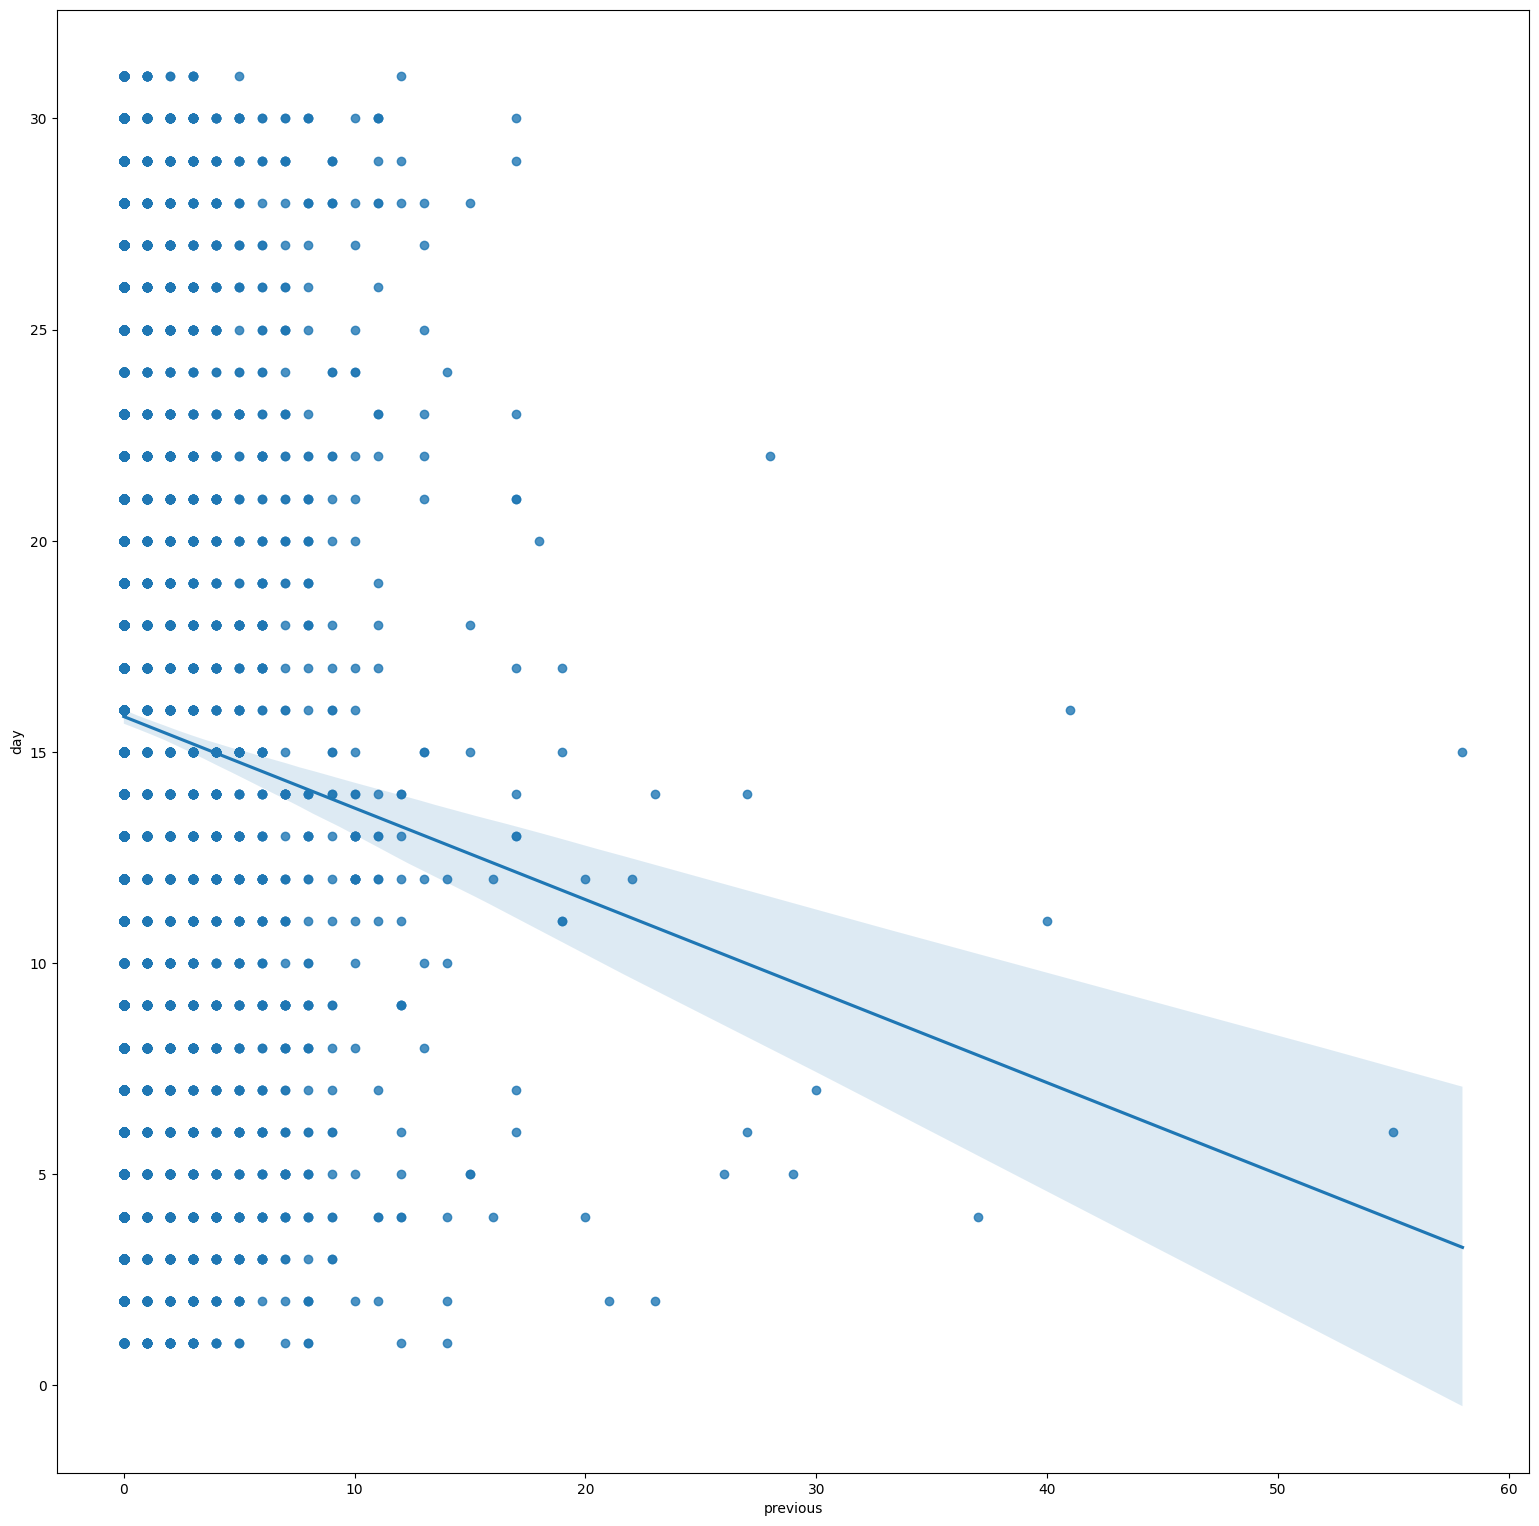

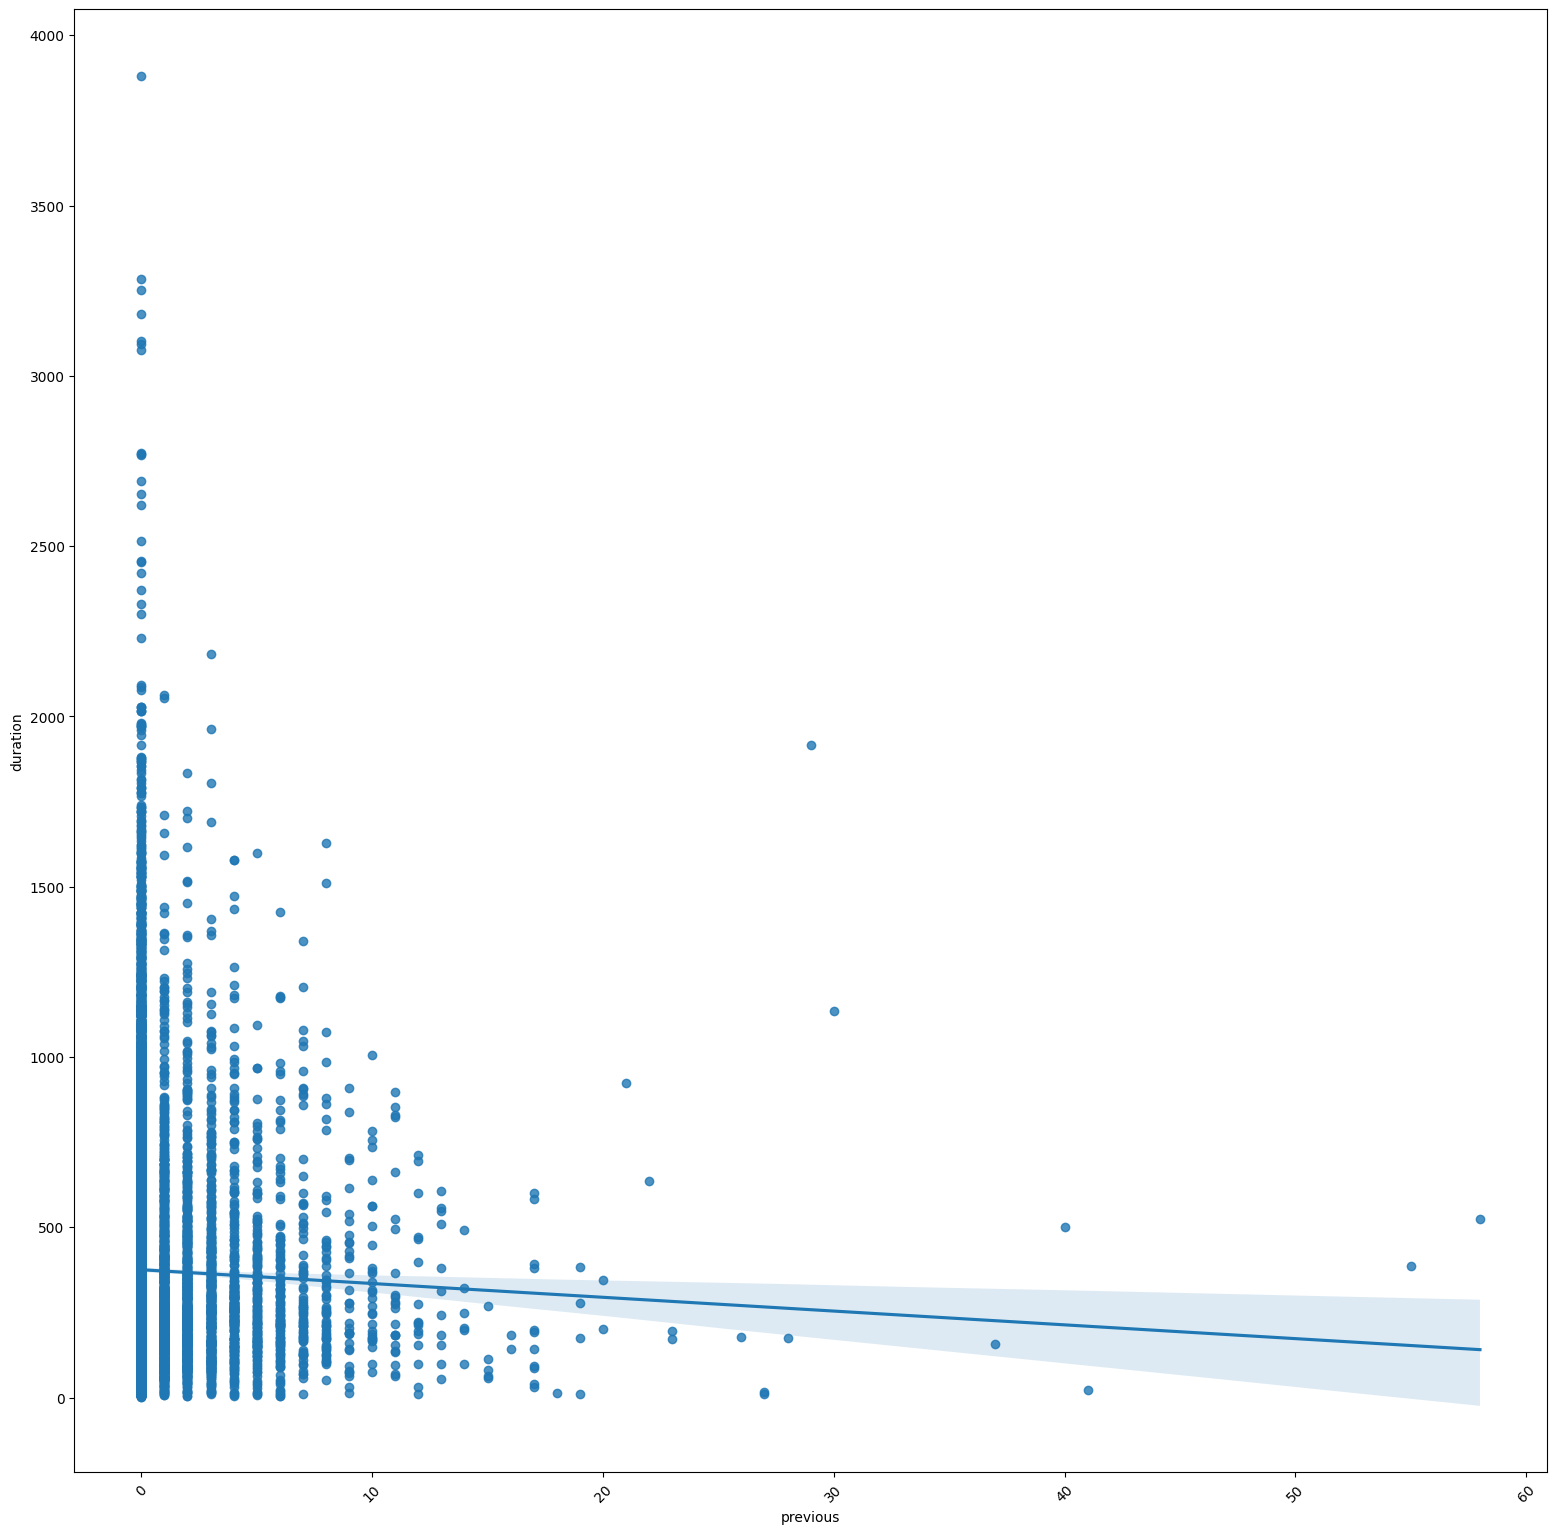

In [75]:
int_int(data)

In [76]:
def cat_int(dataframe) :
   contour = dataframe.select_dtypes("object").shape[1] if dataframe.select_dtypes("object").shape[1]%2==0 else dataframe.select_dtypes("object").shape[1]//2+1
   
   for i, col in enumerate(dataframe.select_dtypes("object")) : 
      for co in dataframe.select_dtypes("int") :
            plt.figure(figsize=(8,8))
            sn.boxplot(dataframe,x=col,y=co,hue="default") 
            plt.xticks(rotation=45)  
              


C:\Users\laurediekabala\AppData\Local\Temp\ipykernel_10344\890171746.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,8))


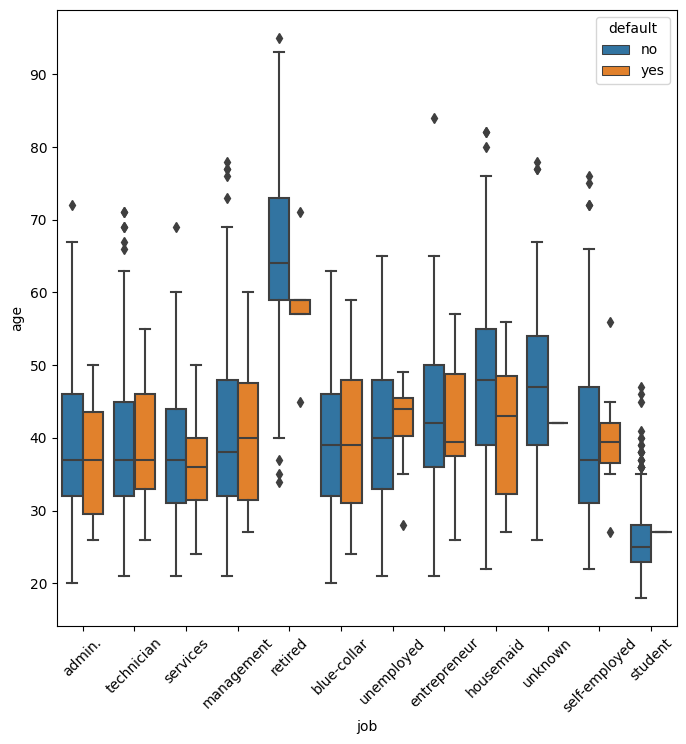

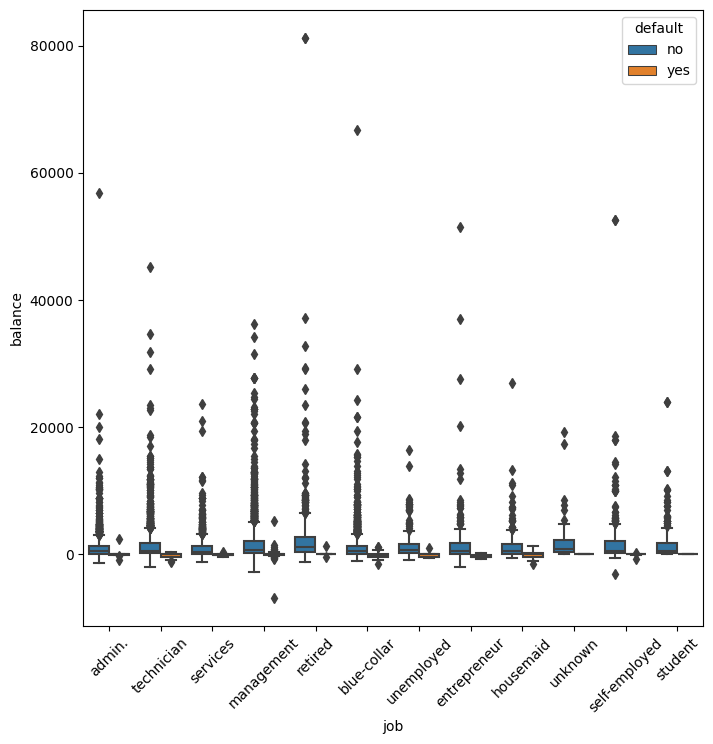

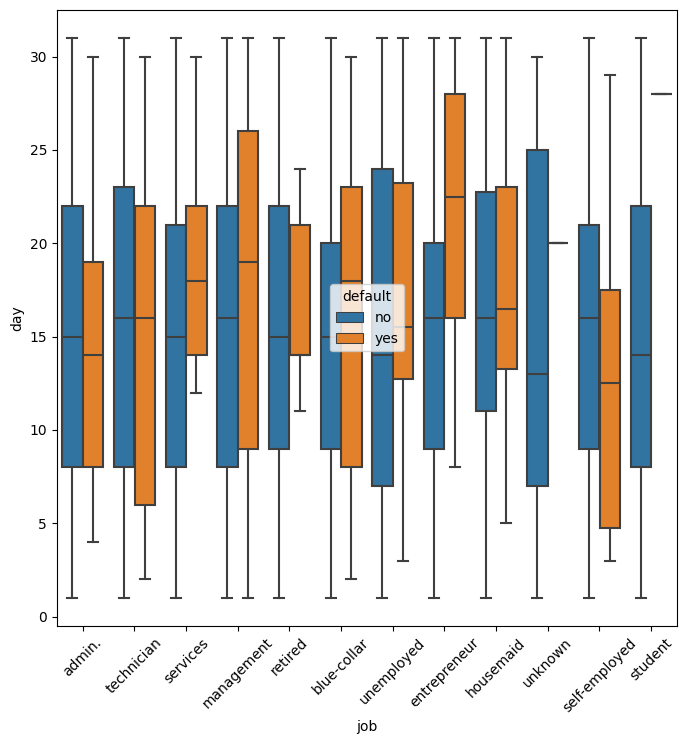

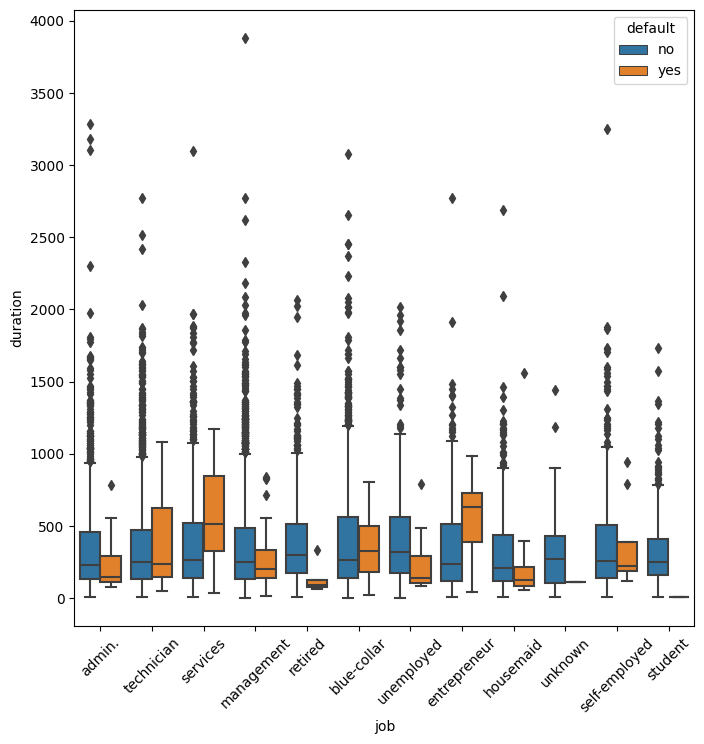

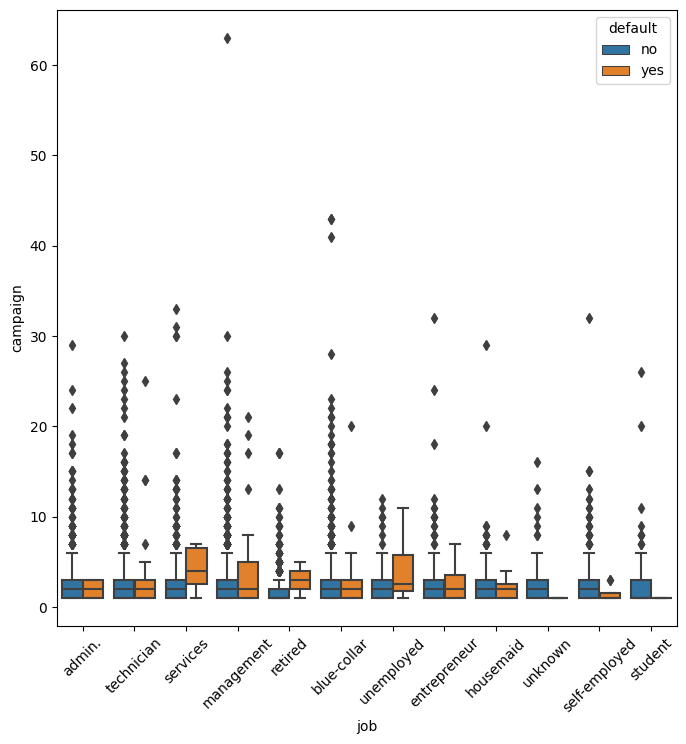

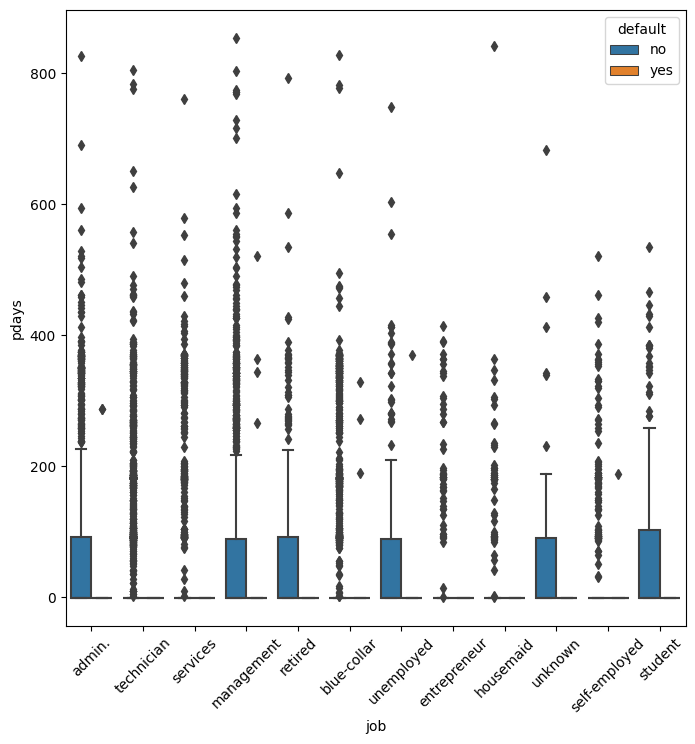

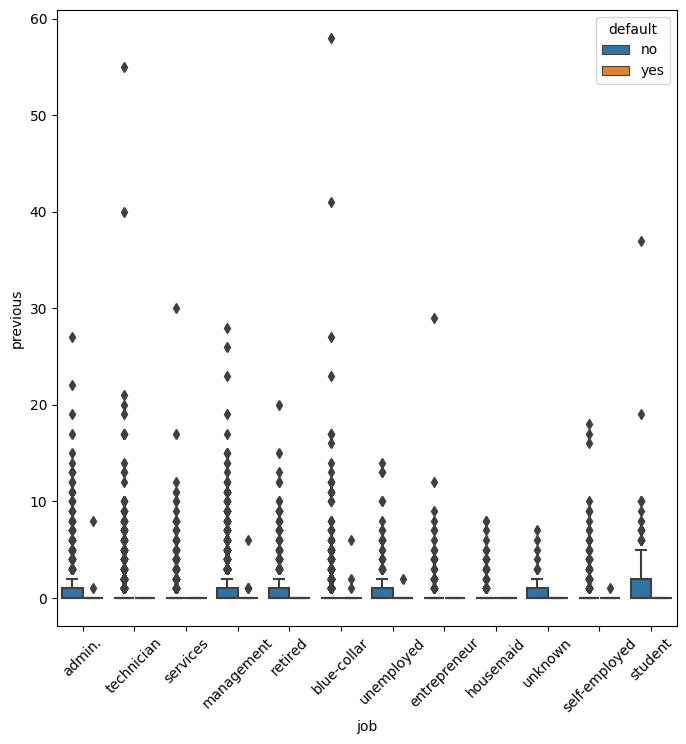

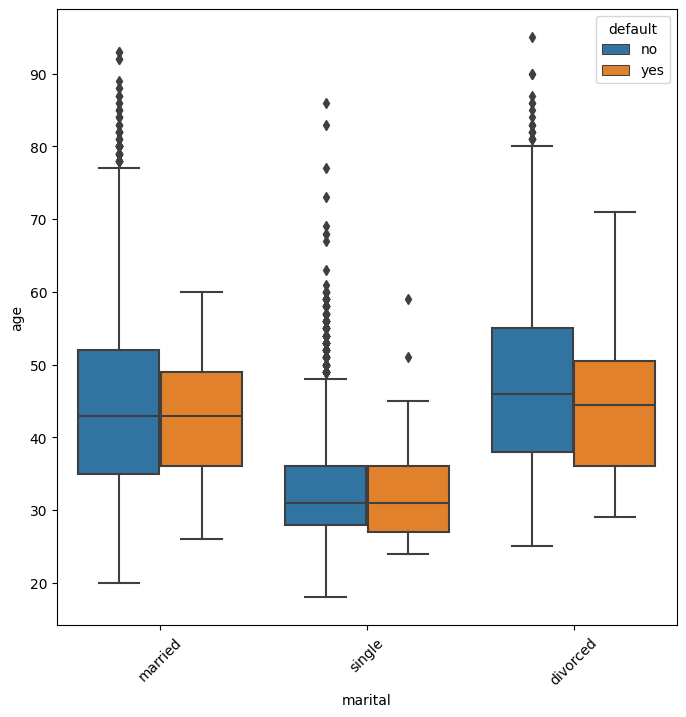

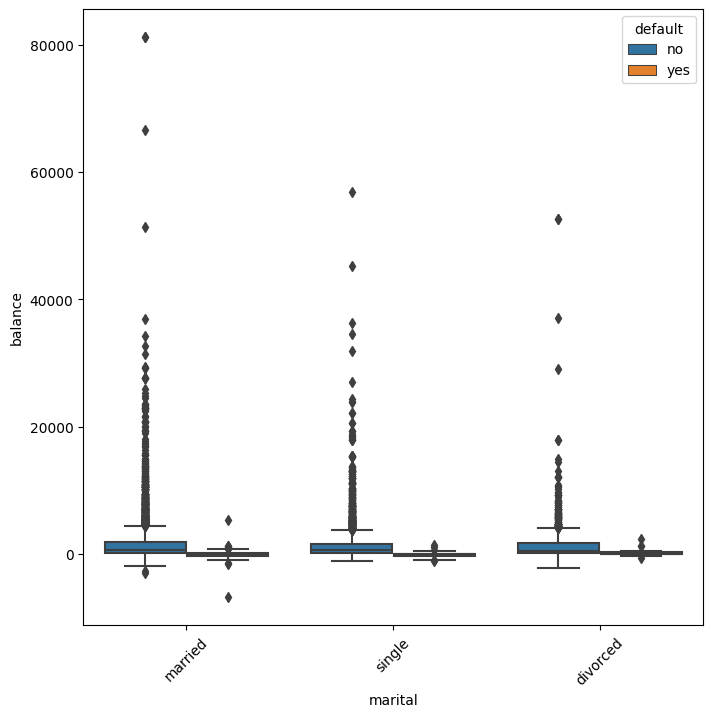

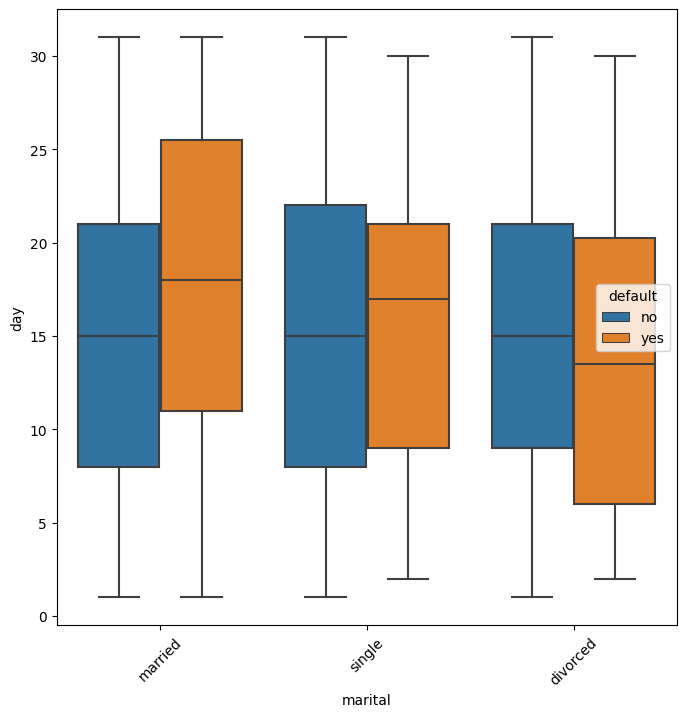

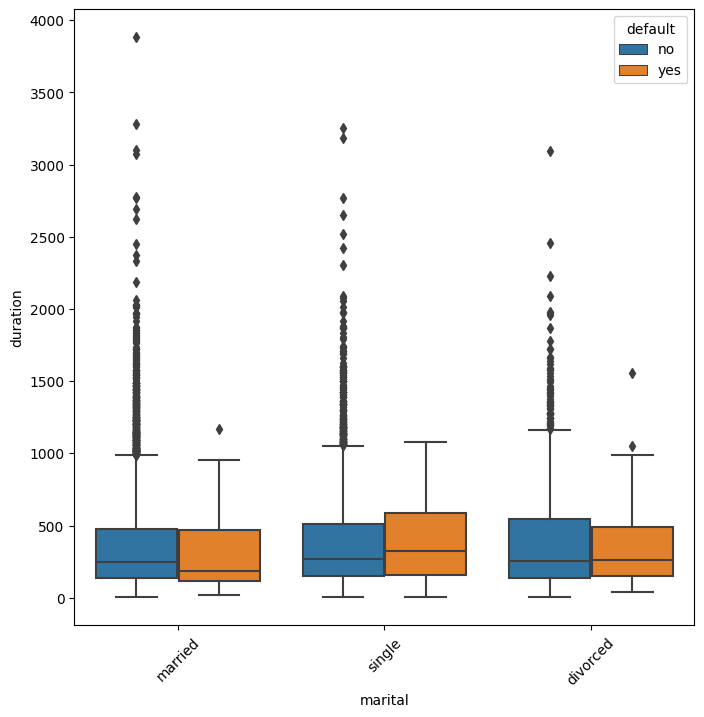

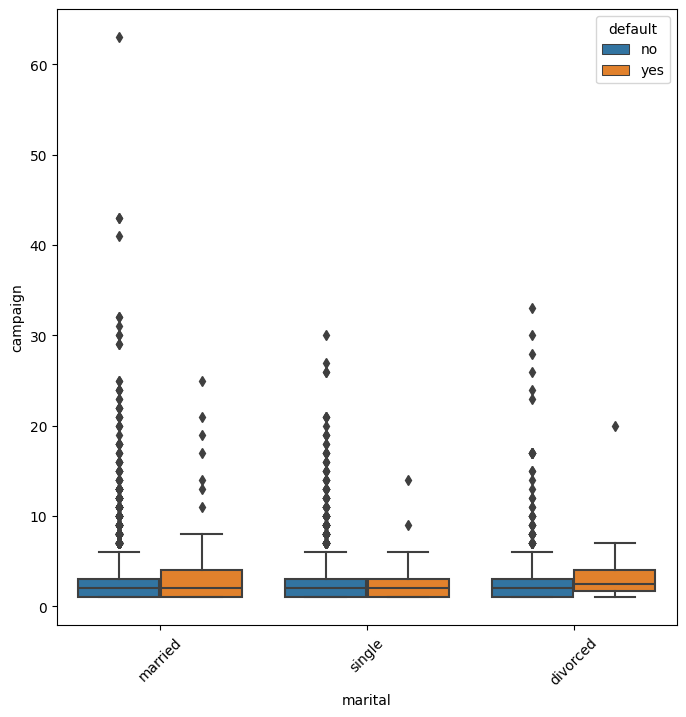

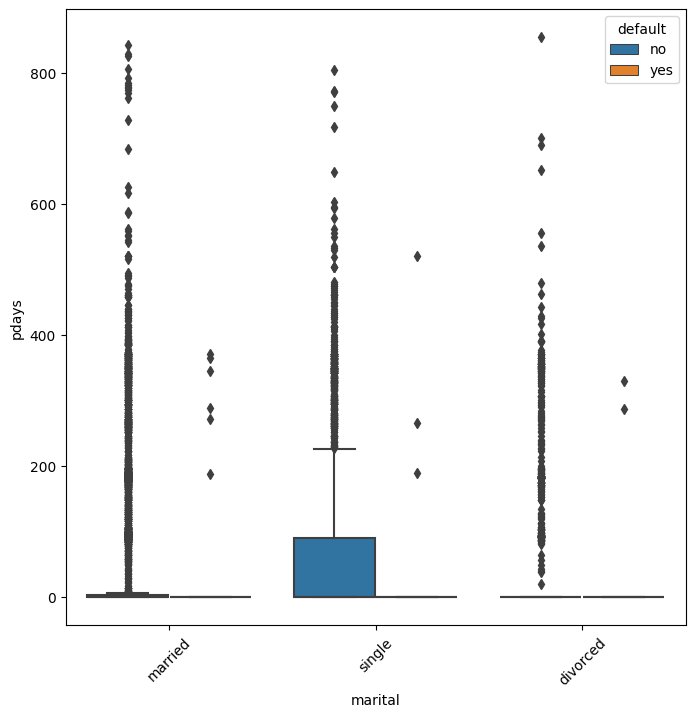

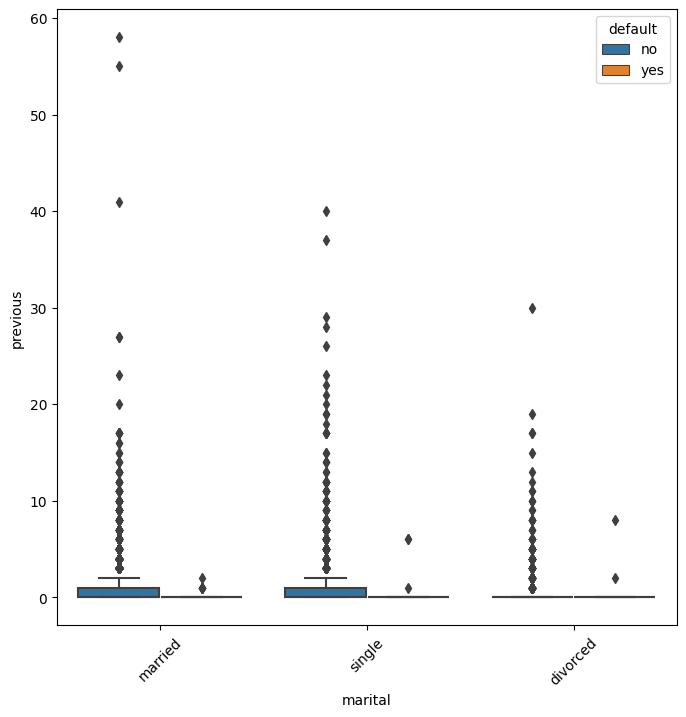

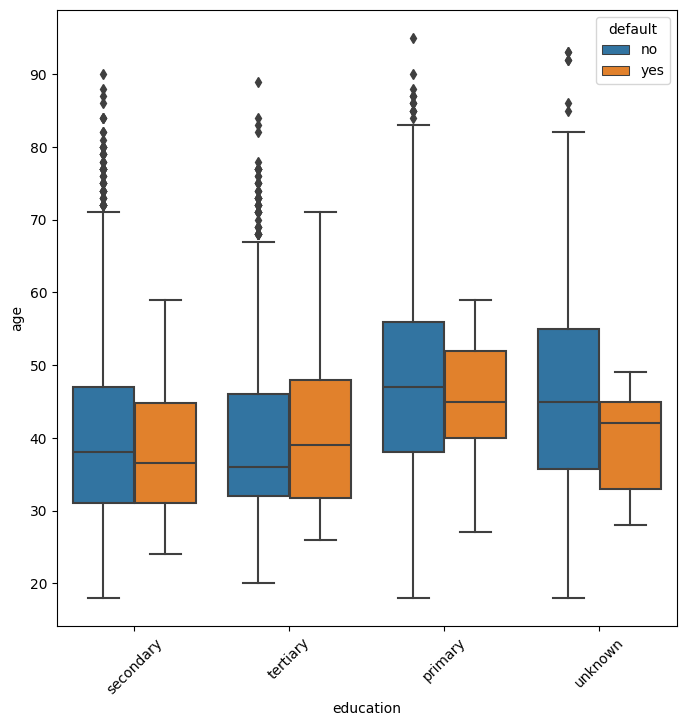

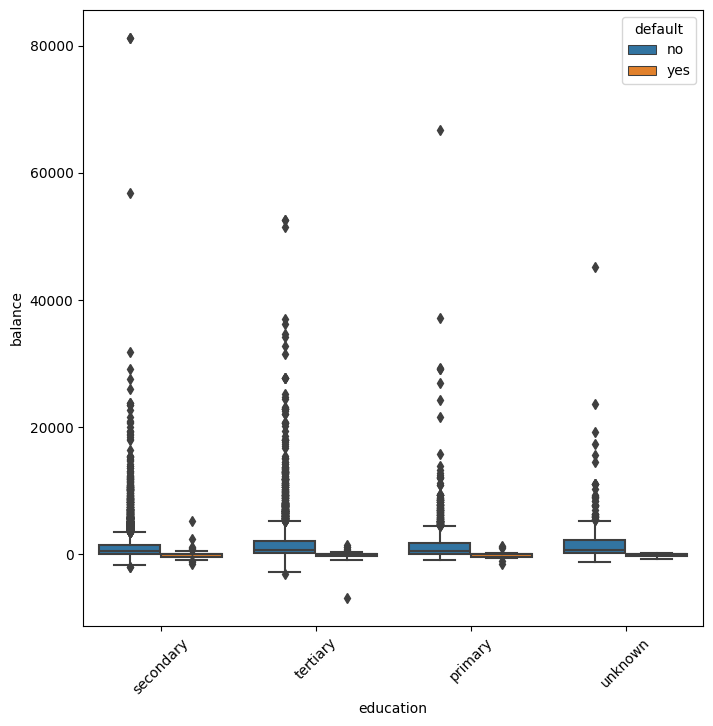

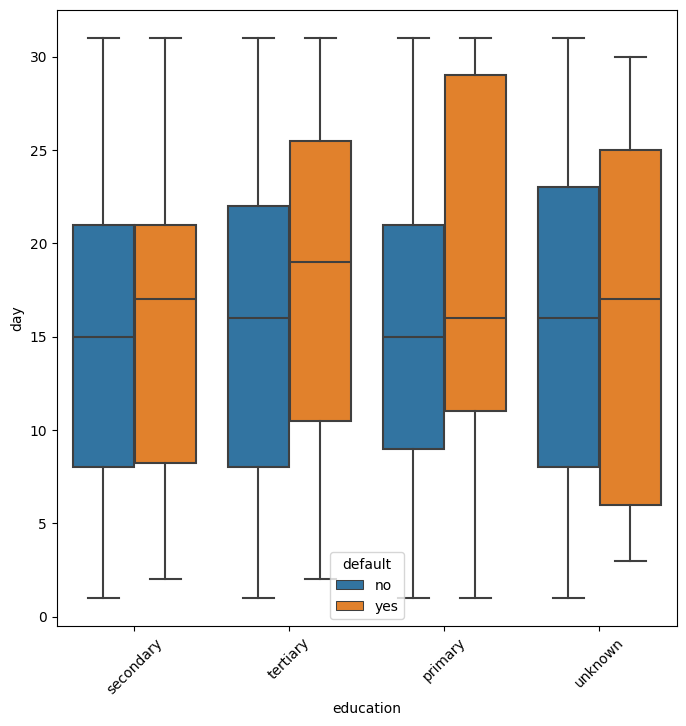

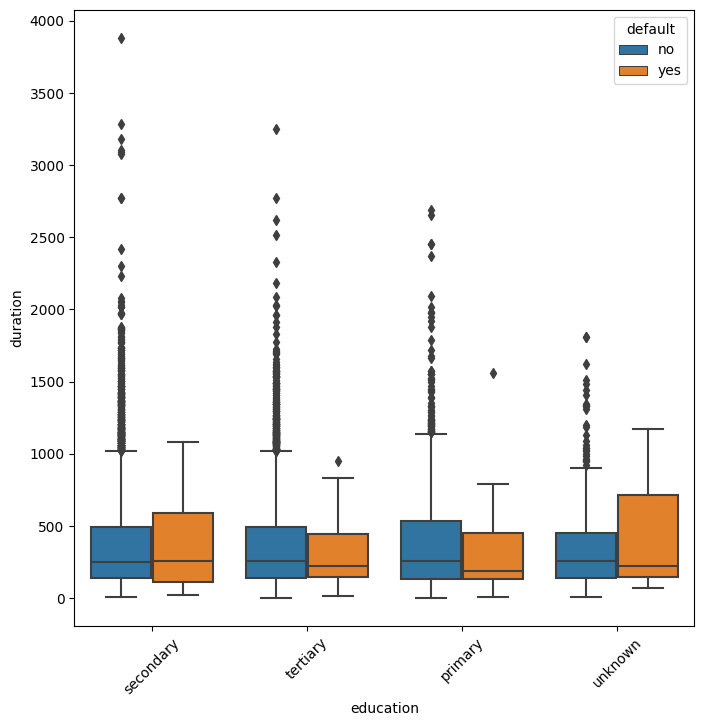

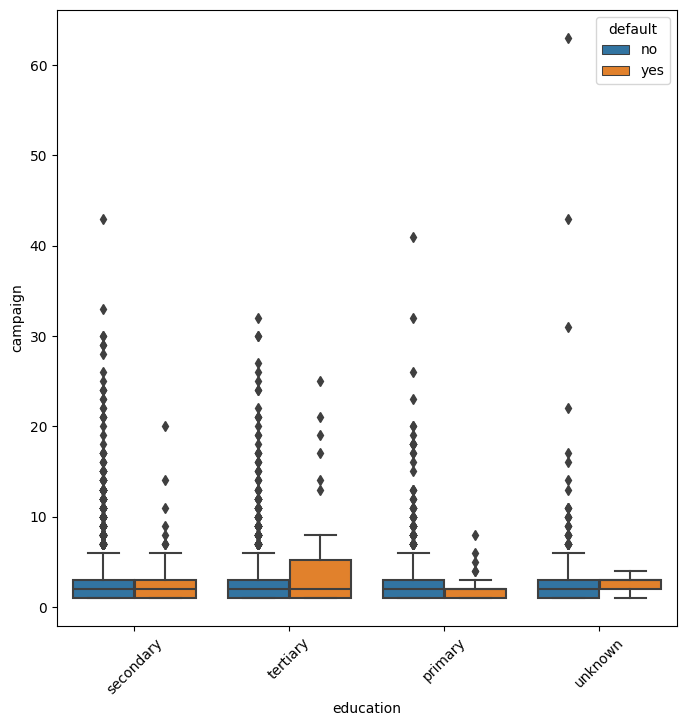

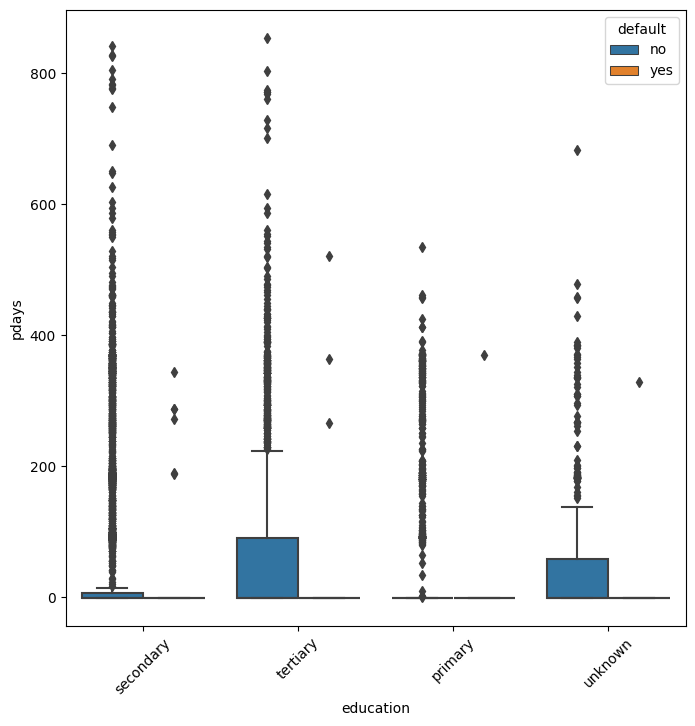

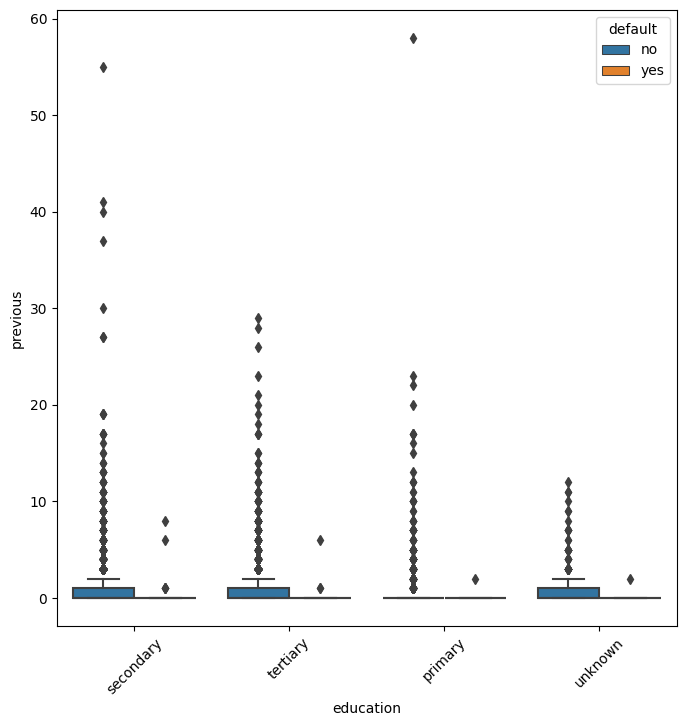

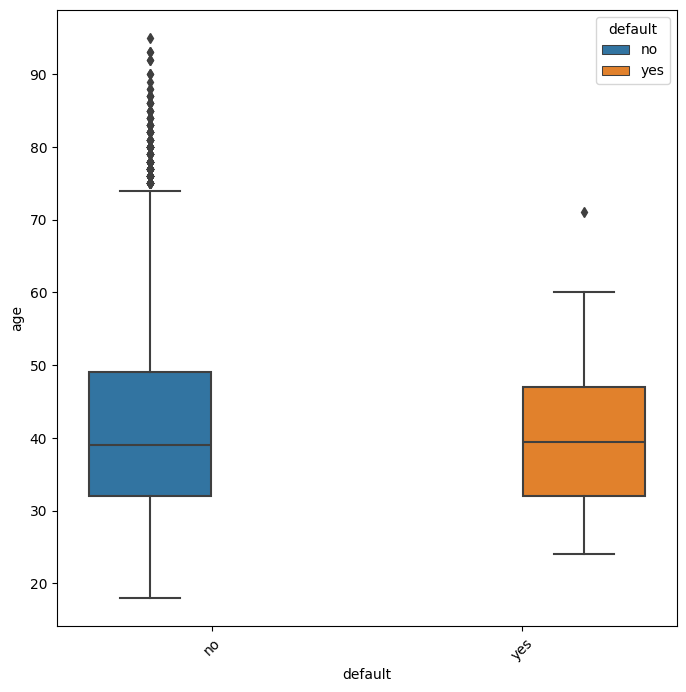

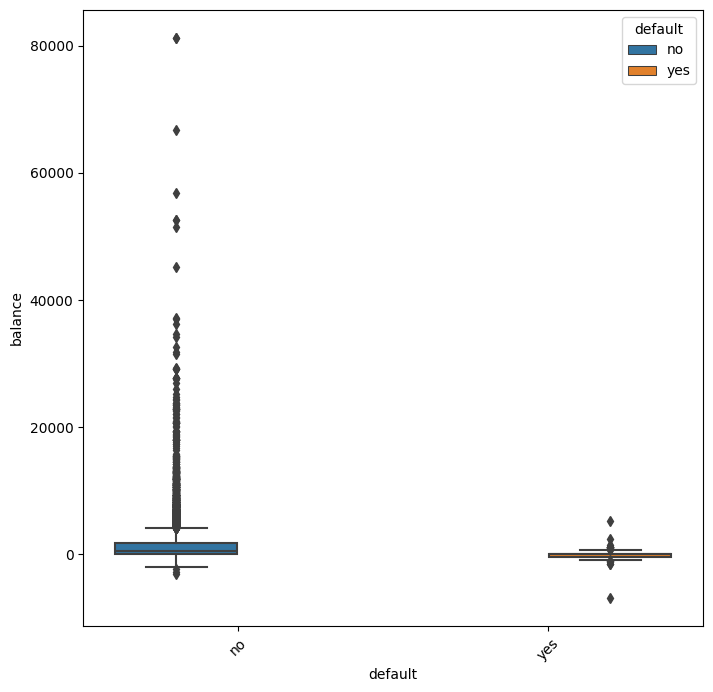

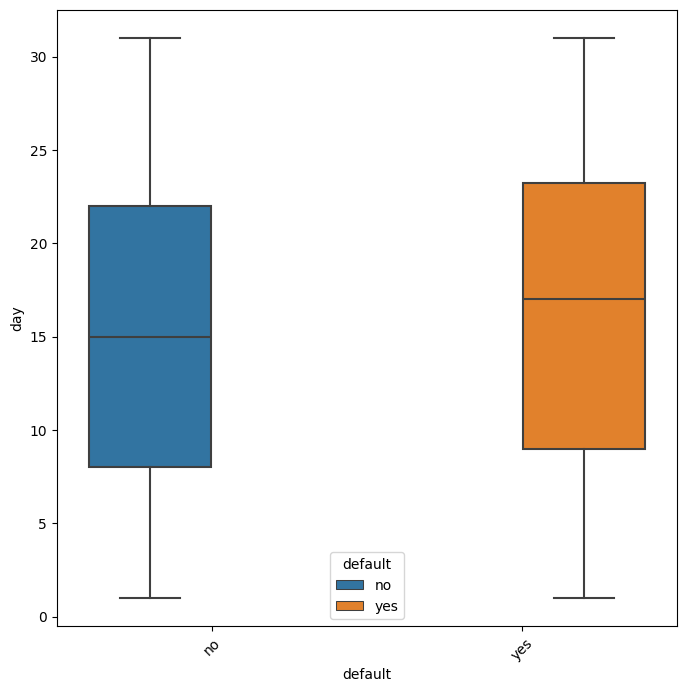

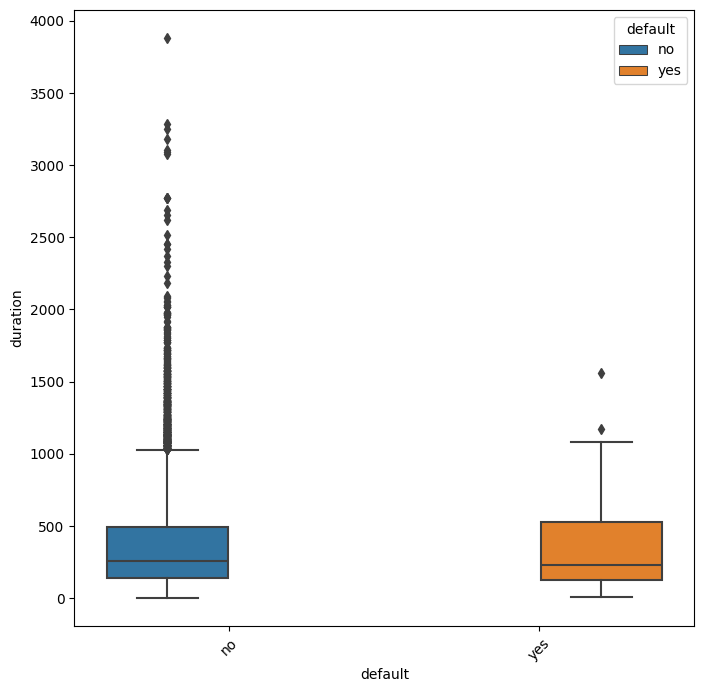

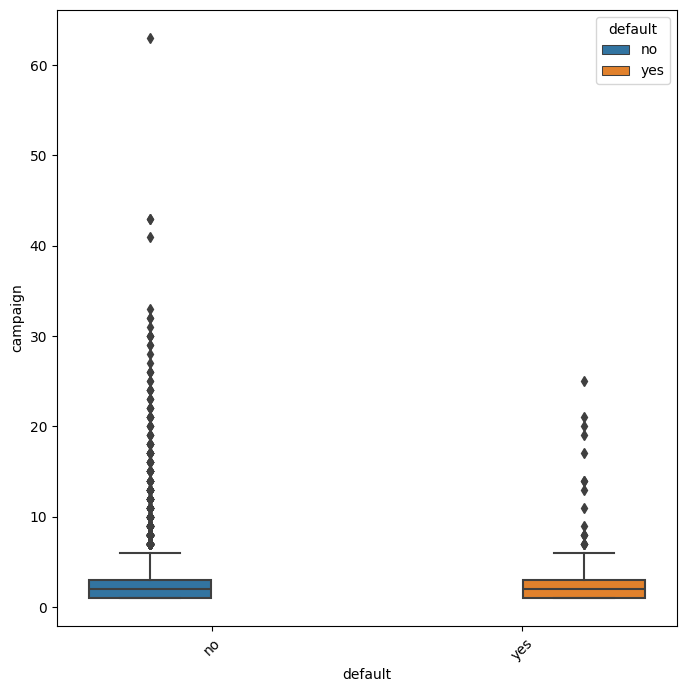

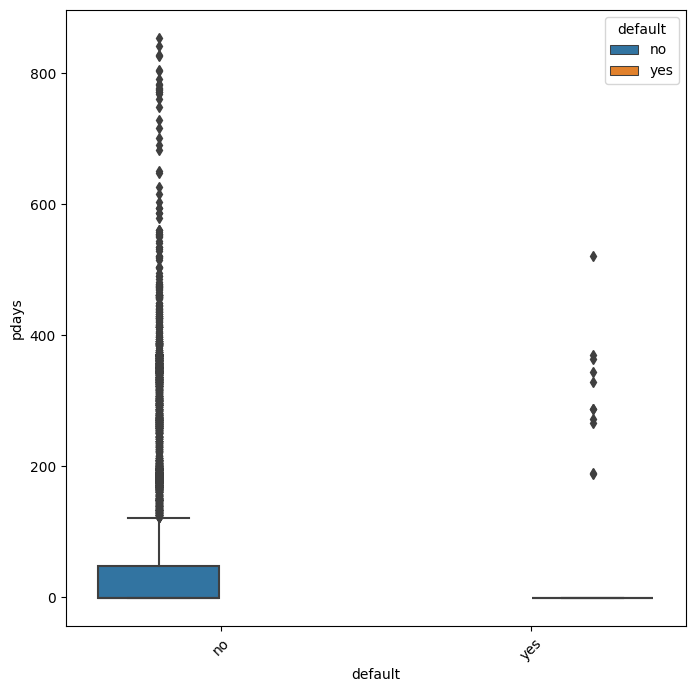

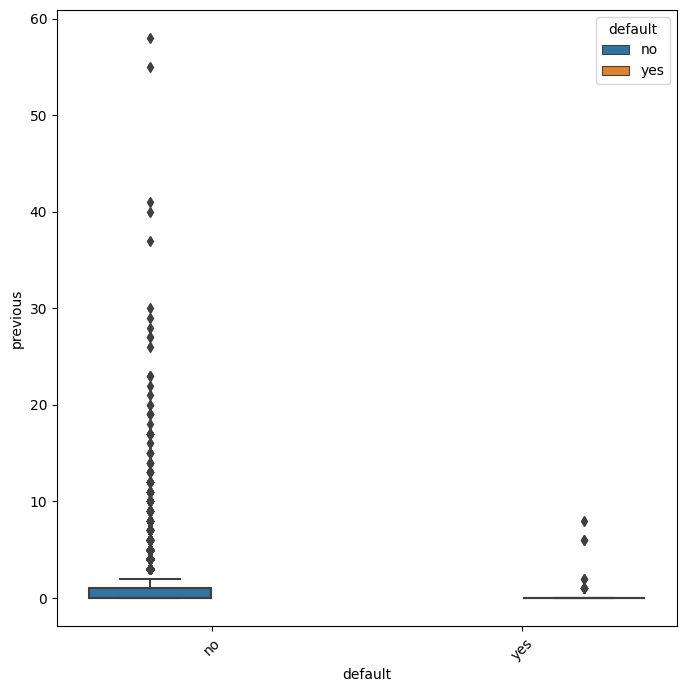

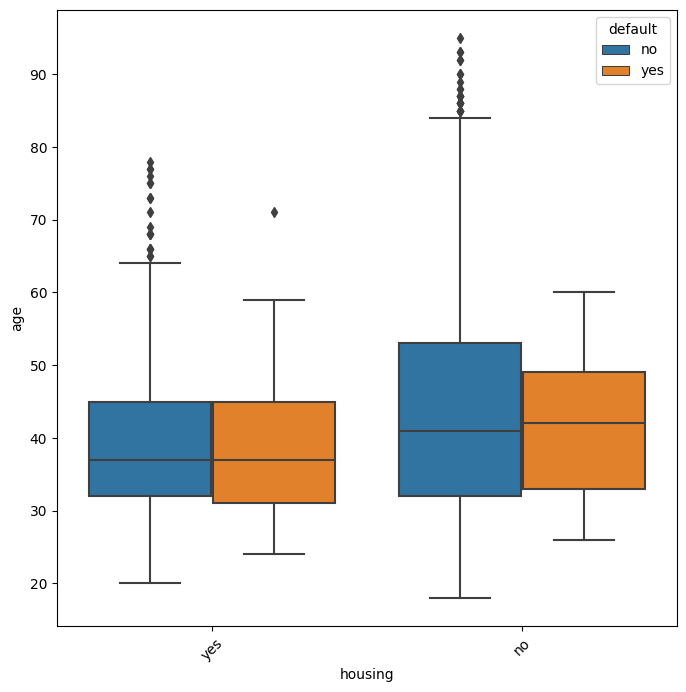

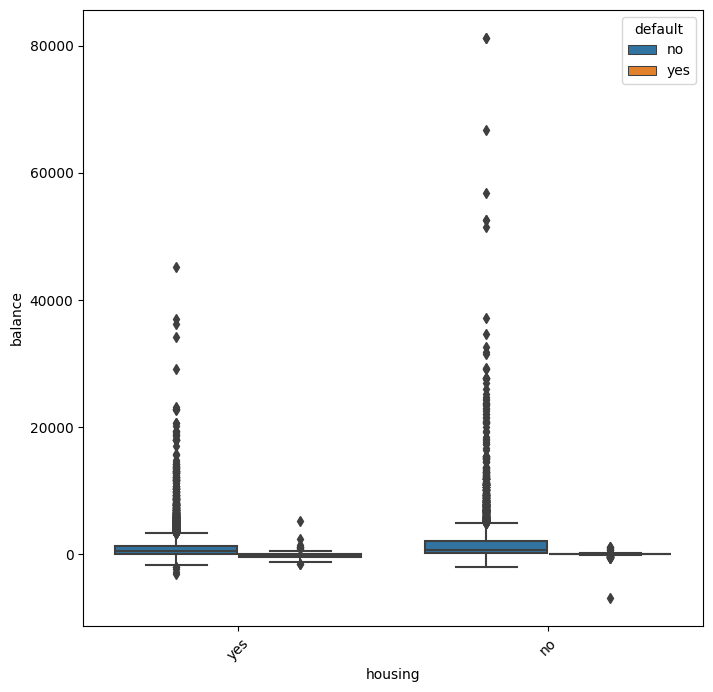

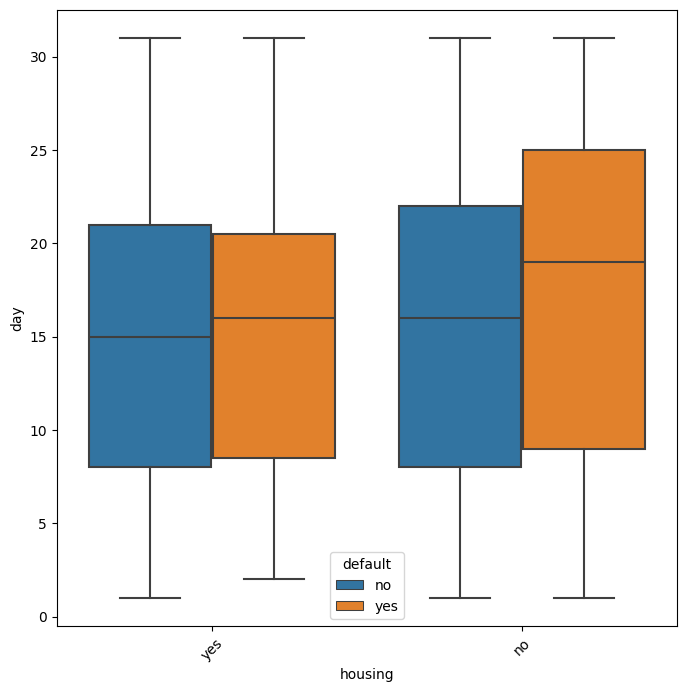

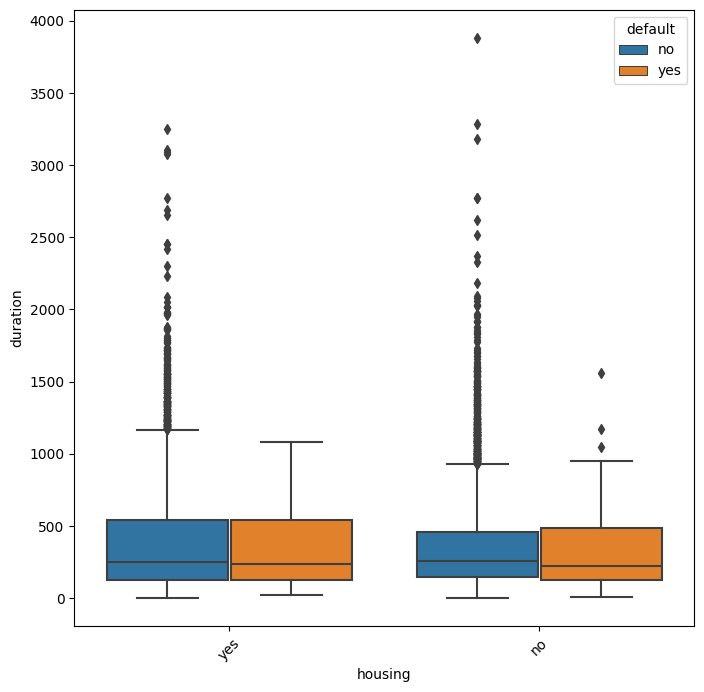

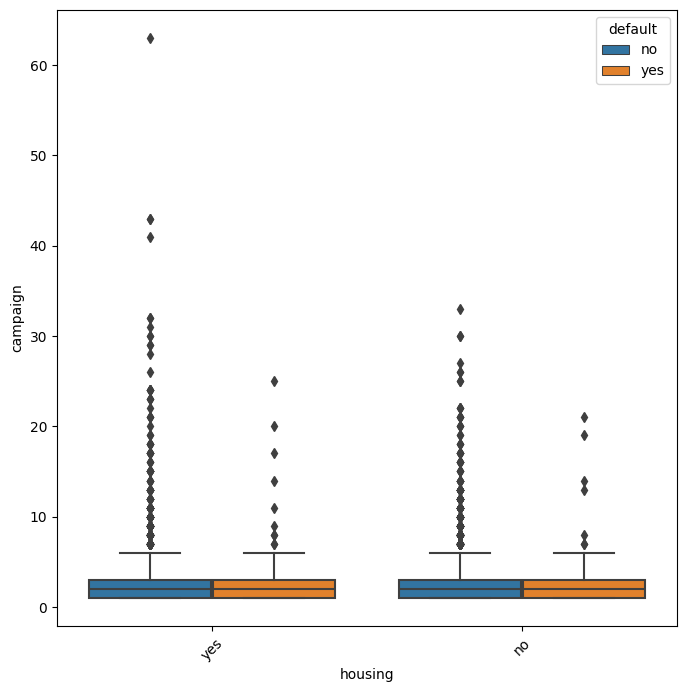

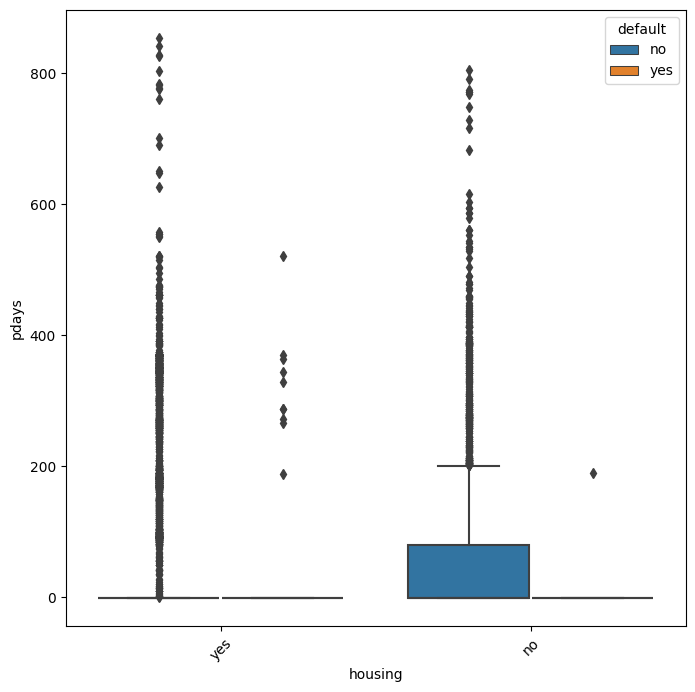

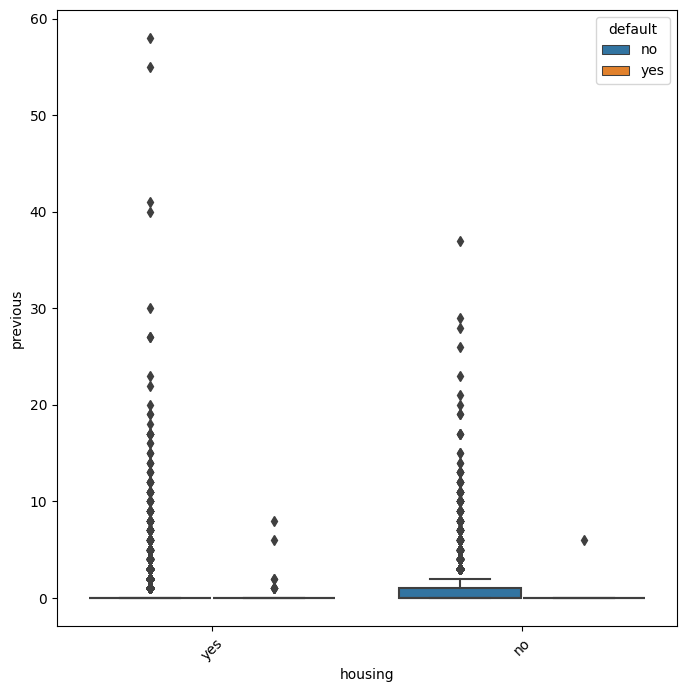

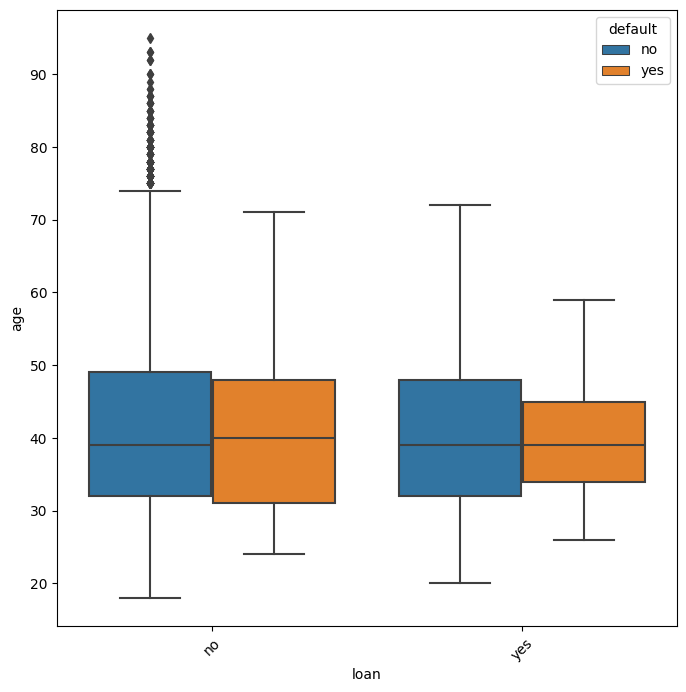

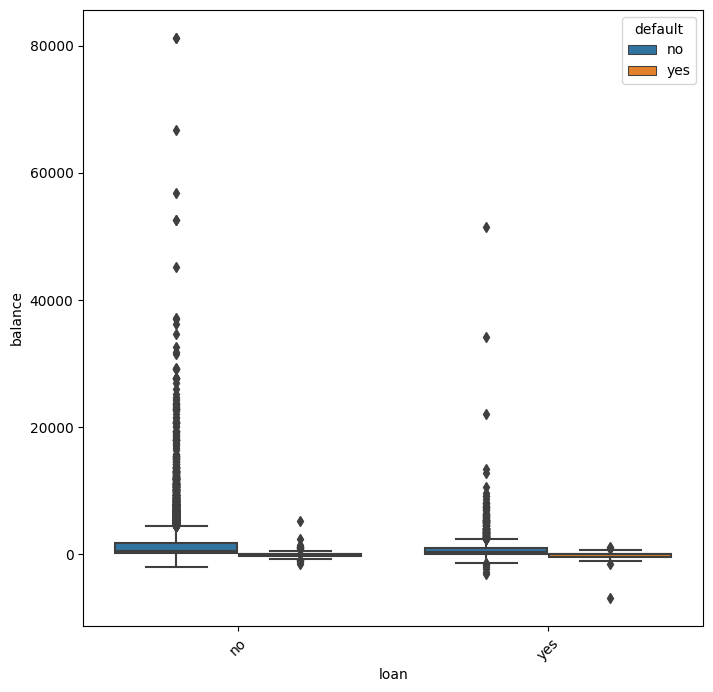

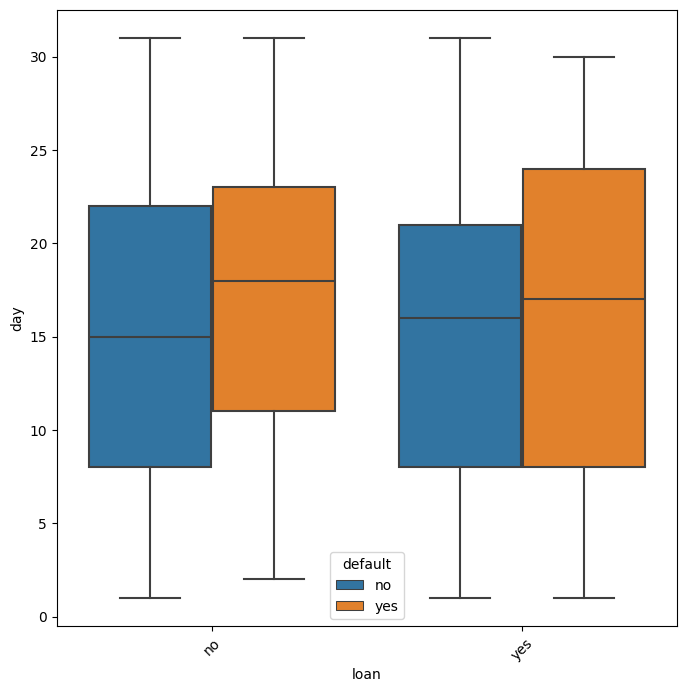

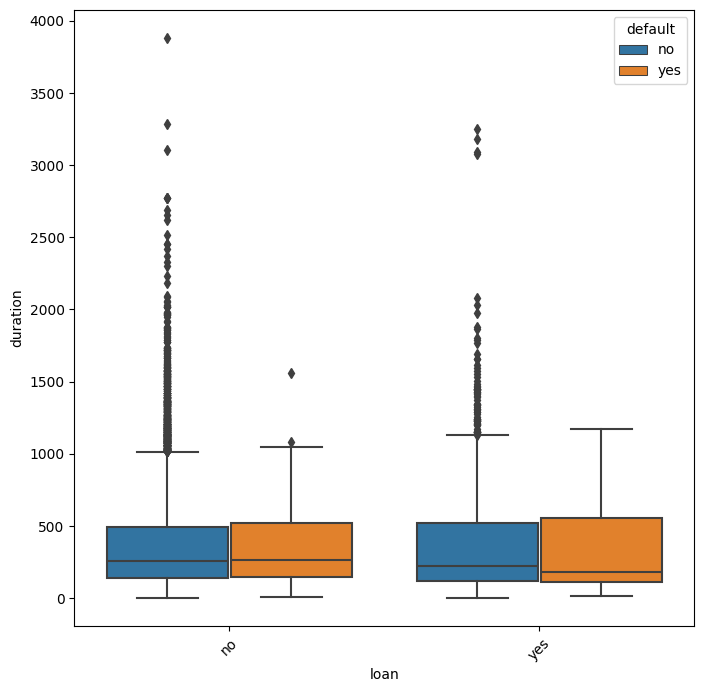

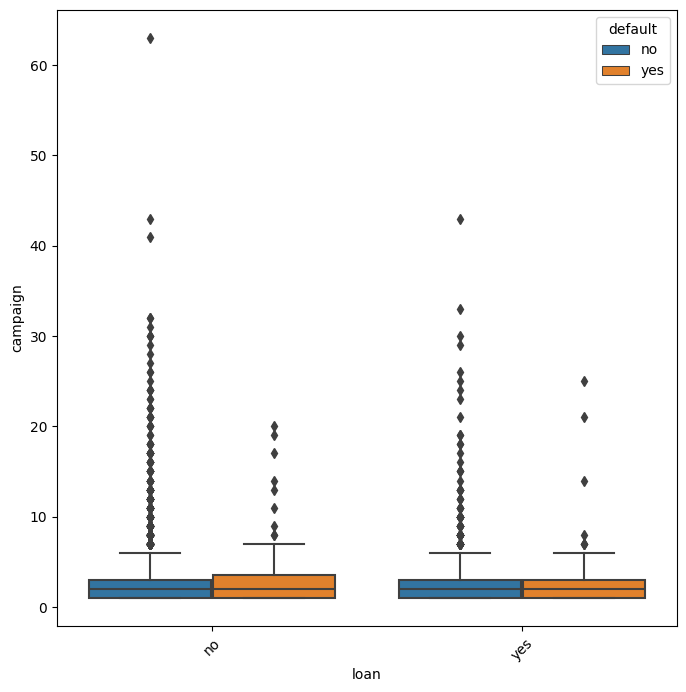

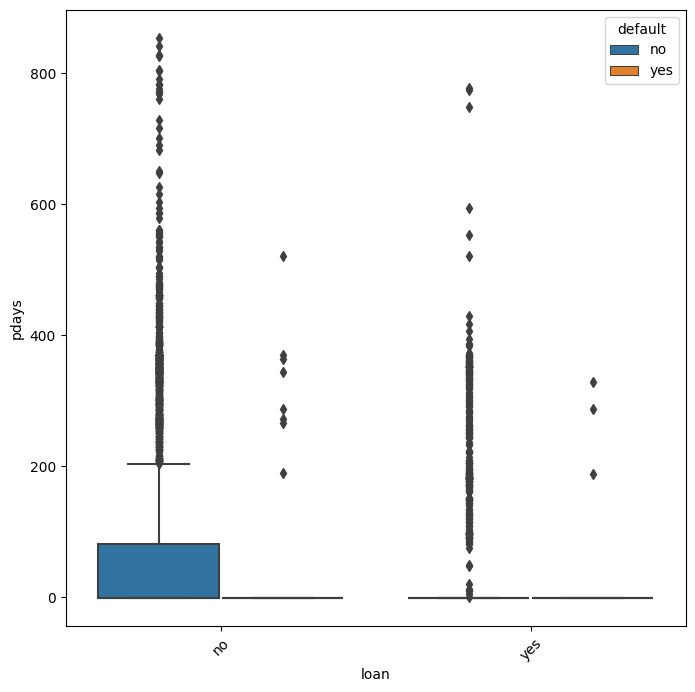

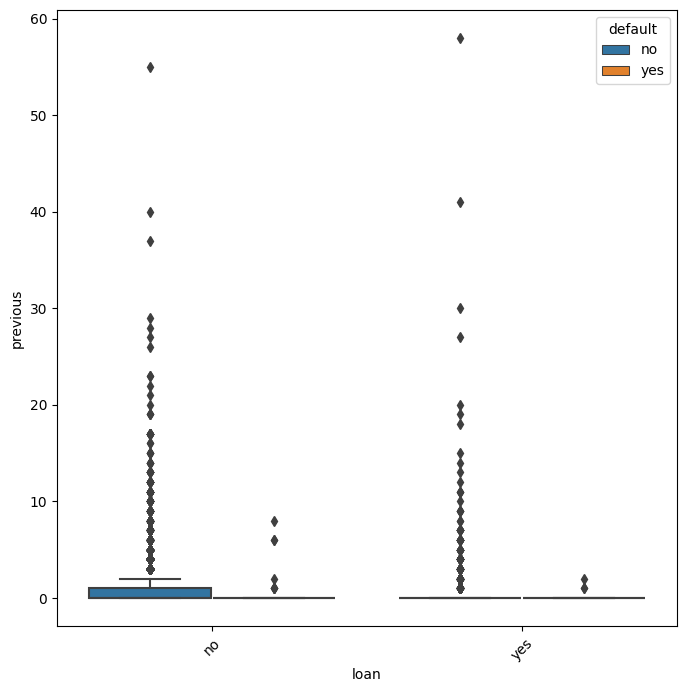

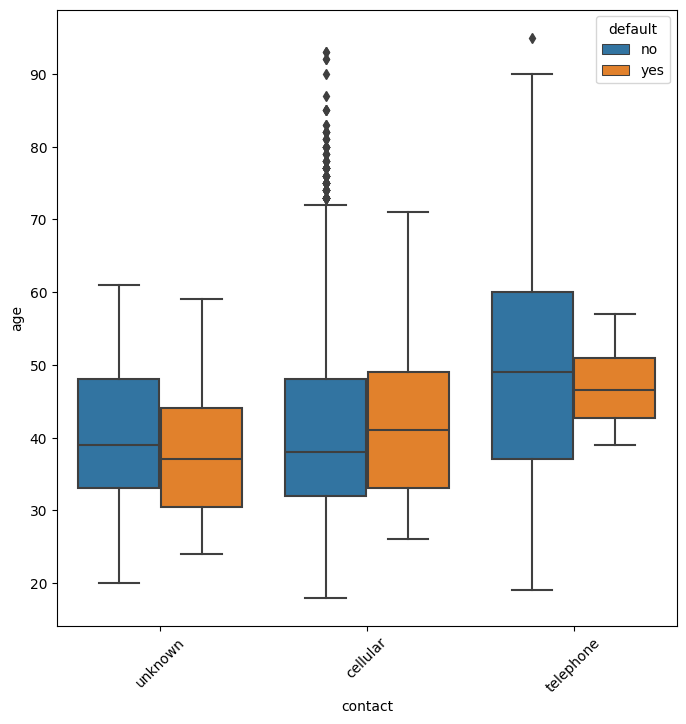

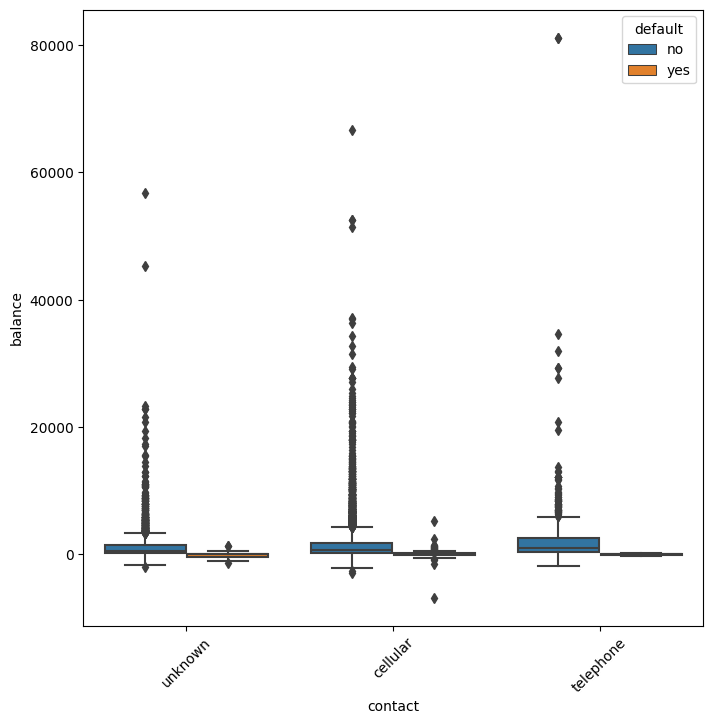

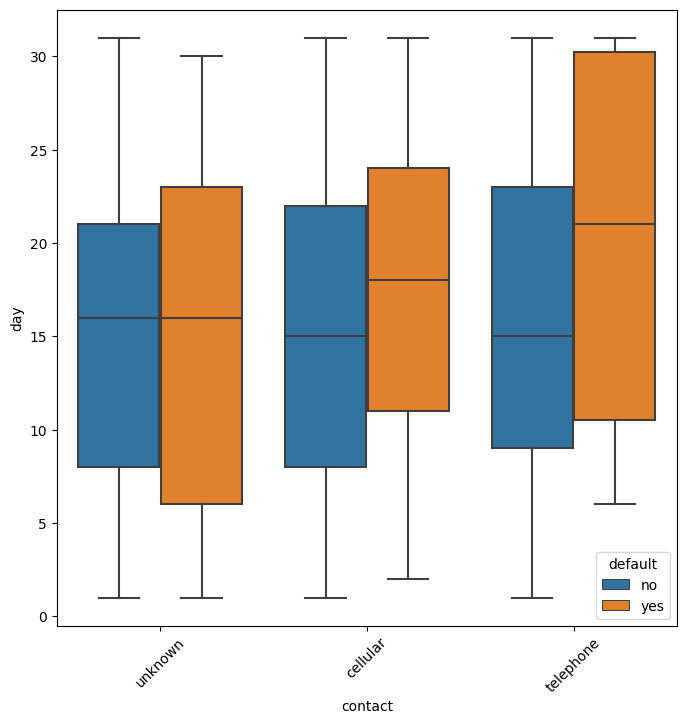

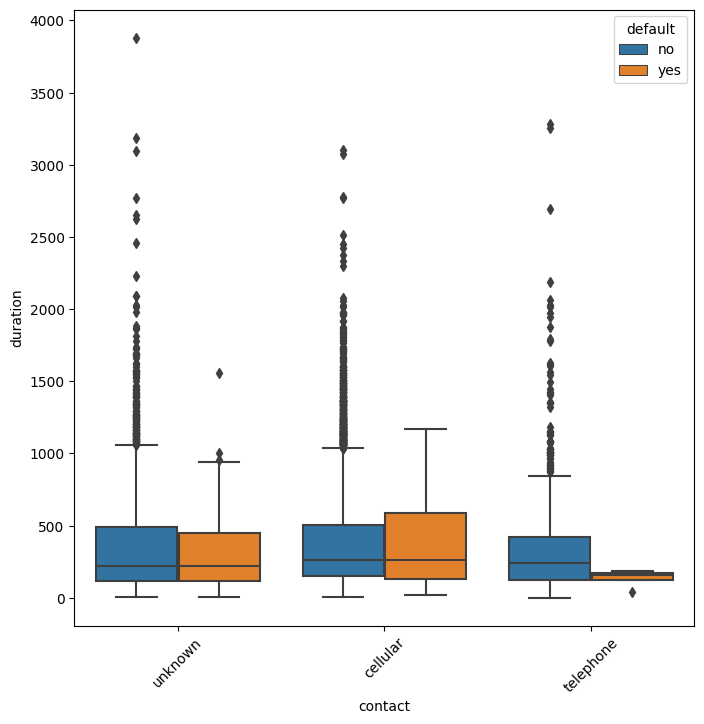

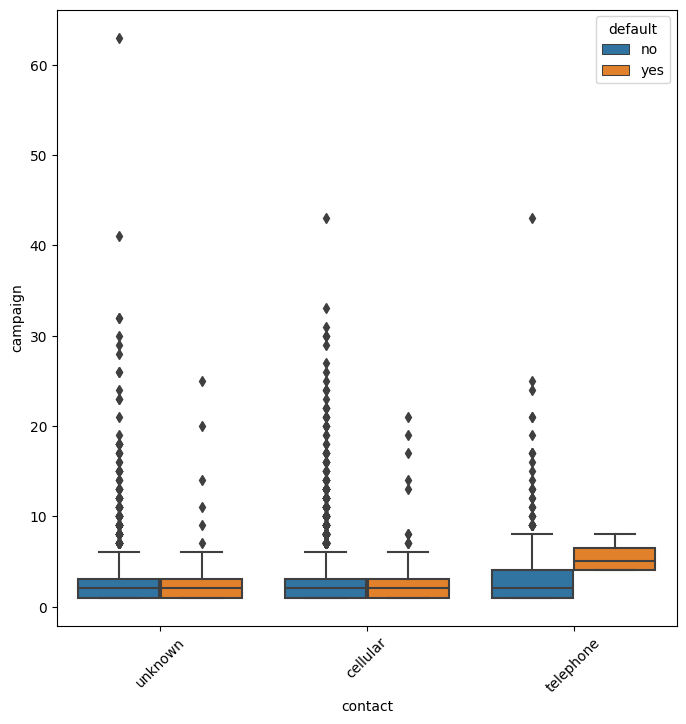

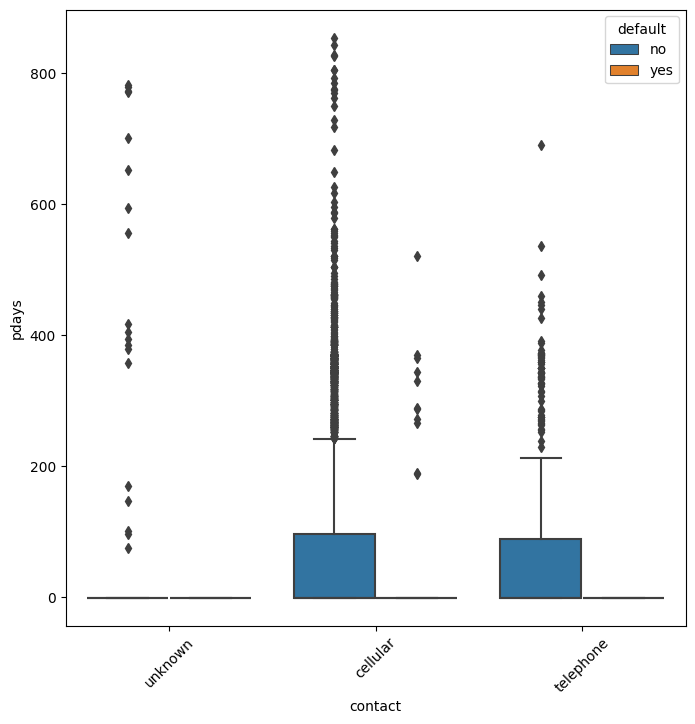

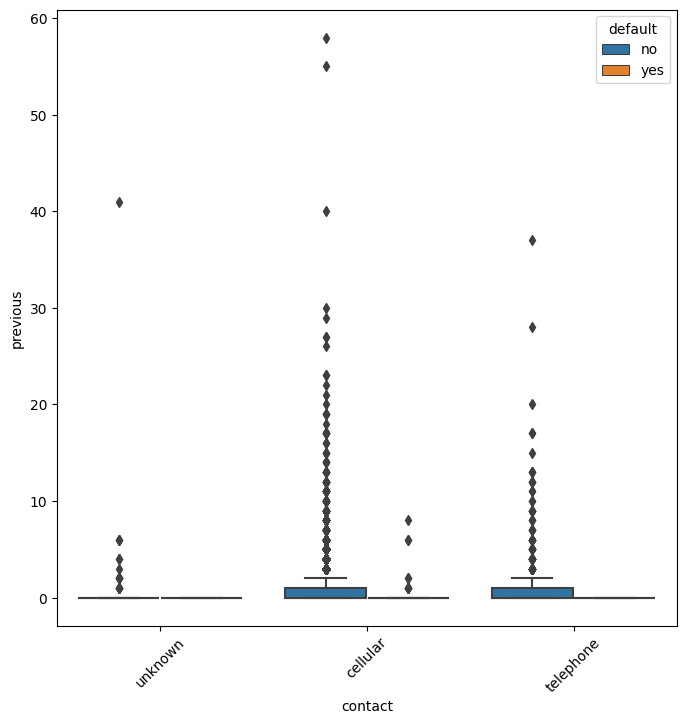

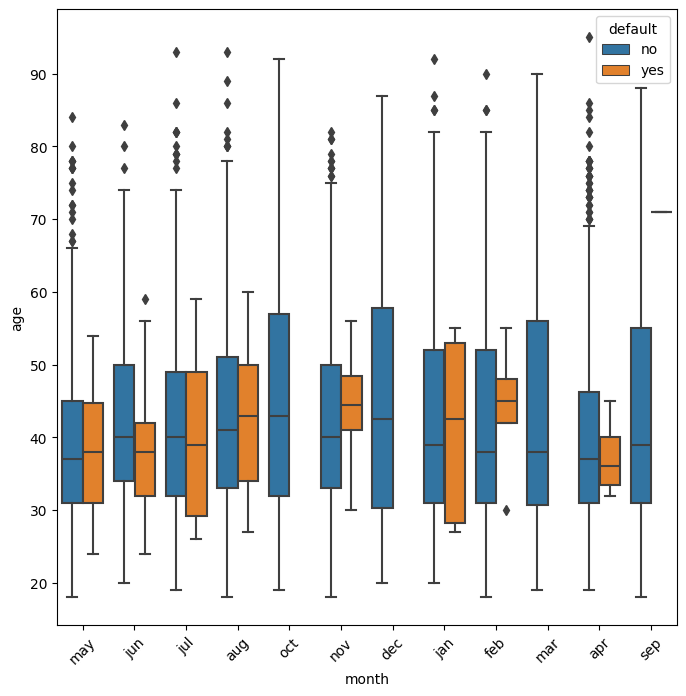

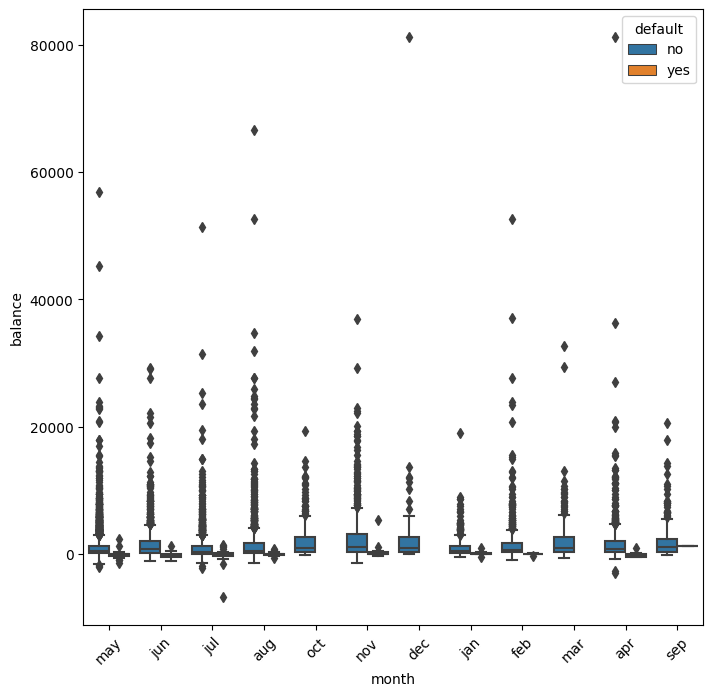

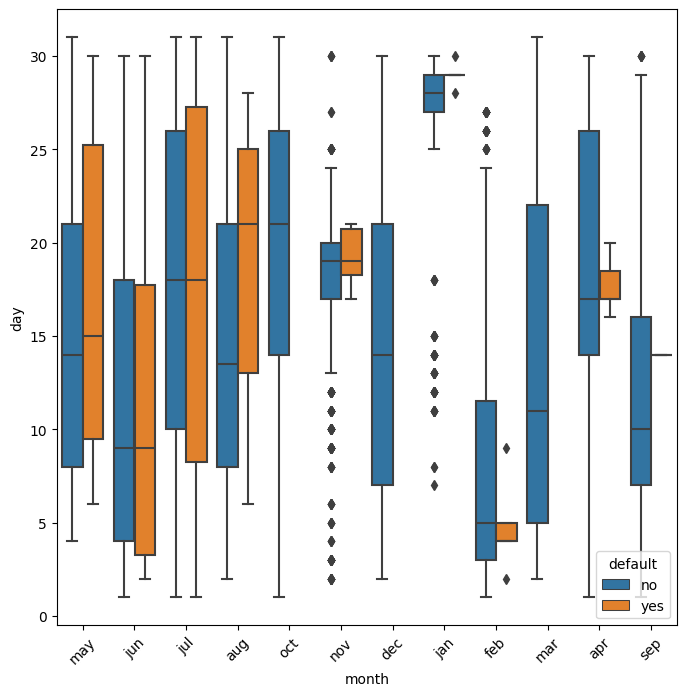

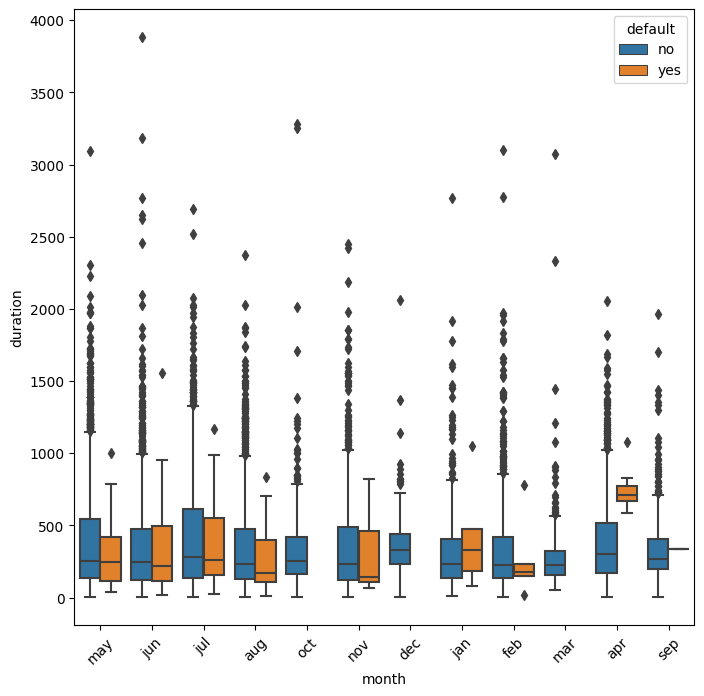

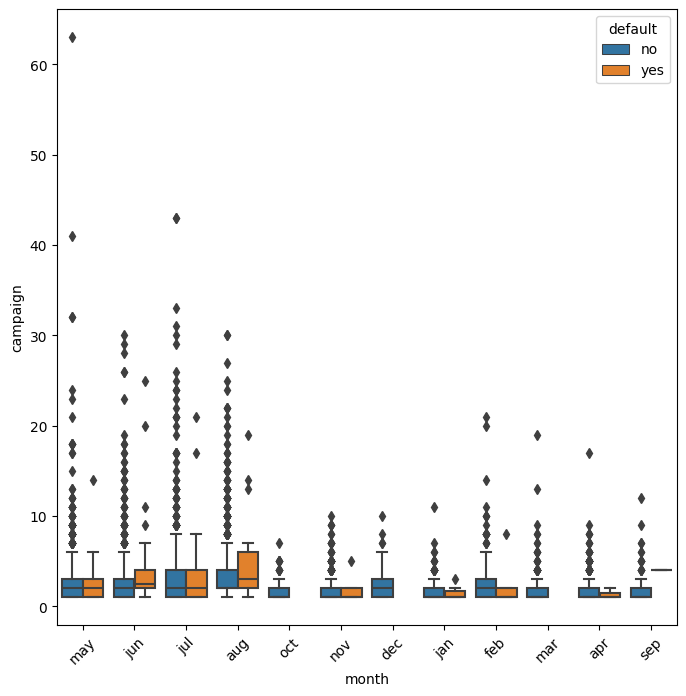

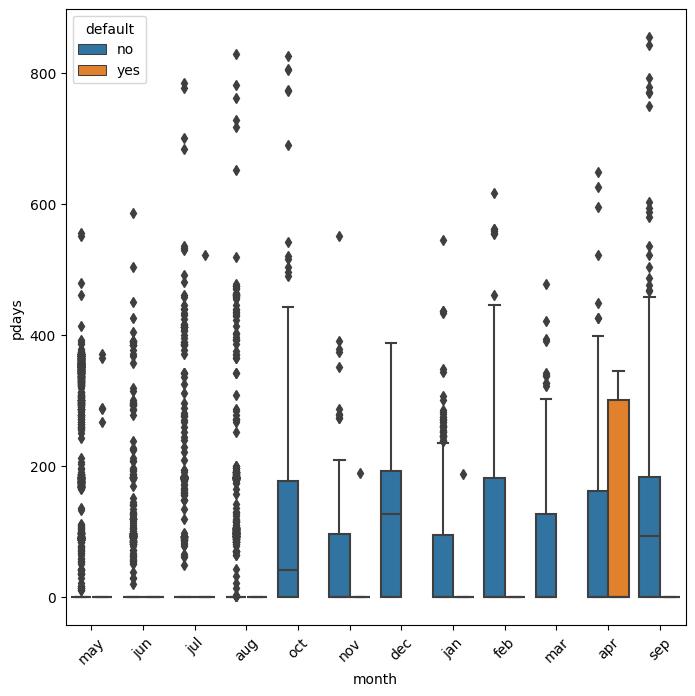

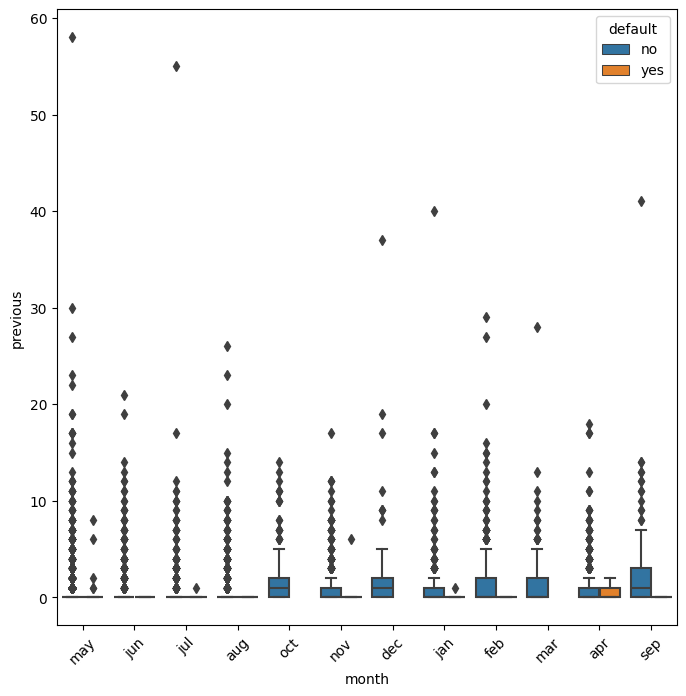

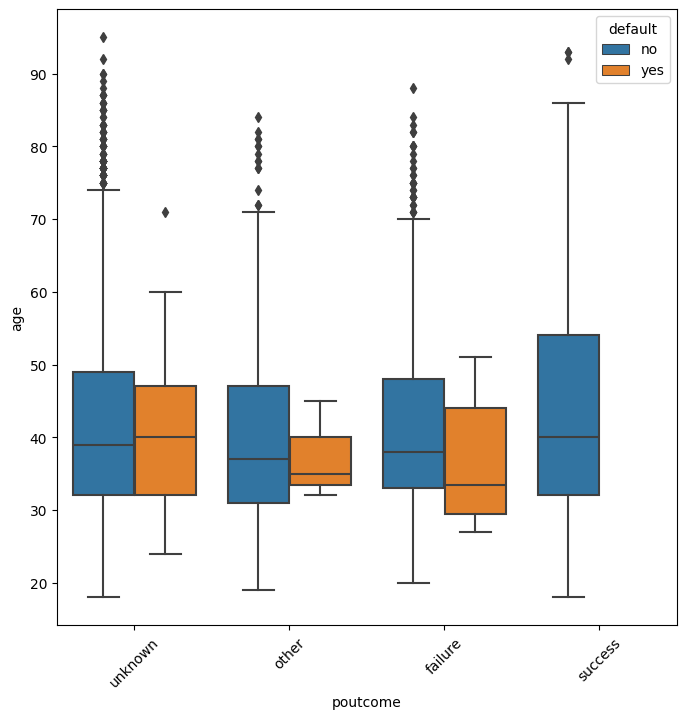

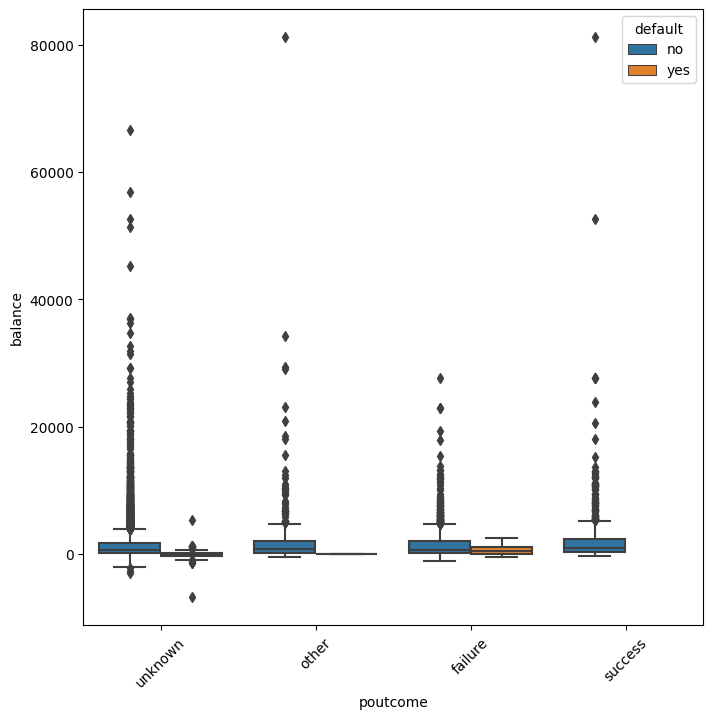

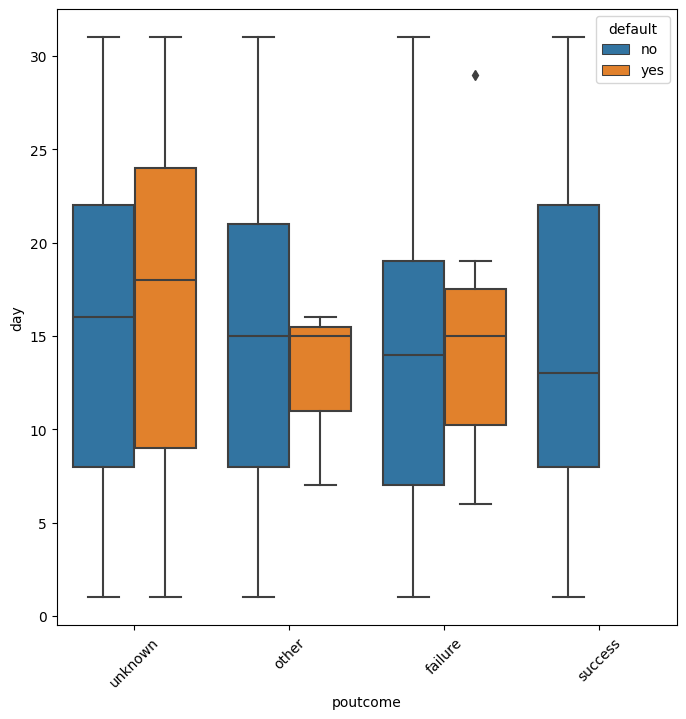

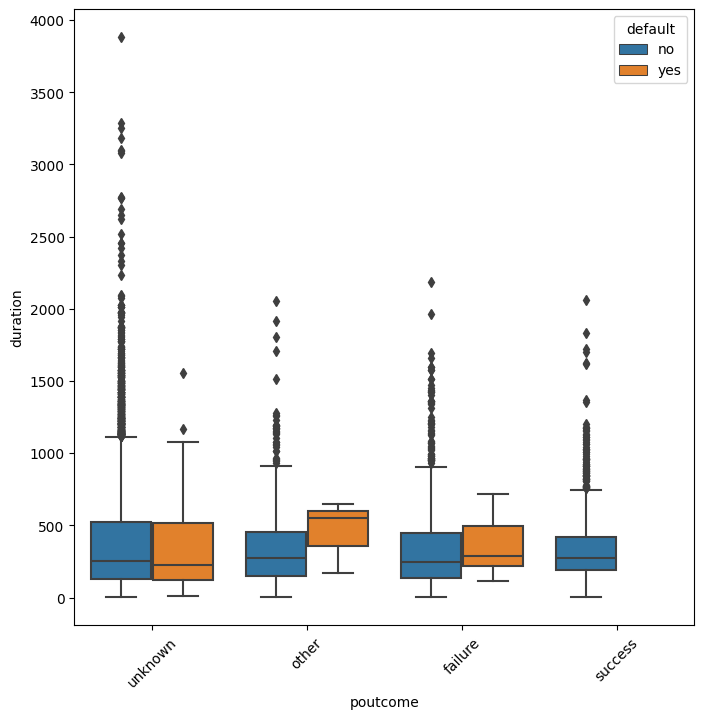

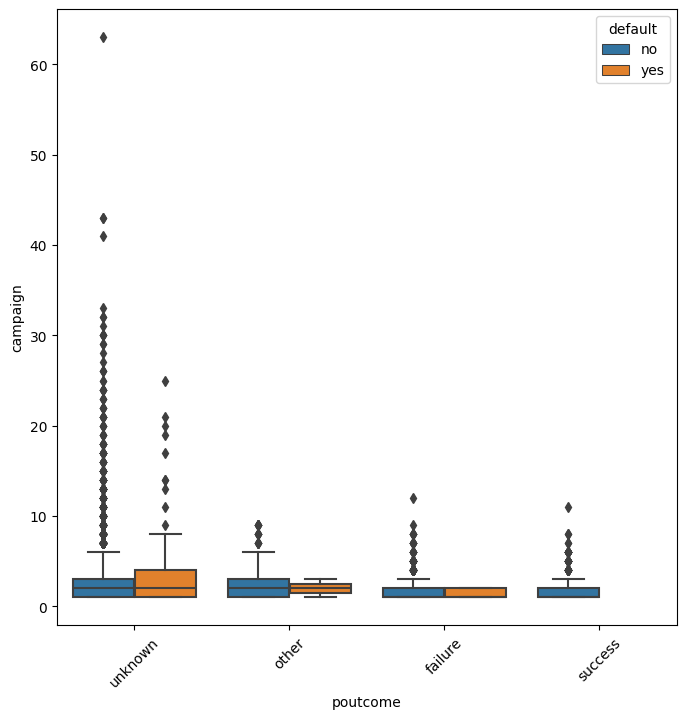

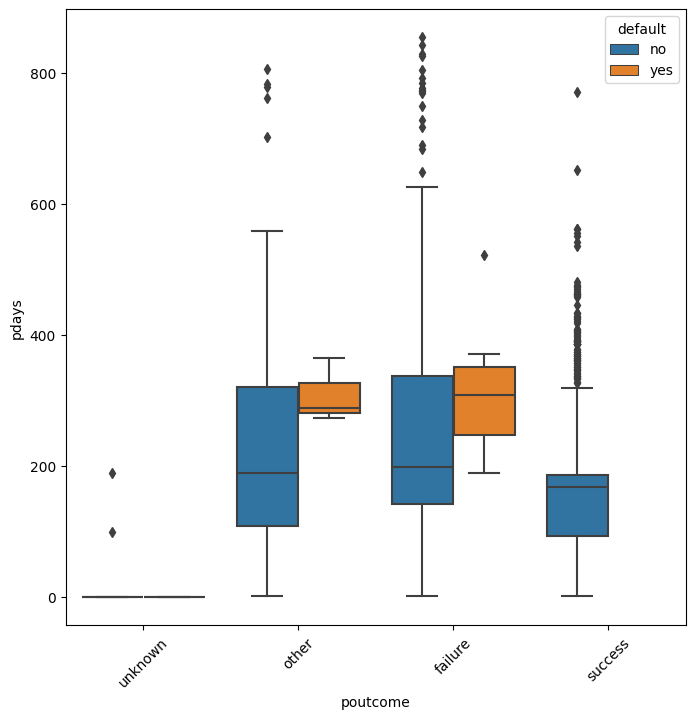

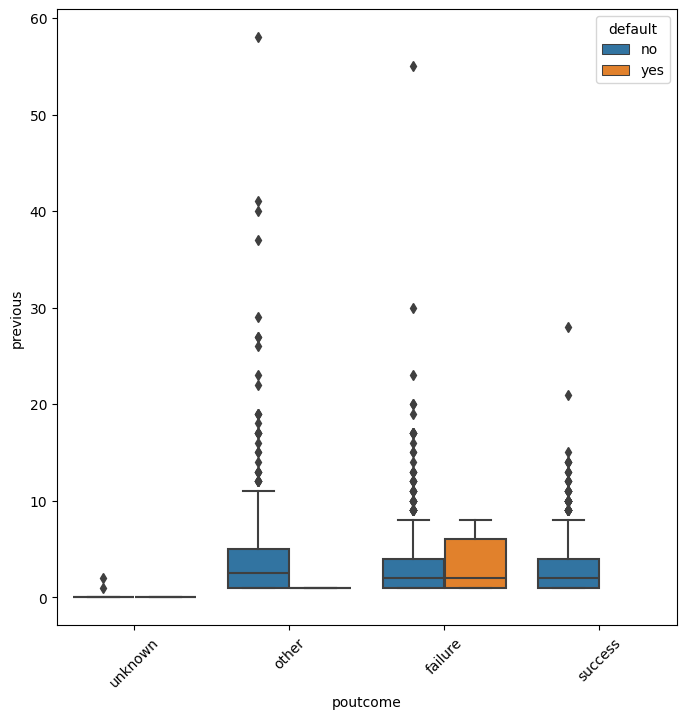

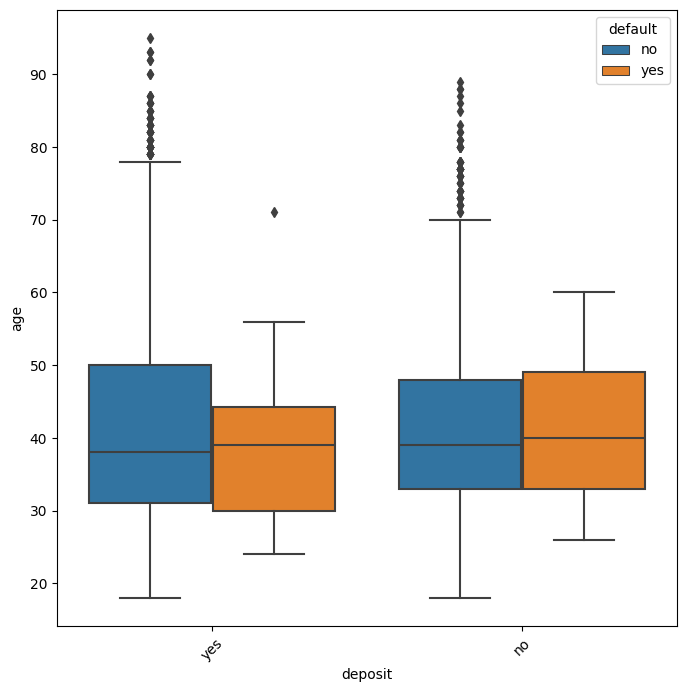

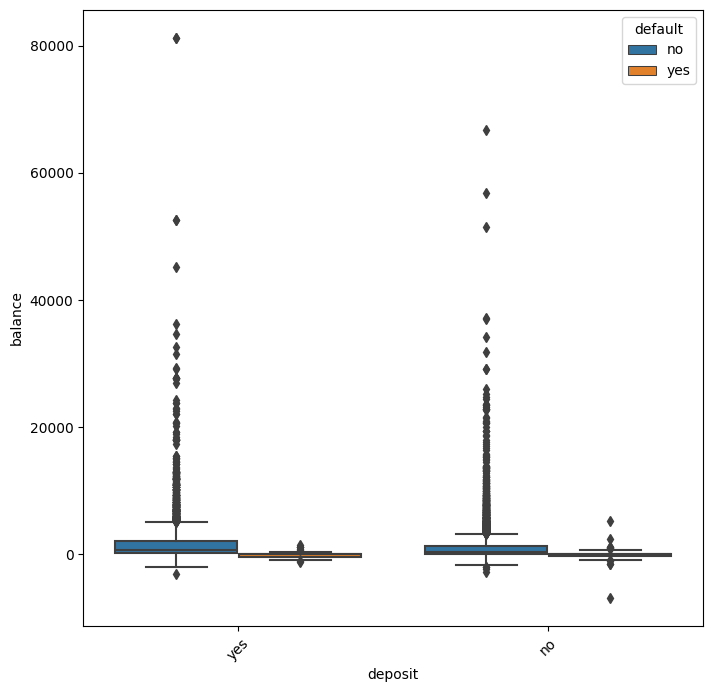

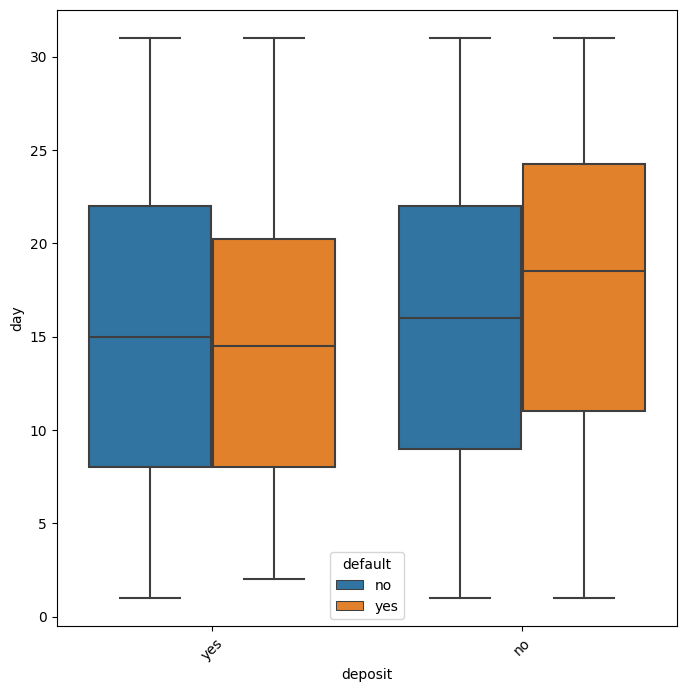

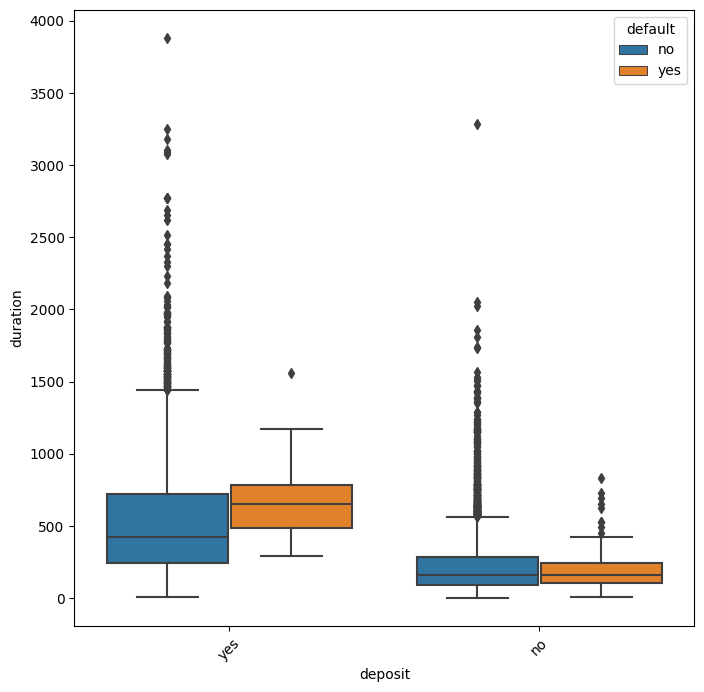

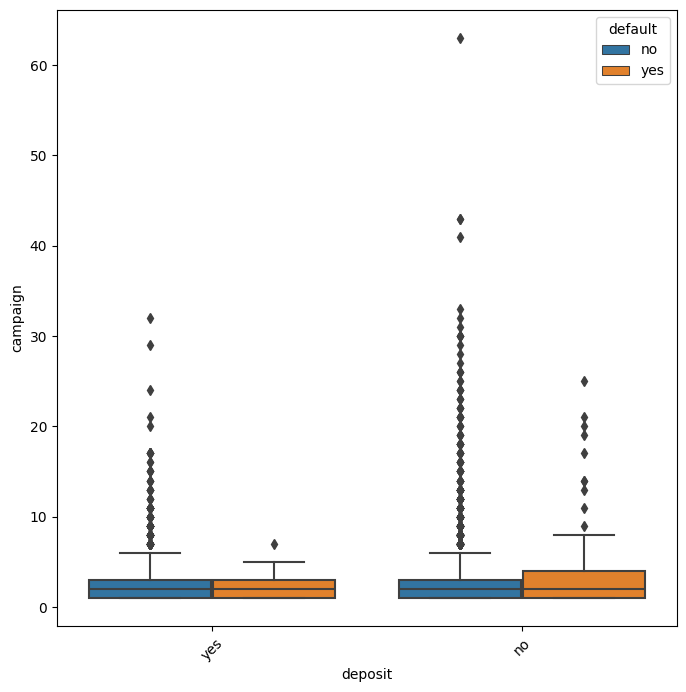

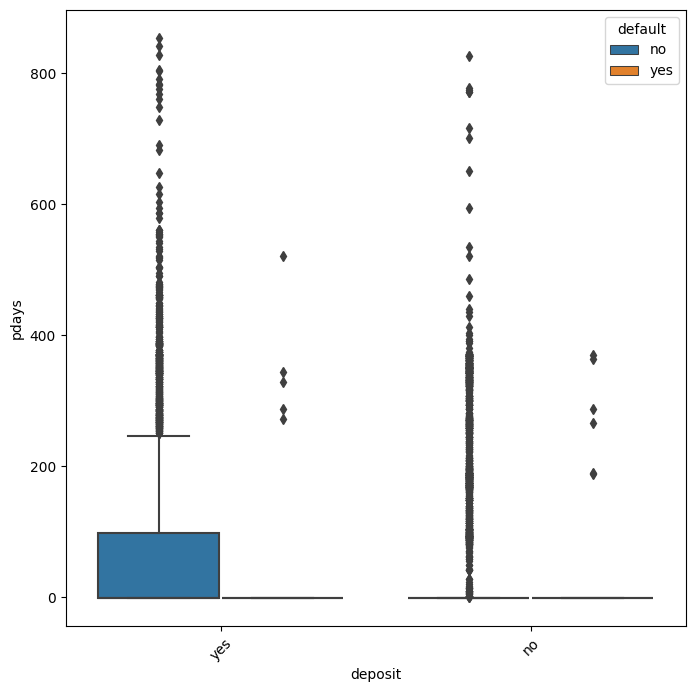

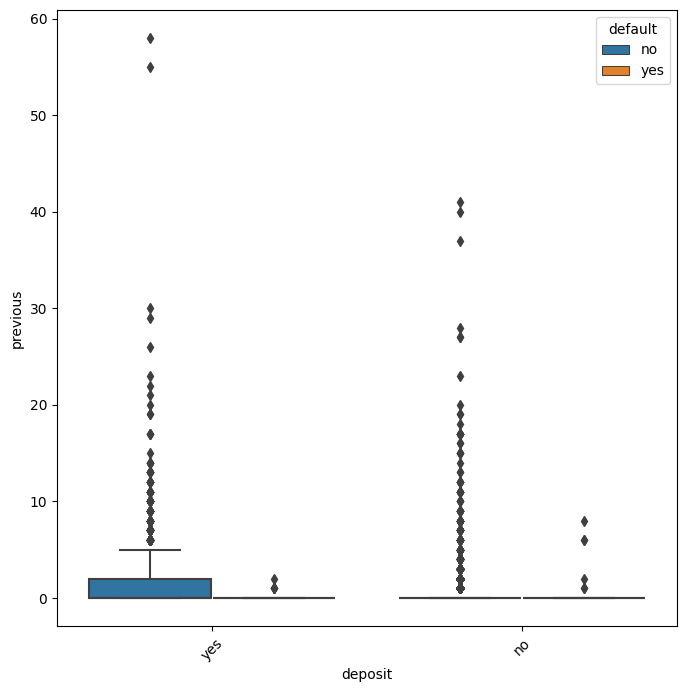

In [77]:
cat_int(data) 

In [78]:
def int_cible(dataframe) :
     contour = dataframe.select_dtypes("int").shape[1] if dataframe.select_dtypes("int").shape[1]%2==0 else dataframe.select_dtypes("int").shape[1]//2+1
     for i, col in enumerate(dataframe.select_dtypes("int")) :
          plt.figure(figsize=(9,9))
          sn.boxplot(x=dataframe["default"],y=dataframe[col])
      
           

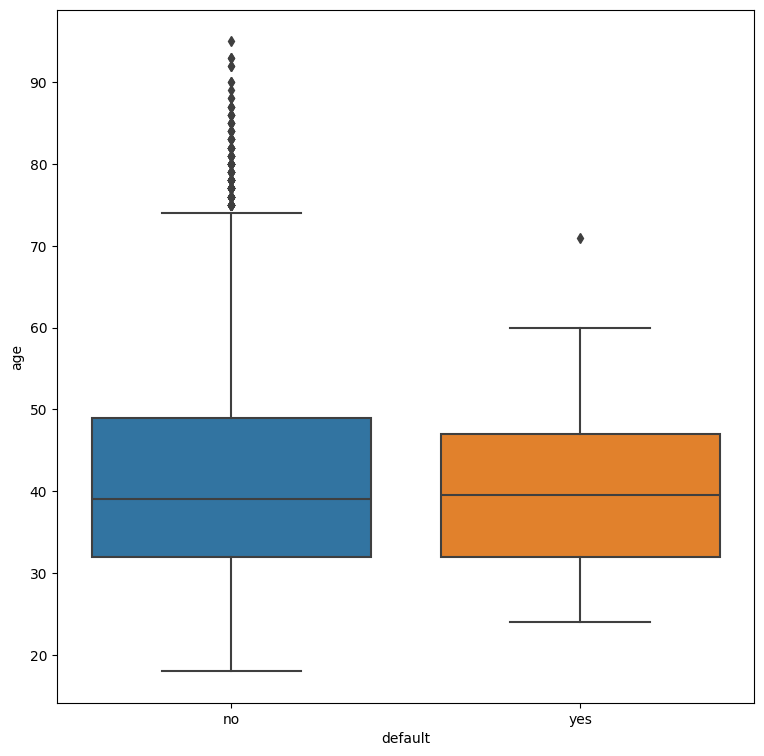

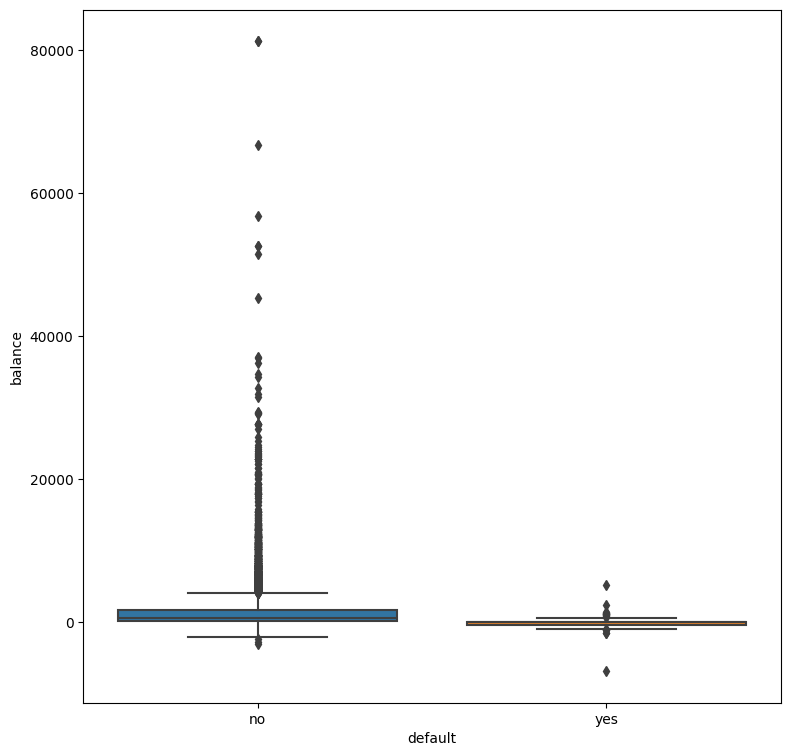

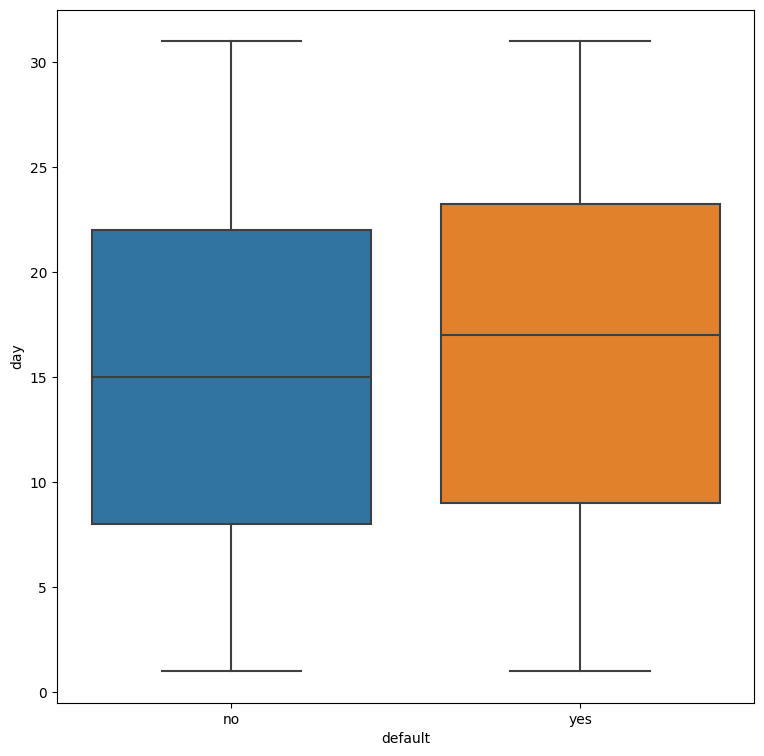

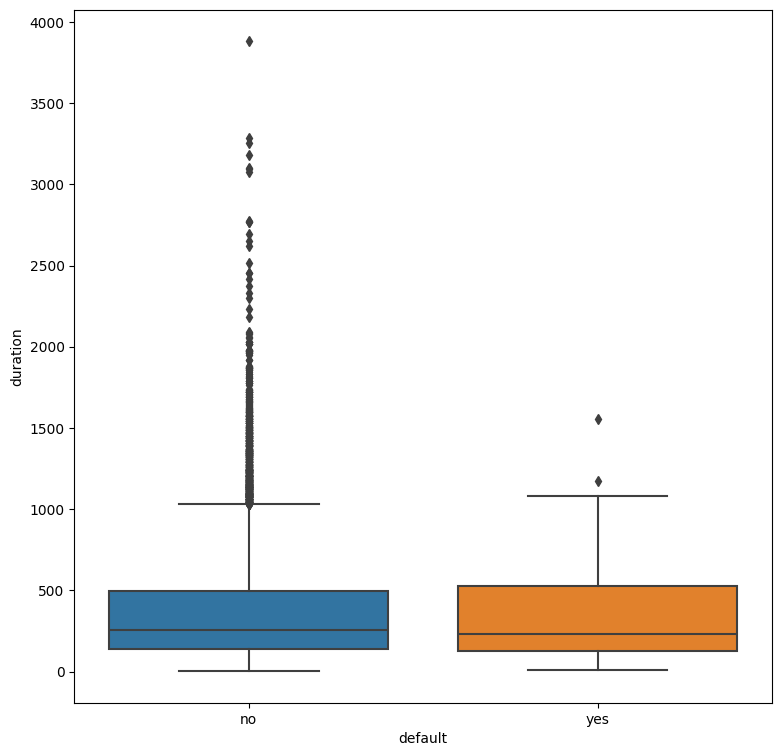

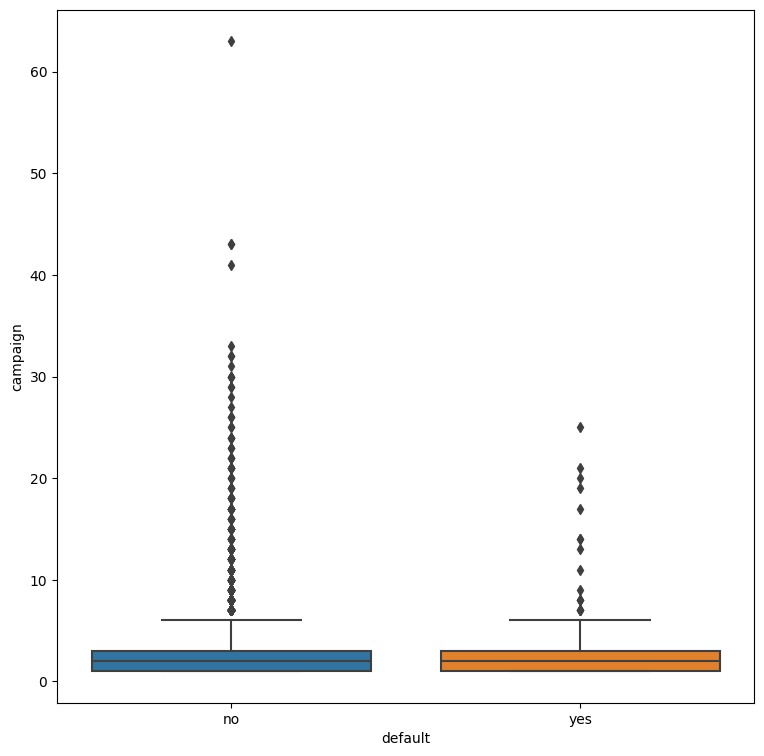

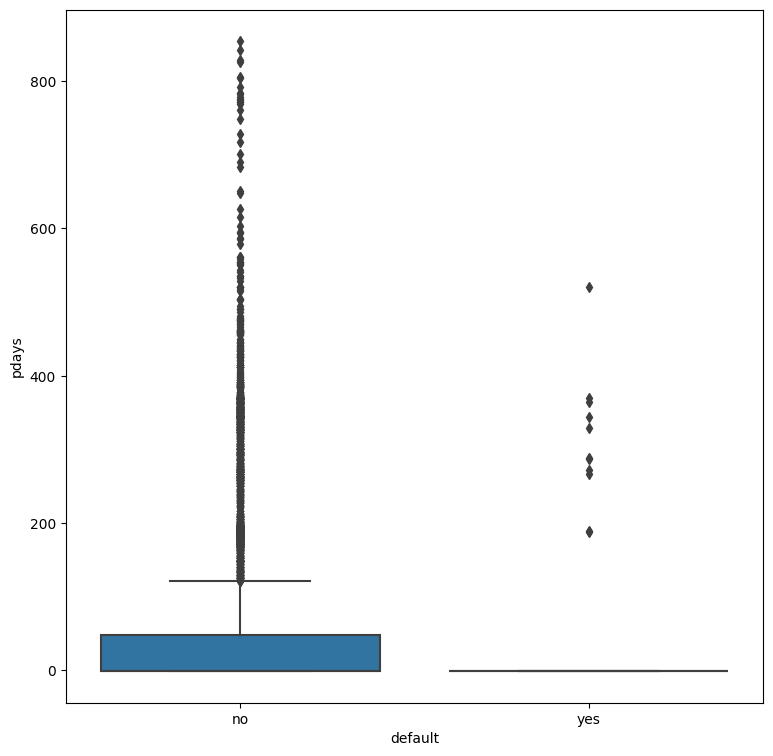

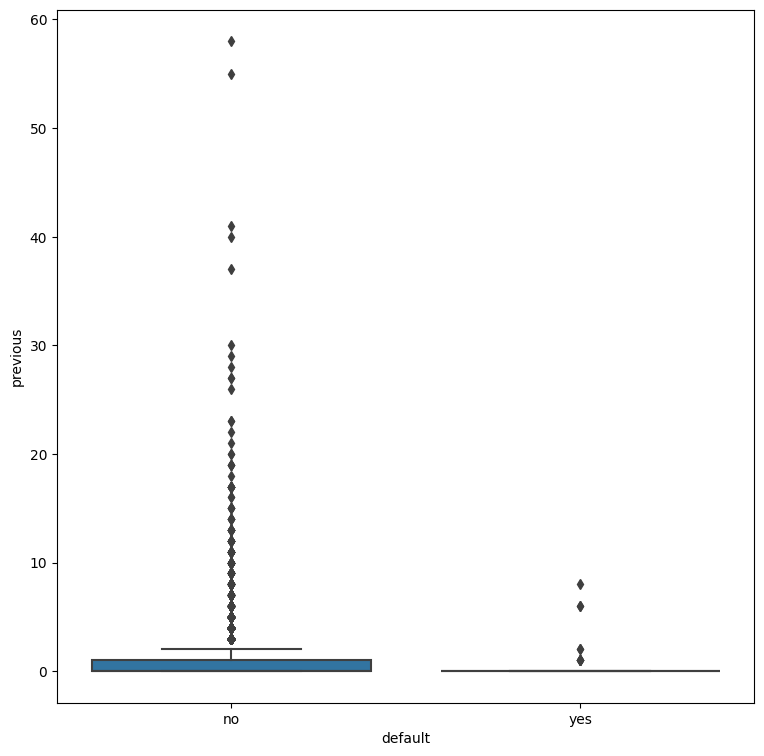

In [79]:
int_cible(data)

In [80]:
data.select_dtypes("int").corr(method="spearman").style.background_gradient()

### 3.  Pretraitement

In [81]:
from sklearn.pipeline import make_pipeline,make_union 
from sklearn.feature_selection import f_classif,chi2,mutual_info_classif,SelectKBest,RFECV 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,power_transform,RobustScaler
from sklearn.compose import ColumnTransformer,make_column_transformer

In [86]:
def codage(dataframe) :
    for col in dataframe.select_dtypes("object") :
        dataframe[col] = dataframe[col].astype("category").cat.codes
    return dataframe
df =codage(data).copy()   